
## RNN for data with time delays

* Per cast 


In [1]:

import pandas as pd
import numpy as np


In [2]:

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [3]:

import matplotlib 
## import pytorch_lightning as pl
import torch 

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable


In [4]:

## Requires Python = 3.9



## Parameters


In [5]:

window                 = 5   ## 90   ## 30          ## seq length

silicon_feature_index  = 0

avg_the_rows_parameter =  1   ##   15

vector_n_out = 26


## 1    ->  1 minute time step
## 15   -> 15 minute time step
## 1440 -> 24 hour time step
## 480  -> 8 hour shift
## 60   -> 1 hour time step



## Read the data


In [6]:

for_RNN_data_CIVS = pd.read_csv('input/RNN_time_DELAYS_2000_PerCast_rcalix.csv')


In [7]:

for_RNN_data_CIVS.head(5)


Unnamed: 0     SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
0           1  0.655900                4.242439          2161.425209   
1           2  0.608500                4.250658          2155.622815   
2           3  0.575508                4.257849          2150.390786   
3           4  0.719500                4.133909          2167.094817   
4           5  0.710486                4.174343          2168.238915   

   NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0            9306.840913   184.818611                    0.0           0.0   
1            9317.204202   185.000295                    0.0           0.0   
2            9379.027265   184.611966                    0.0           0.0   
3            9442.367486   185.744793                    0.0           0.0   
4            9336.364456   185.993447                    0.0           0.0   

   Cast_Avg_Mn_f2  Slag_Fe_f2  ...  SW_Uptake_f3  HOT_METAL_TEMP_f3  \
0           0.354        0.16  ...    192.512412        2730.002686   
1           0.323        0.00  ...    221.646579        2730.002686   
2           0.330        0.00  ...    207.505852        2730.002686   
3           0.345        0.00  ...    201.510393        2727.202379   
4           0.313        0.83  ...    192.366046        2730.002686   

    HM_Temp_f1  Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  \
0  2726.666667     37.369999    36.439999         9.86   
1  2727.400000      0.000000     0.000000         0.00   
2  2690.500000      0.000000     0.000000         0.00   
3  2681.192953      0.000000     0.000000         0.00   
4  2724.225000     35.540001    35.970001         9.03   

   SNORT_VALVE_POSITION_f3  TOP_PRESS_f3  HOT_BLAST_PRESSURE_f3  Coke_Rate_f3  
0                98.334297     18.532928              36.602600         884.0  
1                98.334297     18.275620              36.601051         884.0  
2                98.334297     18.134174              36.599696         884.0  
3                98.334297     18.378320              36.262273         884.0  
4                98.334297     18.397217              36.882963         884.0  

[5 rows x 27 columns]

In [8]:

for_RNN_data_CIVS


Unnamed: 0     SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
0              1  0.655900                4.242439          2161.425209   
1              2  0.608500                4.250658          2155.622815   
2              3  0.575508                4.257849          2150.390786   
3              4  0.719500                4.133909          2167.094817   
4              5  0.710486                4.174343          2168.238915   
...          ...       ...                     ...                  ...   
1590        1591  0.646000                4.208539          2169.079601   
1591        1592  0.654667                4.212648          2168.797556   
1592        1593  0.591667                4.217784          2168.444999   
1593        1594  0.724667                4.223948          2167.967389   
1594        1595  0.628625                4.230112          2166.628469   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               9306.840913   184.818611                    0.0           0.0   
1               9317.204202   185.000295                    0.0           0.0   
2               9379.027265   184.611966                    0.0           0.0   
3               9442.367486   185.744793                    0.0           0.0   
4               9336.364456   185.993447                    0.0           0.0   
...                     ...          ...                    ...           ...   
1590            9312.779010   185.053796                    0.0           0.0   
1591            9303.753420   185.007919                    0.0           0.0   
1592            9333.448101   184.942435                    0.0           0.0   
1593            9321.819731   184.863855                    0.0           0.0   
1594            9293.853451   184.785275                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  ...  SW_Uptake_f3  HOT_METAL_TEMP_f3  \
0              0.354        0.16  ...    192.512412        2730.002686   
1              0.323        0.00  ...    221.646579        2730.002686   
2              0.330        0.00  ...    207.505852        2730.002686   
3              0.345        0.00  ...    201.510393        2727.202379   
4              0.313        0.83  ...    192.366046        2730.002686   
...              ...         ...  ...           ...                ...   
1590           0.324        0.30  ...    193.501805        2730.002686   
1591           0.325        0.16  ...    194.328694        2730.002686   
1592           0.335        0.26  ...    215.606202        2730.002686   
1593           0.328        1.08  ...    250.937261        2730.002686   
1594           0.342        0.19  ...    184.739374        2730.002686   

       HM_Temp_f1  Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  \
0     2726.666667     37.369999    36.439999         9.86   
1     2727.400000      0.000000     0.000000         0.00   
2     2690.500000      0.000000     0.000000         0.00   
3     2681.192953      0.000000     0.000000         0.00   
4     2724.225000     35.540001    35.970001         9.03   
...           ...           ...          ...          ...   
1590  2739.000000     35.900002    37.259998        10.04   
1591  2710.500000     35.580002    36.500000         9.30   
1592  2750.000000     35.130001    37.470001        10.01   
1593  2678.333333     35.570000    36.970001         9.47   
1594  2725.333333     36.180000    35.810001         9.22   

      SNORT_VALVE_POSITION_f3  TOP_PRESS_f3  HOT_BLAST_PRESSURE_f3  \
0                   98.334297     18.532928              36.602600   
1                   98.334297     18.275620              36.601051   
2                   98.334297     18.134174              36.599696   
3                   98.334297     18.378320              36.262273   
4                   98.334297     18.397217              36.882963   
...                       ...           ...                    ...   
1590                

In [9]:

cols_list_DF = for_RNN_data_CIVS.columns.values.tolist()
cols_list_DF


['Unnamed: 0',
 'SI_f1',
 'HOST_BLAST_MOISTURE_f3',
 'HOT_BLAST_TMP_NS_f3',
 'NAT_GAS _INJECTION_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'HOT_METAL_TEMP_f3',
 'HM_Temp_f1',
 'Slag_SiO2_f2',
 'Slag_CaO_f2',
 'Slag_MgO_f2',
 'SNORT_VALVE_POSITION_f3',
 'TOP_PRESS_f3',
 'HOT_BLAST_PRESSURE_f3',
 'Coke_Rate_f3']

In [10]:

l_new = ['SI_f1',
 'HOST_BLAST_MOISTURE_f3',
 'HOT_BLAST_TMP_NS_f3',
 'NAT_GAS _INJECTION_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'HOT_METAL_TEMP_f3',
 'HM_Temp_f1',
 'Slag_SiO2_f2',
 'Slag_CaO_f2',
 'Slag_MgO_f2',
 'SNORT_VALVE_POSITION_f3',
 'TOP_PRESS_f3',
 'HOT_BLAST_PRESSURE_f3',
 'Coke_Rate_f3']


In [11]:

for_RNN_data_CIVS = for_RNN_data_CIVS[l_new]


In [12]:

for_RNN_data_CIVS 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
0     0.655900                4.242439          2161.425209   
1     0.608500                4.250658          2155.622815   
2     0.575508                4.257849          2150.390786   
3     0.719500                4.133909          2167.094817   
4     0.710486                4.174343          2168.238915   
...        ...                     ...                  ...   
1590  0.646000                4.208539          2169.079601   
1591  0.654667                4.212648          2168.797556   
1592  0.591667                4.217784          2168.444999   
1593  0.724667                4.223948          2167.967389   
1594  0.628625                4.230112          2166.628469   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               9306.840913   184.818611                    0.0           0.0   
1               9317.204202   185.000295                    0.0           0.0   
2               9379.027265   184.611966                    0.0           0.0   
3               9442.367486   185.744793                    0.0           0.0   
4               9336.364456   185.993447                    0.0           0.0   
...                     ...          ...                    ...           ...   
1590            9312.779010   185.053796                    0.0           0.0   
1591            9303.753420   185.007919                    0.0           0.0   
1592            9333.448101   184.942435                    0.0           0.0   
1593            9321.819731   184.863855                    0.0           0.0   
1594            9293.853451   184.785275                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  Selec_Top_Gas_CO_f3  ...  SW_Uptake_f3  \
0              0.354        0.16            21.080431  ...    192.512412   
1              0.323        0.00            21.089264  ...    221.646579   
2              0.330        0.00            21.096992  ...    207.505852   
3              0.345        0.00            20.670933  ...    201.510393   
4              0.313        0.83            20.996415  ...    192.366046   
...              ...         ...                  ...  ...           ...   
1590           0.324        0.30            21.043999  ...    193.501805   
1591           0.325        0.16            21.048415  ...    194.328694   
1592           0.335        0.26            21.053935  ...    215.606202   
1593           0.328        1.08            21.060559  ...    250.937261   
1594           0.342        0.19            21.067183  ...    184.739374   

      HOT_METAL_TEMP_f3   HM_Temp_f1  Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  \
0           2730.002686  2726.666667     37.369999    36.439999         9.86   
1           2730.002686  2727.400000      0.000000     0.000000         0.00   
2           2730.002686  2690.500000      0.000000     0.000000         0.00   
3           2727.202379  2681.192953      0.000000     0.000000         0.00   
4           2730.002686  2724.225000     35.540001    35.970001         9.03   
...                 ...          ...           ...          ...          ...   
1590        2730.002686  2739.000000     35.900002    37.259998        10.04   
1591        2730.002686  2710.500000     35.580002    36.500000         9.30   
1592        2730.002686  2750.000000     35.130001    37.470001        10.01   
1593        2730.002686  2678.333333     35.570000    36.970001         9.47   
1594        2730.002686  2725.333333     36.180000    35.810001         9.22   

      SNORT_VALVE_POSITION_f3  TOP_PRESS_f3  HOT_BLAST_PRESSURE_f3  \
0                   98.334297     18.532928              36.602600   
1                   98.334297     18.275620              36.601051   
2                   98.334297     18.134174              36.599696   
3                   98.334297     18.378320              36.262273   
4                   98.334297     18.397217            

In [13]:

for_RNN_data_CIVS.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1595 entries, 0 to 1594
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1595 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1595 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1595 non-null   float64
 3   NAT_GAS _INJECTION_f3    1595 non-null   float64
 4   WINDRATE_f3              1595 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1595 non-null   float64
 6   COAL_FLOW_f3             1595 non-null   float64
 7   Cast_Avg_Mn_f2           1595 non-null   float64
 8   Slag_Fe_f2               1595 non-null   float64
 9   Selec_Top_Gas_CO_f3      1595 non-null   float64
 10  Selec_Top_Gas_CO2_f3     1595 non-null   float64
 11  Selec_Top_Gas_H2_f3      1595 non-null   float64
 12  Selec_Top_Gas_N2_f3      1595 non-null   float64
 13  NE_Uptake_f3             1595 non-null   float64
 14  SE_Uptake_f3            


## Plots


In [14]:
'''
for_RNN_data_CIVS['MM_Timestamp_f1'] = for_RNN_data_CIVS['MM_Timestamp_f1'].astype("datetime64[ns]")

rc22 = for_RNN_data_CIVS['MM_Timestamp_f1'].astype("datetime64[ns]")
'''

'\nfor_RNN_data_CIVS[\'MM_Timestamp_f1\'] = for_RNN_data_CIVS[\'MM_Timestamp_f1\'].astype("datetime64[ns]")\n\nrc22 = for_RNN_data_CIVS[\'MM_Timestamp_f1\'].astype("datetime64[ns]")\n'

In [15]:

##rc22


In [16]:

plt.rcParams["figure.figsize"] = [15, 5]


In [17]:

## plt.plot(rc22, for_RNN_data_CIVS['SI_f1'])


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

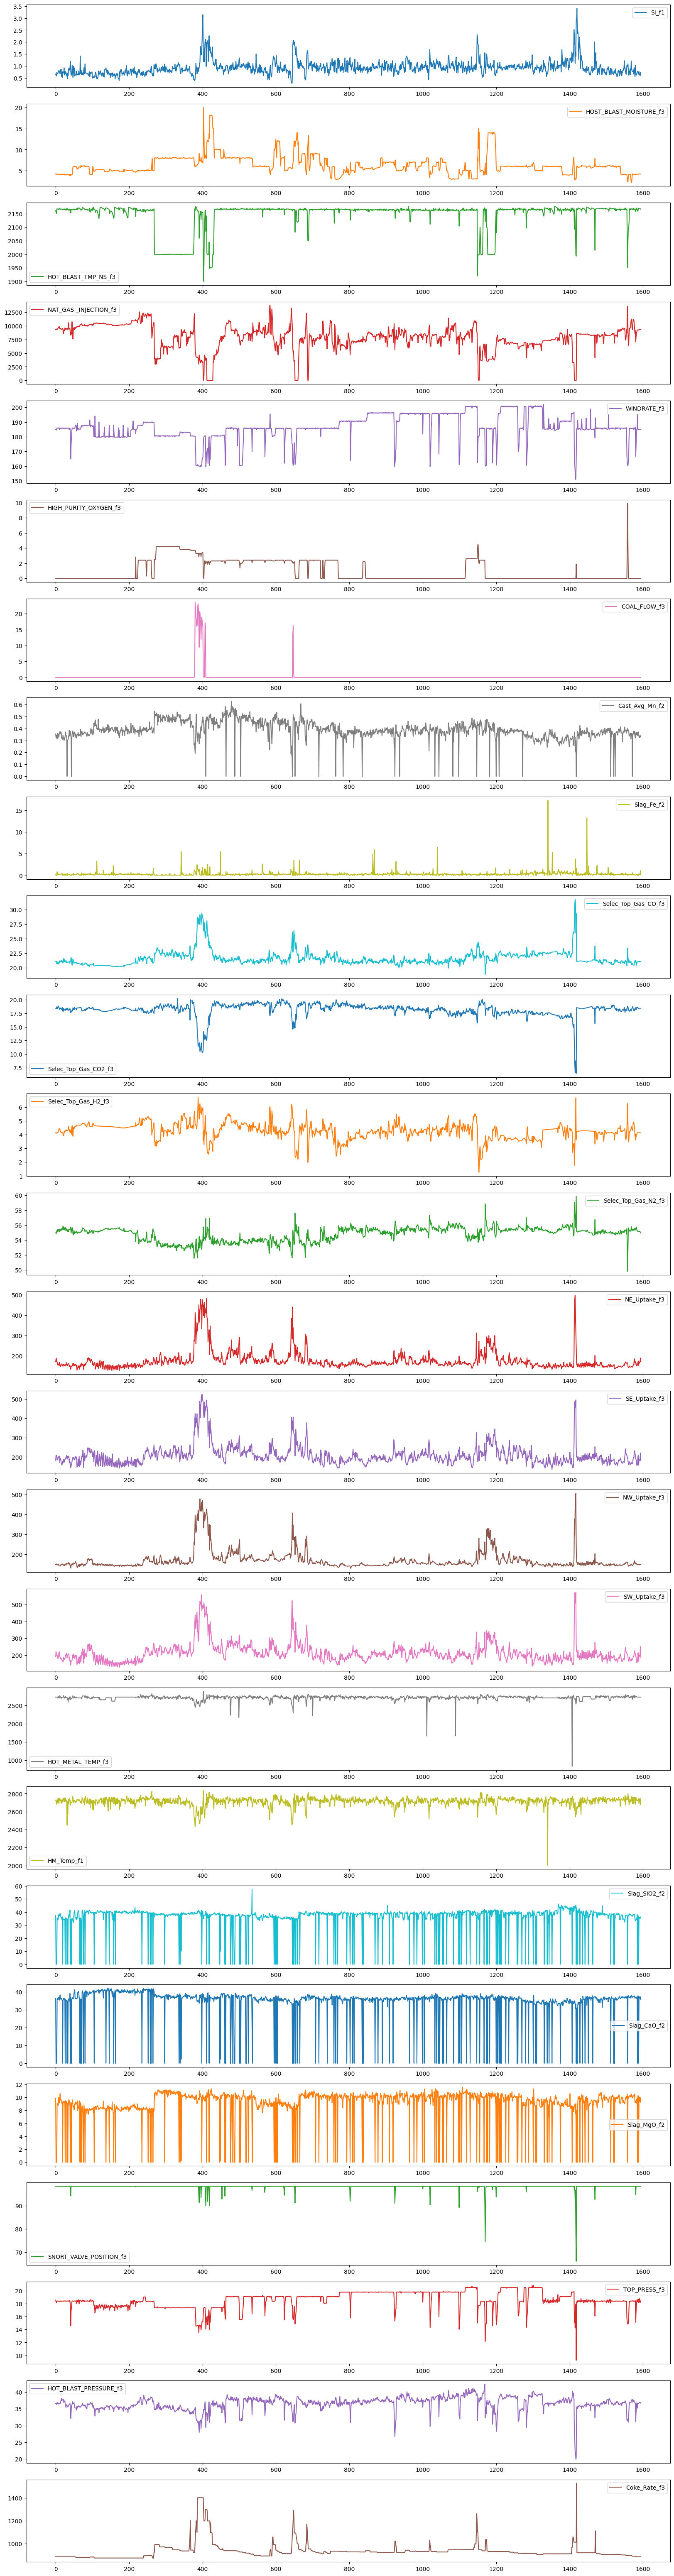

In [18]:

## layout=(4, 3), 
## style=['r', 'r', 'r', 'g', 'g', 'g', 'b', 'b', 'b', 'r', 'r', 'r'],
## xticks=np.arange(0, len(df), 16)

## for_RNN_data_CIVS.plot( xticks=rc22, figsize=(20,80),  subplots=True   )

## x='MM_Timestamp_f1' ,

for_RNN_data_CIVS.plot( kind='line', subplots=True, figsize=(20,80),
        sharex=False, sharey=False, legend=True )


In [19]:

l_new


['SI_f1',
 'HOST_BLAST_MOISTURE_f3',
 'HOT_BLAST_TMP_NS_f3',
 'NAT_GAS _INJECTION_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'HOT_METAL_TEMP_f3',
 'HM_Temp_f1',
 'Slag_SiO2_f2',
 'Slag_CaO_f2',
 'Slag_MgO_f2',
 'SNORT_VALVE_POSITION_f3',
 'TOP_PRESS_f3',
 'HOT_BLAST_PRESSURE_f3',
 'Coke_Rate_f3']


## Back to the Data Processing


In [20]:

for_RNN_data_CIVS.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1595 entries, 0 to 1594
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1595 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1595 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1595 non-null   float64
 3   NAT_GAS _INJECTION_f3    1595 non-null   float64
 4   WINDRATE_f3              1595 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1595 non-null   float64
 6   COAL_FLOW_f3             1595 non-null   float64
 7   Cast_Avg_Mn_f2           1595 non-null   float64
 8   Slag_Fe_f2               1595 non-null   float64
 9   Selec_Top_Gas_CO_f3      1595 non-null   float64
 10  Selec_Top_Gas_CO2_f3     1595 non-null   float64
 11  Selec_Top_Gas_H2_f3      1595 non-null   float64
 12  Selec_Top_Gas_N2_f3      1595 non-null   float64
 13  NE_Uptake_f3             1595 non-null   float64
 14  SE_Uptake_f3            

In [21]:

for_RNN_data_CIVS


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
0     0.655900                4.242439          2161.425209   
1     0.608500                4.250658          2155.622815   
2     0.575508                4.257849          2150.390786   
3     0.719500                4.133909          2167.094817   
4     0.710486                4.174343          2168.238915   
...        ...                     ...                  ...   
1590  0.646000                4.208539          2169.079601   
1591  0.654667                4.212648          2168.797556   
1592  0.591667                4.217784          2168.444999   
1593  0.724667                4.223948          2167.967389   
1594  0.628625                4.230112          2166.628469   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               9306.840913   184.818611                    0.0           0.0   
1               9317.204202   185.000295                    0.0           0.0   
2               9379.027265   184.611966                    0.0           0.0   
3               9442.367486   185.744793                    0.0           0.0   
4               9336.364456   185.993447                    0.0           0.0   
...                     ...          ...                    ...           ...   
1590            9312.779010   185.053796                    0.0           0.0   
1591            9303.753420   185.007919                    0.0           0.0   
1592            9333.448101   184.942435                    0.0           0.0   
1593            9321.819731   184.863855                    0.0           0.0   
1594            9293.853451   184.785275                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  Selec_Top_Gas_CO_f3  ...  SW_Uptake_f3  \
0              0.354        0.16            21.080431  ...    192.512412   
1              0.323        0.00            21.089264  ...    221.646579   
2              0.330        0.00            21.096992  ...    207.505852   
3              0.345        0.00            20.670933  ...    201.510393   
4              0.313        0.83            20.996415  ...    192.366046   
...              ...         ...                  ...  ...           ...   
1590           0.324        0.30            21.043999  ...    193.501805   
1591           0.325        0.16            21.048415  ...    194.328694   
1592           0.335        0.26            21.053935  ...    215.606202   
1593           0.328        1.08            21.060559  ...    250.937261   
1594           0.342        0.19            21.067183  ...    184.739374   

      HOT_METAL_TEMP_f3   HM_Temp_f1  Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  \
0           2730.002686  2726.666667     37.369999    36.439999         9.86   
1           2730.002686  2727.400000      0.000000     0.000000         0.00   
2           2730.002686  2690.500000      0.000000     0.000000         0.00   
3           2727.202379  2681.192953      0.000000     0.000000         0.00   
4           2730.002686  2724.225000     35.540001    35.970001         9.03   
...                 ...          ...           ...          ...          ...   
1590        2730.002686  2739.000000     35.900002    37.259998        10.04   
1591        2730.002686  2710.500000     35.580002    36.500000         9.30   
1592        2730.002686  2750.000000     35.130001    37.470001        10.01   
1593        2730.002686  2678.333333     35.570000    36.970001         9.47   
1594        2730.002686  2725.333333     36.180000    35.810001         9.22   

      SNORT_VALVE_POSITION_f3  TOP_PRESS_f3  HOT_BLAST_PRESSURE_f3  \
0                   98.334297     18.532928              36.602600   
1                   98.334297     18.275620              36.601051   
2                   98.334297     18.134174              36.599696   
3                   98.334297     18.378320              36.262273   
4                   98.334297     18.397217            


## Iterate and mark transitions


In [22]:
'''
for_RNN_data_CIVS.insert(       loc = 0,
                                column = 'control1',
                                value = 0)


for_RNN_data_CIVS.insert(       loc = 0,
                                column = 'control4',
                                value = 0)


for_RNN_data_CIVS.insert(       loc = 0,
                                column = 'control2',
                                value = 0)


for_RNN_data_CIVS.insert(       loc = 0,
                                column = 'control3',
                                value = 0)



for_RNN_data_CIVS
'''

"\nfor_RNN_data_CIVS.insert(       loc = 0,\n                                column = 'control1',\n                                value = 0)\n\n\nfor_RNN_data_CIVS.insert(       loc = 0,\n                                column = 'control4',\n                                value = 0)\n\n\nfor_RNN_data_CIVS.insert(       loc = 0,\n                                column = 'control2',\n                                value = 0)\n\n\nfor_RNN_data_CIVS.insert(       loc = 0,\n                                column = 'control3',\n                                value = 0)\n\n\n\nfor_RNN_data_CIVS\n"

In [23]:
'''
indeces_to_2500_control2 = []

indeces_to_2500 = [] 

counter_control2 = 0

counter = 500

prev_val = 0.0
    
for index, row in for_RNN_data_CIVS.iterrows():

    ## print( row["SI_f1"]  )
    #########################################################################
    if row["SI_f1"] == prev_val:
        for_RNN_data_CIVS.at[index, 'control1'] = counter
        counter = counter + 1
        indeces_to_2500.append( index )
    else:
        if counter > 2000:
            ## print(counter)
            ## input()
            for_RNN_data_CIVS["control4"][indeces_to_2500 ] = 1
            indeces_to_2500 = []
        else:
            indeces_to_2500 = []
        counter = 0

    ##########################################################################
    if row["SI_f1"] != prev_val:
        for_RNN_data_CIVS.at[index, 'control2'] = counter_control2
        counter_control2 = counter_control2 + 1
        indeces_to_2500_control2.append(  index  )
    else:
        if counter_control2 > 2000:
            ## print(counter)
            ## input()
            for_RNN_data_CIVS["control4"][indeces_to_2500_control2 ] = 1
            indeces_to_2500_control2 = []
        else:
            indeces_to_2500_control2 = []
        counter_control2 = 0

    ##########################################################################
    if row["SI_f1"] == prev_val:
        for_RNN_data_CIVS.at[index, 'control3'] = 1.0

    ##########################################################################
    if index  % 50000 == 0:
        print(index )
    prev_val = row["SI_f1"]
        
    
'''
    


'\nindeces_to_2500_control2 = []\n\nindeces_to_2500 = [] \n\ncounter_control2 = 0\n\ncounter = 500\n\nprev_val = 0.0\n    \nfor index, row in for_RNN_data_CIVS.iterrows():\n\n    ## print( row["SI_f1"]  )\n    #########################################################################\n    if row["SI_f1"] == prev_val:\n        for_RNN_data_CIVS.at[index, \'control1\'] = counter\n        counter = counter + 1\n        indeces_to_2500.append( index )\n    else:\n        if counter > 2000:\n            ## print(counter)\n            ## input()\n            for_RNN_data_CIVS["control4"][indeces_to_2500 ] = 1\n            indeces_to_2500 = []\n        else:\n            indeces_to_2500 = []\n        counter = 0\n\n    ##########################################################################\n    if row["SI_f1"] != prev_val:\n        for_RNN_data_CIVS.at[index, \'control2\'] = counter_control2\n        counter_control2 = counter_control2 + 1\n        indeces_to_2500_control2.append(  index  )

In [24]:
'''
## for_RNN_data_CIVS.plot(  figsize=(20,80),  subplots=True   )


for_RNN_data_CIVS.plot(x='MM_Timestamp_f1' , kind='line', subplots=True, figsize=(20,80),
        sharex=False, sharey=False, legend=True )
'''

"\n## for_RNN_data_CIVS.plot(  figsize=(20,80),  subplots=True   )\n\n\nfor_RNN_data_CIVS.plot(x='MM_Timestamp_f1' , kind='line', subplots=True, figsize=(20,80),\n        sharex=False, sharey=False, legend=True )\n"

In [25]:

for_RNN_data_CIVS


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
0     0.655900                4.242439          2161.425209   
1     0.608500                4.250658          2155.622815   
2     0.575508                4.257849          2150.390786   
3     0.719500                4.133909          2167.094817   
4     0.710486                4.174343          2168.238915   
...        ...                     ...                  ...   
1590  0.646000                4.208539          2169.079601   
1591  0.654667                4.212648          2168.797556   
1592  0.591667                4.217784          2168.444999   
1593  0.724667                4.223948          2167.967389   
1594  0.628625                4.230112          2166.628469   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               9306.840913   184.818611                    0.0           0.0   
1               9317.204202   185.000295                    0.0           0.0   
2               9379.027265   184.611966                    0.0           0.0   
3               9442.367486   185.744793                    0.0           0.0   
4               9336.364456   185.993447                    0.0           0.0   
...                     ...          ...                    ...           ...   
1590            9312.779010   185.053796                    0.0           0.0   
1591            9303.753420   185.007919                    0.0           0.0   
1592            9333.448101   184.942435                    0.0           0.0   
1593            9321.819731   184.863855                    0.0           0.0   
1594            9293.853451   184.785275                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  Selec_Top_Gas_CO_f3  ...  SW_Uptake_f3  \
0              0.354        0.16            21.080431  ...    192.512412   
1              0.323        0.00            21.089264  ...    221.646579   
2              0.330        0.00            21.096992  ...    207.505852   
3              0.345        0.00            20.670933  ...    201.510393   
4              0.313        0.83            20.996415  ...    192.366046   
...              ...         ...                  ...  ...           ...   
1590           0.324        0.30            21.043999  ...    193.501805   
1591           0.325        0.16            21.048415  ...    194.328694   
1592           0.335        0.26            21.053935  ...    215.606202   
1593           0.328        1.08            21.060559  ...    250.937261   
1594           0.342        0.19            21.067183  ...    184.739374   

      HOT_METAL_TEMP_f3   HM_Temp_f1  Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  \
0           2730.002686  2726.666667     37.369999    36.439999         9.86   
1           2730.002686  2727.400000      0.000000     0.000000         0.00   
2           2730.002686  2690.500000      0.000000     0.000000         0.00   
3           2727.202379  2681.192953      0.000000     0.000000         0.00   
4           2730.002686  2724.225000     35.540001    35.970001         9.03   
...                 ...          ...           ...          ...          ...   
1590        2730.002686  2739.000000     35.900002    37.259998        10.04   
1591        2730.002686  2710.500000     35.580002    36.500000         9.30   
1592        2730.002686  2750.000000     35.130001    37.470001        10.01   
1593        2730.002686  2678.333333     35.570000    36.970001         9.47   
1594        2730.002686  2725.333333     36.180000    35.810001         9.22   

      SNORT_VALVE_POSITION_f3  TOP_PRESS_f3  HOT_BLAST_PRESSURE_f3  \
0                   98.334297     18.532928              36.602600   
1                   98.334297     18.275620              36.601051   
2                   98.334297     18.134174              36.599696   
3                   98.334297     18.378320              36.262273   
4                   98.334297     18.397217            


## Drop row with value above x


In [26]:
'''
## for_RNN_data_CIVS = for_RNN_data_CIVS.drop( for_RNN_data_CIVS[ for_RNN_data_CIVS.control4 == 1 ].index ) ## , inplace = True)

for_RNN_data_CIVS = for_RNN_data_CIVS [ for_RNN_data_CIVS ["control4"] == 0].reset_index( drop=True )  ## this one
'''

'\n## for_RNN_data_CIVS = for_RNN_data_CIVS.drop( for_RNN_data_CIVS[ for_RNN_data_CIVS.control4 == 1 ].index ) ## , inplace = True)\n\nfor_RNN_data_CIVS = for_RNN_data_CIVS [ for_RNN_data_CIVS ["control4"] == 0].reset_index( drop=True )  ## this one\n'

In [27]:

## for_RNN_data_CIVS


In [28]:
'''
## for_RNN_data_CIVS.plot(  figsize=(20,80),  subplots=True   )

for_RNN_data_CIVS.plot( kind='line', subplots=True, figsize=(20,80),
        sharex=False, sharey=False, legend=True )
'''

"\n## for_RNN_data_CIVS.plot(  figsize=(20,80),  subplots=True   )\n\nfor_RNN_data_CIVS.plot( kind='line', subplots=True, figsize=(20,80),\n        sharex=False, sharey=False, legend=True )\n"

In [29]:

for_RNN_data_CIVS.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1595 entries, 0 to 1594
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1595 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1595 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1595 non-null   float64
 3   NAT_GAS _INJECTION_f3    1595 non-null   float64
 4   WINDRATE_f3              1595 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1595 non-null   float64
 6   COAL_FLOW_f3             1595 non-null   float64
 7   Cast_Avg_Mn_f2           1595 non-null   float64
 8   Slag_Fe_f2               1595 non-null   float64
 9   Selec_Top_Gas_CO_f3      1595 non-null   float64
 10  Selec_Top_Gas_CO2_f3     1595 non-null   float64
 11  Selec_Top_Gas_H2_f3      1595 non-null   float64
 12  Selec_Top_Gas_N2_f3      1595 non-null   float64
 13  NE_Uptake_f3             1595 non-null   float64
 14  SE_Uptake_f3            

In [30]:

for_RNN_data_CIVS


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
0     0.655900                4.242439          2161.425209   
1     0.608500                4.250658          2155.622815   
2     0.575508                4.257849          2150.390786   
3     0.719500                4.133909          2167.094817   
4     0.710486                4.174343          2168.238915   
...        ...                     ...                  ...   
1590  0.646000                4.208539          2169.079601   
1591  0.654667                4.212648          2168.797556   
1592  0.591667                4.217784          2168.444999   
1593  0.724667                4.223948          2167.967389   
1594  0.628625                4.230112          2166.628469   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               9306.840913   184.818611                    0.0           0.0   
1               9317.204202   185.000295                    0.0           0.0   
2               9379.027265   184.611966                    0.0           0.0   
3               9442.367486   185.744793                    0.0           0.0   
4               9336.364456   185.993447                    0.0           0.0   
...                     ...          ...                    ...           ...   
1590            9312.779010   185.053796                    0.0           0.0   
1591            9303.753420   185.007919                    0.0           0.0   
1592            9333.448101   184.942435                    0.0           0.0   
1593            9321.819731   184.863855                    0.0           0.0   
1594            9293.853451   184.785275                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  Selec_Top_Gas_CO_f3  ...  SW_Uptake_f3  \
0              0.354        0.16            21.080431  ...    192.512412   
1              0.323        0.00            21.089264  ...    221.646579   
2              0.330        0.00            21.096992  ...    207.505852   
3              0.345        0.00            20.670933  ...    201.510393   
4              0.313        0.83            20.996415  ...    192.366046   
...              ...         ...                  ...  ...           ...   
1590           0.324        0.30            21.043999  ...    193.501805   
1591           0.325        0.16            21.048415  ...    194.328694   
1592           0.335        0.26            21.053935  ...    215.606202   
1593           0.328        1.08            21.060559  ...    250.937261   
1594           0.342        0.19            21.067183  ...    184.739374   

      HOT_METAL_TEMP_f3   HM_Temp_f1  Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  \
0           2730.002686  2726.666667     37.369999    36.439999         9.86   
1           2730.002686  2727.400000      0.000000     0.000000         0.00   
2           2730.002686  2690.500000      0.000000     0.000000         0.00   
3           2727.202379  2681.192953      0.000000     0.000000         0.00   
4           2730.002686  2724.225000     35.540001    35.970001         9.03   
...                 ...          ...           ...          ...          ...   
1590        2730.002686  2739.000000     35.900002    37.259998        10.04   
1591        2730.002686  2710.500000     35.580002    36.500000         9.30   
1592        2730.002686  2750.000000     35.130001    37.470001        10.01   
1593        2730.002686  2678.333333     35.570000    36.970001         9.47   
1594        2730.002686  2725.333333     36.180000    35.810001         9.22   

      SNORT_VALVE_POSITION_f3  TOP_PRESS_f3  HOT_BLAST_PRESSURE_f3  \
0                   98.334297     18.532928              36.602600   
1                   98.334297     18.275620              36.601051   
2                   98.334297     18.134174              36.599696   
3                   98.334297     18.378320              36.262273   
4                   98.334297     18.397217            


## Average the rows to control time step



## Sanity check


In [31]:



data = [
[20 , 9,   15,  47],
[2,   50,  25,  26],
[4,   11,  38,  44],
[6,   33,  16,  25],
[8 ,  37,  27,  25],
[10,  28,  48,  32],
[12,  47,  35,  45],
[14,  8,   16,  7],
[16,  12,  16,  30],
[18 , 22,  39 , 29],
[20 , 9,   15,  47],
[20 , 9,   15,  47],
[2,   50,  25,  26],
[4,   11,  38,  44],
[6,   33,  16,  25],
[8 ,  37,  27,  25],
[10,  28,  48,  32],
[12,  47,  35,  45],
[14,  8,   16,  7],
[16,  12,  16,  30],
[18 , 22,  39 , 29],
[20 , 9,   15,  47],
[2,   50,  25,  26],
[4,   11,  38,  44],
[6,   33,  16,  25],
[8 ,  37,  27,  25],
[10,  28,  48,  32],
[12,  47,  35,  45],
[14,  8,   16,  7],
[16,  12,  16,  30]
]



df_example = pd.DataFrame( data, columns=['a', 'b', 'c', 'd'] )
 

print(df_example)


     a   b   c   d
0   20   9  15  47
1    2  50  25  26
2    4  11  38  44
3    6  33  16  25
4    8  37  27  25
5   10  28  48  32
6   12  47  35  45
7   14   8  16   7
8   16  12  16  30
9   18  22  39  29
10  20   9  15  47
11  20   9  15  47
12   2  50  25  26
13   4  11  38  44
14   6  33  16  25
15   8  37  27  25
16  10  28  48  32
17  12  47  35  45
18  14   8  16   7
19  16  12  16  30
20  18  22  39  29
21  20   9  15  47
22   2  50  25  26
23   4  11  38  44
24   6  33  16  25
25   8  37  27  25
26  10  28  48  32
27  12  47  35  45
28  14   8  16   7
29  16  12  16  30


In [32]:

print(df_example.shape)


(30, 4)


In [33]:

## avg_df_example = df_example.groupby(np.arange(len(df_example))//avg_the_rows_parameter).mean()
## avg_df_example.shape


In [34]:

## avg_df_example



## Now Avg to change time step


In [35]:

## for_RNN_data_CIVS

print(for_RNN_data_CIVS.shape)


(1595, 26)


In [36]:
'''
for_RNN_data_CIVS = for_RNN_data_CIVS.groupby(np.arange(len(for_RNN_data_CIVS))//avg_the_rows_parameter).mean()
for_RNN_data_CIVS.shape
'''

'\nfor_RNN_data_CIVS = for_RNN_data_CIVS.groupby(np.arange(len(for_RNN_data_CIVS))//avg_the_rows_parameter).mean()\nfor_RNN_data_CIVS.shape\n'

In [37]:

for_RNN_data_CIVS


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
0     0.655900                4.242439          2161.425209   
1     0.608500                4.250658          2155.622815   
2     0.575508                4.257849          2150.390786   
3     0.719500                4.133909          2167.094817   
4     0.710486                4.174343          2168.238915   
...        ...                     ...                  ...   
1590  0.646000                4.208539          2169.079601   
1591  0.654667                4.212648          2168.797556   
1592  0.591667                4.217784          2168.444999   
1593  0.724667                4.223948          2167.967389   
1594  0.628625                4.230112          2166.628469   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               9306.840913   184.818611                    0.0           0.0   
1               9317.204202   185.000295                    0.0           0.0   
2               9379.027265   184.611966                    0.0           0.0   
3               9442.367486   185.744793                    0.0           0.0   
4               9336.364456   185.993447                    0.0           0.0   
...                     ...          ...                    ...           ...   
1590            9312.779010   185.053796                    0.0           0.0   
1591            9303.753420   185.007919                    0.0           0.0   
1592            9333.448101   184.942435                    0.0           0.0   
1593            9321.819731   184.863855                    0.0           0.0   
1594            9293.853451   184.785275                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  Selec_Top_Gas_CO_f3  ...  SW_Uptake_f3  \
0              0.354        0.16            21.080431  ...    192.512412   
1              0.323        0.00            21.089264  ...    221.646579   
2              0.330        0.00            21.096992  ...    207.505852   
3              0.345        0.00            20.670933  ...    201.510393   
4              0.313        0.83            20.996415  ...    192.366046   
...              ...         ...                  ...  ...           ...   
1590           0.324        0.30            21.043999  ...    193.501805   
1591           0.325        0.16            21.048415  ...    194.328694   
1592           0.335        0.26            21.053935  ...    215.606202   
1593           0.328        1.08            21.060559  ...    250.937261   
1594           0.342        0.19            21.067183  ...    184.739374   

      HOT_METAL_TEMP_f3   HM_Temp_f1  Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  \
0           2730.002686  2726.666667     37.369999    36.439999         9.86   
1           2730.002686  2727.400000      0.000000     0.000000         0.00   
2           2730.002686  2690.500000      0.000000     0.000000         0.00   
3           2727.202379  2681.192953      0.000000     0.000000         0.00   
4           2730.002686  2724.225000     35.540001    35.970001         9.03   
...                 ...          ...           ...          ...          ...   
1590        2730.002686  2739.000000     35.900002    37.259998        10.04   
1591        2730.002686  2710.500000     35.580002    36.500000         9.30   
1592        2730.002686  2750.000000     35.130001    37.470001        10.01   
1593        2730.002686  2678.333333     35.570000    36.970001         9.47   
1594        2730.002686  2725.333333     36.180000    35.810001         9.22   

      SNORT_VALVE_POSITION_f3  TOP_PRESS_f3  HOT_BLAST_PRESSURE_f3  \
0                   98.334297     18.532928              36.602600   
1                   98.334297     18.275620              36.601051   
2                   98.334297     18.134174              36.599696   
3                   98.334297     18.378320              36.262273   
4                   98.334297     18.397217            


## Create datasets of selected features


In [38]:

pd.options.display.max_columns = None


In [39]:

def window_seq_conversion_multi_feature(df, window, target_index):
    d = df.values
    ## print( d )
    print( d.shape )
    x = []
    n = len(df)
    n_features = df.shape[1]
    ## print(n_features)
    ## print(n)

    idx = df.index[ : -window]
    print(idx)
    print(  idx.shape  )


    for start in range(n-window):
        end = start + window
        ## print(start, "....", end)
        x.append( d[ start:end, : ] )

    ## print(x)
    cols_x = [ f'xt_{i}_fx_{j}' for i in range(1, window+1) for j in range(0, n_features)]
    cols_y = [ f'y_fy_{j}' for j in range(0, n_features)]
    ## print(  cols  )

    x = np.array(x)
    print(x.shape)
    x = np.array(x).reshape(n-window, -1)
    print(x.shape)

    y = df.iloc[ window: , : ].values
    print( y.shape )
    ## print( y.reshape(-1).shape )

    df_xs = pd.DataFrame(x  , columns=cols_x,  index=idx)
    df_y  = pd.DataFrame(y  , columns=cols_y,  index=idx)
    ## print(df_y)
    return pd.concat( [df_xs, df_y], axis=1 )



## Make Data Sequential


In [40]:

 
res_multi_feature_df = window_seq_conversion_multi_feature( for_RNN_data_CIVS, window,  silicon_feature_index )


(1595, 26)
RangeIndex(start=0, stop=1590, step=1)
(1590,)
(1590, 5, 26)
(1590, 130)
(1590, 26)


In [41]:

res_multi_feature_df


xt_1_fx_0  xt_1_fx_1    xt_1_fx_2    xt_1_fx_3   xt_1_fx_4  xt_1_fx_5  \
0      0.655900   4.242439  2161.425209  9306.840913  184.818611        0.0   
1      0.608500   4.250658  2155.622815  9317.204202  185.000295        0.0   
2      0.575508   4.257849  2150.390786  9379.027265  184.611966        0.0   
3      0.719500   4.133909  2167.094817  9442.367486  185.744793        0.0   
4      0.710486   4.174343  2168.238915  9336.364456  185.993447        0.0   
...         ...        ...          ...          ...         ...        ...   
1585   0.768250   4.180585  2162.245209  9256.475789  195.363549        0.0   
1586   0.762333   4.185938  2158.690664  9233.896469  185.425250        0.0   
1587   0.682833   4.193129  2166.798490  9227.040194  185.068165        0.0   
1588   0.653000   4.199293  2169.643686  9245.015682  185.103955        0.0   
1589   0.762500   4.204430  2169.361647  9297.484543  185.046491        0.0   

      xt_1_fx_6  xt_1_fx_7  xt_1_fx_8  xt_1_fx_9  xt_1_fx_10  xt_1_fx_11  \
0           0.0      0.354       0.16  21.080431   18.313322    4.131228   
1           0.0      0.323       0.00  21.089264   18.314424    4.131604   
2           0.0      0.330       0.00  21.096992   18.315388    4.131934   
3           0.0      0.345       0.00  20.670933   18.674410    4.087428   
4           0.0      0.313       0.83  20.996415   18.311768    4.133911   
...         ...        ...        ...        ...         ...         ...   
1585        0.0      0.342       0.00  21.011983   18.557393    4.128308   
1586        0.0      0.369       0.15  21.019711   18.545295    4.128638   
1587        0.0      0.371       0.26  21.027439   18.306710    4.128967   
1588        0.0      0.337       0.00  21.034063   18.307536    4.129250   
1589        0.0      0.343       0.30  21.039583   18.308225    4.129485   

      xt_1_fx_12  xt_1_fx_13  xt_1_fx_14  xt_1_fx_15  xt_1_fx_16   xt_1_fx_17  \
0      54.940123  171.769513  182.533770  148.126483  192.512412  2730.002686   
1      54.913984  183.565890  208.733399  148.131446  221.646579  2730.002686   
2      54.888695  187.130836  208.023577  148.135788  207.505852  2730.002686   
3      55.234706  170.263606  204.938759  151.867413  201.510393  2727.202379   
4      55.072779  170.595469  183.725050  148.161842  192.366046  2730.002686   
...          ...         ...         ...         ...         ...          ...   
1585   55.208776  156.033995  164.030909  148.088022  169.045316  2730.002686   
1586   55.111536  168.325562  198.804627  148.092364  211.545443  2730.002686   
1587   55.144316  174.761601  210.053446  148.096707  213.421269  2730.002686   
1588   55.136044  153.154744  158.295286  148.100429  161.614191  2730.002686   
1589   55.162782  167.619915  185.900341  148.103530  199.914193  2730.002686   

       xt_1_fx_18  xt_1_fx_19  xt_1_fx_20  xt_1_fx_21  xt_1_fx_22  xt_1_fx_23  \
0     2726.666667   37.369999   36.439999        9.86   98.334297   18.532928   
1     2727.400000    0.000000    0.000000        0.00   98.334297   18.275620   
2     2690.500000    0.000000    0.000000        0.00   98.334297   18.134174   
3     2681.192953    0.000000    0.000000        0.00   98.334297   18.378320   
4     2724.225000   35.540001   35.970001        9.03   98.334297   18.397217   
...           ...         ...         ...         ...         ...         ...   
1585  2725.666667    0.000000    0.000000        0.00   98.334297   18.312952   
1586  2721.500000   37.230000   37.930000       10.24   98.334297   18.460356   
1587  2743.000000   36.680000   37.650002       10.23   98.334297   18.152570   
1588  2735.666667    0.000000    0.000000        0.00   98.334297   18.666594   
1589  2690.000000   35.900002   37.259998       10.04   98.334297   18.209401   

      xt_1_fx_24  xt_1_fx_25  xt_2_fx_0  xt_2_fx_1    xt_2_fx_2    xt_2_fx_3  \
0      36.602600       884.0   0.608500   4.250658  2155.622815  9317.204202   
1      36.601051       884.0   0.57550

In [42]:

print( res_multi_feature_df.shape )


(1590, 156)



## Drop desired columns from Sequential Data Frame (such as silicon from X)


In [43]:

'''

df = res_multi_feature_df

df.drop(  list(   df.filter(regex='_fx_0')   ), axis=1, inplace=True)

no_silicon_in_seq_X_df = df

print( df.shape )

'''


"\n\ndf = res_multi_feature_df\n\ndf.drop(  list(   df.filter(regex='_fx_0')   ), axis=1, inplace=True)\n\nno_silicon_in_seq_X_df = df\n\nprint( df.shape )\n\n"

In [44]:

print( res_multi_feature_df.shape )


(1590, 156)


In [45]:

res_multi_feature_df


xt_1_fx_0  xt_1_fx_1    xt_1_fx_2    xt_1_fx_3   xt_1_fx_4  xt_1_fx_5  \
0      0.655900   4.242439  2161.425209  9306.840913  184.818611        0.0   
1      0.608500   4.250658  2155.622815  9317.204202  185.000295        0.0   
2      0.575508   4.257849  2150.390786  9379.027265  184.611966        0.0   
3      0.719500   4.133909  2167.094817  9442.367486  185.744793        0.0   
4      0.710486   4.174343  2168.238915  9336.364456  185.993447        0.0   
...         ...        ...          ...          ...         ...        ...   
1585   0.768250   4.180585  2162.245209  9256.475789  195.363549        0.0   
1586   0.762333   4.185938  2158.690664  9233.896469  185.425250        0.0   
1587   0.682833   4.193129  2166.798490  9227.040194  185.068165        0.0   
1588   0.653000   4.199293  2169.643686  9245.015682  185.103955        0.0   
1589   0.762500   4.204430  2169.361647  9297.484543  185.046491        0.0   

      xt_1_fx_6  xt_1_fx_7  xt_1_fx_8  xt_1_fx_9  xt_1_fx_10  xt_1_fx_11  \
0           0.0      0.354       0.16  21.080431   18.313322    4.131228   
1           0.0      0.323       0.00  21.089264   18.314424    4.131604   
2           0.0      0.330       0.00  21.096992   18.315388    4.131934   
3           0.0      0.345       0.00  20.670933   18.674410    4.087428   
4           0.0      0.313       0.83  20.996415   18.311768    4.133911   
...         ...        ...        ...        ...         ...         ...   
1585        0.0      0.342       0.00  21.011983   18.557393    4.128308   
1586        0.0      0.369       0.15  21.019711   18.545295    4.128638   
1587        0.0      0.371       0.26  21.027439   18.306710    4.128967   
1588        0.0      0.337       0.00  21.034063   18.307536    4.129250   
1589        0.0      0.343       0.30  21.039583   18.308225    4.129485   

      xt_1_fx_12  xt_1_fx_13  xt_1_fx_14  xt_1_fx_15  xt_1_fx_16   xt_1_fx_17  \
0      54.940123  171.769513  182.533770  148.126483  192.512412  2730.002686   
1      54.913984  183.565890  208.733399  148.131446  221.646579  2730.002686   
2      54.888695  187.130836  208.023577  148.135788  207.505852  2730.002686   
3      55.234706  170.263606  204.938759  151.867413  201.510393  2727.202379   
4      55.072779  170.595469  183.725050  148.161842  192.366046  2730.002686   
...          ...         ...         ...         ...         ...          ...   
1585   55.208776  156.033995  164.030909  148.088022  169.045316  2730.002686   
1586   55.111536  168.325562  198.804627  148.092364  211.545443  2730.002686   
1587   55.144316  174.761601  210.053446  148.096707  213.421269  2730.002686   
1588   55.136044  153.154744  158.295286  148.100429  161.614191  2730.002686   
1589   55.162782  167.619915  185.900341  148.103530  199.914193  2730.002686   

       xt_1_fx_18  xt_1_fx_19  xt_1_fx_20  xt_1_fx_21  xt_1_fx_22  xt_1_fx_23  \
0     2726.666667   37.369999   36.439999        9.86   98.334297   18.532928   
1     2727.400000    0.000000    0.000000        0.00   98.334297   18.275620   
2     2690.500000    0.000000    0.000000        0.00   98.334297   18.134174   
3     2681.192953    0.000000    0.000000        0.00   98.334297   18.378320   
4     2724.225000   35.540001   35.970001        9.03   98.334297   18.397217   
...           ...         ...         ...         ...         ...         ...   
1585  2725.666667    0.000000    0.000000        0.00   98.334297   18.312952   
1586  2721.500000   37.230000   37.930000       10.24   98.334297   18.460356   
1587  2743.000000   36.680000   37.650002       10.23   98.334297   18.152570   
1588  2735.666667    0.000000    0.000000        0.00   98.334297   18.666594   
1589  2690.000000   35.900002   37.259998       10.04   98.334297   18.209401   

      xt_1_fx_24  xt_1_fx_25  xt_2_fx_0  xt_2_fx_1    xt_2_fx_2    xt_2_fx_3  \
0      36.602600       884.0   0.608500   4.250658  2155.622815  9317.204202   
1      36.601051       884.0   0.57550


## Drop last in X input sequence

* predict the one not seen , i think




In [46]:

window_str = str(window)
window_str


'5'

In [47]:

string_match_last_seq = "xt_" + window_str
string_match_last_seq 


'xt_5'

In [48]:

'''

df = res_multi_feature_df

df.drop(  list(   df.filter(regex=string_match_last_seq)   ), axis=1, inplace=True)

no_silicon_in_seq_X_df = df

print( df.shape )

'''


'\n\ndf = res_multi_feature_df\n\ndf.drop(  list(   df.filter(regex=string_match_last_seq)   ), axis=1, inplace=True)\n\nno_silicon_in_seq_X_df = df\n\nprint( df.shape )\n\n'

In [49]:

print( res_multi_feature_df.shape )


(1590, 156)


In [50]:

res_multi_feature_df


xt_1_fx_0  xt_1_fx_1    xt_1_fx_2    xt_1_fx_3   xt_1_fx_4  xt_1_fx_5  \
0      0.655900   4.242439  2161.425209  9306.840913  184.818611        0.0   
1      0.608500   4.250658  2155.622815  9317.204202  185.000295        0.0   
2      0.575508   4.257849  2150.390786  9379.027265  184.611966        0.0   
3      0.719500   4.133909  2167.094817  9442.367486  185.744793        0.0   
4      0.710486   4.174343  2168.238915  9336.364456  185.993447        0.0   
...         ...        ...          ...          ...         ...        ...   
1585   0.768250   4.180585  2162.245209  9256.475789  195.363549        0.0   
1586   0.762333   4.185938  2158.690664  9233.896469  185.425250        0.0   
1587   0.682833   4.193129  2166.798490  9227.040194  185.068165        0.0   
1588   0.653000   4.199293  2169.643686  9245.015682  185.103955        0.0   
1589   0.762500   4.204430  2169.361647  9297.484543  185.046491        0.0   

      xt_1_fx_6  xt_1_fx_7  xt_1_fx_8  xt_1_fx_9  xt_1_fx_10  xt_1_fx_11  \
0           0.0      0.354       0.16  21.080431   18.313322    4.131228   
1           0.0      0.323       0.00  21.089264   18.314424    4.131604   
2           0.0      0.330       0.00  21.096992   18.315388    4.131934   
3           0.0      0.345       0.00  20.670933   18.674410    4.087428   
4           0.0      0.313       0.83  20.996415   18.311768    4.133911   
...         ...        ...        ...        ...         ...         ...   
1585        0.0      0.342       0.00  21.011983   18.557393    4.128308   
1586        0.0      0.369       0.15  21.019711   18.545295    4.128638   
1587        0.0      0.371       0.26  21.027439   18.306710    4.128967   
1588        0.0      0.337       0.00  21.034063   18.307536    4.129250   
1589        0.0      0.343       0.30  21.039583   18.308225    4.129485   

      xt_1_fx_12  xt_1_fx_13  xt_1_fx_14  xt_1_fx_15  xt_1_fx_16   xt_1_fx_17  \
0      54.940123  171.769513  182.533770  148.126483  192.512412  2730.002686   
1      54.913984  183.565890  208.733399  148.131446  221.646579  2730.002686   
2      54.888695  187.130836  208.023577  148.135788  207.505852  2730.002686   
3      55.234706  170.263606  204.938759  151.867413  201.510393  2727.202379   
4      55.072779  170.595469  183.725050  148.161842  192.366046  2730.002686   
...          ...         ...         ...         ...         ...          ...   
1585   55.208776  156.033995  164.030909  148.088022  169.045316  2730.002686   
1586   55.111536  168.325562  198.804627  148.092364  211.545443  2730.002686   
1587   55.144316  174.761601  210.053446  148.096707  213.421269  2730.002686   
1588   55.136044  153.154744  158.295286  148.100429  161.614191  2730.002686   
1589   55.162782  167.619915  185.900341  148.103530  199.914193  2730.002686   

       xt_1_fx_18  xt_1_fx_19  xt_1_fx_20  xt_1_fx_21  xt_1_fx_22  xt_1_fx_23  \
0     2726.666667   37.369999   36.439999        9.86   98.334297   18.532928   
1     2727.400000    0.000000    0.000000        0.00   98.334297   18.275620   
2     2690.500000    0.000000    0.000000        0.00   98.334297   18.134174   
3     2681.192953    0.000000    0.000000        0.00   98.334297   18.378320   
4     2724.225000   35.540001   35.970001        9.03   98.334297   18.397217   
...           ...         ...         ...         ...         ...         ...   
1585  2725.666667    0.000000    0.000000        0.00   98.334297   18.312952   
1586  2721.500000   37.230000   37.930000       10.24   98.334297   18.460356   
1587  2743.000000   36.680000   37.650002       10.23   98.334297   18.152570   
1588  2735.666667    0.000000    0.000000        0.00   98.334297   18.666594   
1589  2690.000000   35.900002   37.259998       10.04   98.334297   18.209401   

      xt_1_fx_24  xt_1_fx_25  xt_2_fx_0  xt_2_fx_1    xt_2_fx_2    xt_2_fx_3  \
0      36.602600       884.0   0.608500   4.250658  2155.622815  9317.204202   
1      36.601051       884.0   0.57550


## Need to adjust windows based on previous step


In [51]:


## window = window - 1



In [52]:


window


5


## Utility Functions


In [53]:

class Standardize:
    
    def __init__(self, df, split=0.10):
        self.data  = df
        self.split = split
    
    def split_data(self):
        n           = int( len( self.data ) * self.split )
        train       = self.data.iloc[   :-n ] 
        test        = self.data.iloc[ -n:   ]
        n           = int( len(   train   ) * self.split )
        train       = train.iloc[   :-n ] 
        val         = train.iloc[ -n:   ]
        assert len(test) + len(train) + len(val) == len(self.data)
        return train, test, val
    
    def _transform(self, data):
        data_s = ( data - self.mu ) / self.sigma          
        return data_s
    
    def fit_transform(self):
        train, test, val    = self.split_data()
        self.mu             = train.mean() 
        self.sigma          = train.std()
        train_s             = self._transform( train )
        test_s              = self._transform( test  )
        val_s               = self._transform( val   )
        return train_s, test_s, val_s
    
    def inverse(self,   data):
        return ( data * self.sigma     ) + self.mu          ## all data
        
    def inverse_y(self, data):
        print(self.sigma.shape)
        print(self.mu.shape)
        print(self.mu[-vector_n_out:].shape)
        print(self.sigma[-vector_n_out:].shape)
        print(data.shape)
        the_sigma = self.sigma[-vector_n_out:]
        the_mu    = self.mu[-vector_n_out:]

        the_sigma = np.expand_dims(the_sigma, axis=0)
        the_mu    = np.expand_dims(the_mu,    axis=0)

        print(the_sigma.shape)
        print(the_sigma.shape)
        
        return ( data * the_sigma ) + the_mu       


In [54]:

scale_civs = Standardize(  res_multi_feature_df , split=0.20 )


In [55]:

train_si, test_si, val_si = scale_civs.fit_transform()


In [56]:

train_si


xt_1_fx_0  xt_1_fx_1  xt_1_fx_2  xt_1_fx_3  xt_1_fx_4  xt_1_fx_5  \
0     -0.864855  -1.094308   0.343107   0.499895  -0.029326  -0.959942   
1     -1.032656  -1.090633   0.241840   0.504211  -0.005574  -0.959942   
2     -1.149453  -1.087417   0.150528   0.529960  -0.056341  -0.959942   
3     -0.639704  -1.142839   0.442057   0.556340   0.091756  -0.959942   
4     -0.671615  -1.124758   0.462024   0.512191   0.124263  -0.959942   
...         ...        ...        ...        ...        ...        ...   
1013  -0.617830   0.605474   0.363652  -0.041041   1.407478  -0.959942   
1014  -0.641402   0.593920   0.384430   0.045911   1.418537  -0.959942   
1015  -0.183597   0.601438   0.380150   0.216867   1.428193  -0.959942   
1016  -1.653897   0.090609   0.340469   0.255764   1.391598  -0.959942   
1017  -0.445228  -0.882383   0.364806   0.640054   1.405220  -0.959942   

      xt_1_fx_6  xt_1_fx_7  xt_1_fx_8  xt_1_fx_9  xt_1_fx_10  xt_1_fx_11  \
0     -0.163733  -0.639753  -0.267938  -0.336654   -0.026097   -0.406944   
1     -0.163733  -1.033976  -0.611412  -0.330158   -0.025229   -0.406301   
2     -0.163733  -0.944958  -0.611412  -0.324475   -0.024470   -0.405737   
3     -0.163733  -0.754205  -0.611412  -0.637816    0.258342   -0.481790   
4     -0.163733  -1.161145   1.170358  -0.398443   -0.027322   -0.402358   
...         ...        ...        ...        ...         ...         ...   
1013  -0.163733  -0.296398  -0.031800  -0.239138   -0.416199    0.267466   
1014  -0.163733  -0.398133  -0.246471  -0.599389    0.182978    0.030763   
1015  -0.163733  -0.703338  -0.010333  -0.154317    0.005706    0.160761   
1016  -0.163733  -0.487151   0.247272   0.599088   -0.492764    0.085512   
1017  -0.163733  -2.445549  -0.246471   0.719513   -1.034048    0.032249   

      xt_1_fx_12  xt_1_fx_13  xt_1_fx_14  xt_1_fx_15  xt_1_fx_16  xt_1_fx_17  \
0       0.502382   -0.204969   -0.545470   -0.492774   -0.439148    0.302924   
1       0.474355    0.018701   -0.085185   -0.492679    0.028775    0.302924   
2       0.447238    0.086296   -0.097655   -0.492595   -0.198339    0.302924   
3       0.818248   -0.233523   -0.151850   -0.420570   -0.294632    0.260352   
4       0.644622   -0.227230   -0.524541   -0.492092   -0.441499    0.302924   
...          ...         ...         ...         ...         ...         ...   
1013    0.725659   -0.230673   -0.173866   -0.388824    0.134273   -0.058354   
1014    0.671120   -0.249306   -0.297934   -0.412432   -0.036669    0.028723   
1015    0.293883   -0.221348    0.124458   -0.427481   -0.037628    0.028723   
1016   -0.197193    0.772107    0.998187    0.151519    0.358082   -0.129573   
1017    0.528269    0.860834    1.319137    0.590525    0.740094   -1.609853   

      xt_1_fx_18  xt_1_fx_19  xt_1_fx_20  xt_1_fx_21  xt_1_fx_22  xt_1_fx_23  \
0       0.305227    0.211680    0.206493    0.378213    0.136585    0.093530   
1       0.320215   -3.368031   -3.344317   -3.214735    0.136585   -0.121395   
2      -0.433940   -3.368031   -3.344317   -3.214735    0.136585   -0.239542   
3      -0.624155   -3.368031   -3.344317   -3.214735    0.136585   -0.035612   
4       0.255325    0.036383    0.160695    0.075764    0.136585   -0.019827   
...          ...         ...         ...         ...         ...         ...   
1013   -0.266900    0.307471    0.154849    0.472956    0.136585    1.121633   
1014    0.088710    0.337167    0.211366    0.469312    0.136585    1.123248   
1015   -0.050765    0.348662    0.242547    0.574987    0.136585    1.137051   
1016   -0.699135    0.452116    0.173363    0.567699    0.136585    1.152367   
1017   -3.929225    0.335251    0.254240    0.571344    0.136585    1.117593   

      xt_1_fx_24  xt_1_fx_25  xt_2_fx_0  xt_2_fx_1  xt_2_fx_2  xt_2_fx_3  \
0       0.168442   -0.618341  -1.034291  -1.089859   0.241791   0.503760   
1       0.167541   -0.618341  -1.151111  -1.086645   0.150480   0.529503   
2       0.166753   -0.618341  -0.641262  -1.142044   0


## Some Sanity Checks


In [57]:

print( scale_civs.split)


0.2


In [58]:

print(f'''
SI: train: { len(train_si) } , val:{ len(val_si) }, test: { len(test_si) } 
''')



SI: train: 1018 , val:254, test: 318 



In [59]:

numpy_array = train_si.values
type(numpy_array)


numpy.ndarray

In [60]:

torch_tensor = torch.from_numpy(numpy_array)
type(torch_tensor)


torch.Tensor

In [61]:

from_torch_to_numpy = torch_tensor.detach().numpy()
type(from_torch_to_numpy)


numpy.ndarray


## Convert to Torch tensors Option 1


In [62]:


def Convert_to_RNN_tensors( list_data_civs ):
    
    y=[torch.from_numpy(col.iloc[ :,  -vector_n_out: ].values.reshape(-1, vector_n_out)   ).float()   for col in list_data_civs]
    x=[torch.from_numpy(col.iloc[ :, :-vector_n_out].values.reshape(*col.iloc[ :, :-vector_n_out].shape)).float() for col in list_data_civs]
    
    return y, x


In [63]:

list_data_civs = [ train_si, val_si, test_si ]

y, x           = Convert_to_RNN_tensors(   list_data_civs  )


In [64]:

y_train_si = y[0]
y_val_si   = y[1]
y_test_si  = y[2]
x_train_si = x[0]
x_val_si   = x[1]
x_test_si  = x[2]


In [65]:

print( y_train_si.shape )
print(   y_val_si.shape ) 
print(  y_test_si.shape ) 
print( x_train_si.shape )
print(   x_val_si.shape )
print(  x_test_si.shape )


torch.Size([1018, 26])
torch.Size([254, 26])
torch.Size([318, 26])
torch.Size([1018, 130])
torch.Size([254, 130])
torch.Size([318, 130])



## Parameters (set these manually)


In [66]:

vector_n_out


26

In [67]:

params_si = {
'seq_length': window,       ## this is the window
'input_size': vector_n_out, ## 18,  ## 4,      ## x input size -> my_4_cols = [  'SI_f1', 'HM_Temp_f1', 'Slag_CaO_f2', 'C_perce_sat_f1' ]
'output_size':vector_n_out,
'units': 50,         ## 32,                 ## neurons in hidden layers
'n_layers':1,
'epochs': 4000,
'print_every': 25,
'lr':  0.01,
'train_data': (x_train_si, y_train_si),
'val_data':     (x_val_si, y_val_si),
'test_data':   (x_test_si, y_test_si),
'idx': test_si.index,                        ## needed for validation, use test set here
'scale': scale_civs
}



plt.rcParams["figure.figsize"] = [14, 5] 


In [68]:

test_si.index


RangeIndex(start=1272, stop=1590, step=1)


## Training Function



In [69]:

def myKL_loss():
    kl_loss = nn.KLDivLoss(reduction="batchmean")
    input = F.log_softmax(torch.randn(3, 5, requires_grad=True), dim=1)

    target = F.softmax(torch.rand(3, 5), dim=1)
    output = kl_loss(input, target)


In [274]:

def train_model_pt(model_type='RNN', **kwargs):
    """
    Parameters:
        input_size: input size
        output_size: output size
        n_features: number of features (hidden dimension)
        n_layers: number of layers
        train_data: tuple ex (x_train, y_train)
        val_data: tuple ex (x_val, y_val)
        epochs: number of epochs
        print_every: output and history tracking
        lr: learning rate
    """
    if model_type=='RNN':
        model = RNN(kwargs['seq_length'],
                    kwargs['input_size'], 
                    kwargs['output_size'], 
                    kwargs['units'], 
                    kwargs['n_layers'])
    elif model_type=='LSTM':
        model = LSTM(kwargs['seq_length'],
                     kwargs['input_size'], 
                     kwargs['output_size'], 
                     kwargs['units'], 
                     kwargs['n_layers'])
    elif model_type=='GRU':
         model = LSTM(kwargs['seq_length'],
                      kwargs['input_size'], 
                      kwargs['output_size'], 
                      kwargs['units'], 
                      kwargs['n_layers'])

    
    ## criterion = nn.MSELoss()

    criterion    = nn.L1Loss()
    criterion_kl = nn.KLDivLoss(reduction="batchmean")
    
    optimizer = torch.optim.Adam(model.parameters(), lr=kwargs['lr'])
    
    x_train, y_train = kwargs['train_data']
    x_val, y_val     = kwargs['val_data']
    x_test, y_test   = kwargs['test_data']
    
    history = {'loss': [], 'val_loss': []}
    # batch_size = x_train.shape[0]
    model.train()
    epochs      = kwargs['epochs']
    print_every = kwargs['print_every']

    ## epochs = 200
    
    for batch_i, epoch in enumerate(range(epochs)):

        
        h = model.init_hidden( x_train.shape[0])
        optimizer.zero_grad()
        
        pred, h = model( x_train, h )   #model(x_train)
        #hidden = hidden.data

        ## print(pred.shape)
        ## print(y_train.shape)

        input_kl  = F.log_softmax(y_train, dim=1)
        target_kl = F.softmax(pred, dim=1)
        
        ## loss = criterion_kl(input_kl, target_kl)
        l1_lambda = 0.001
        l1_norm = sum(p.abs().sum() for p in model.parameters())
        ## loss    = criterion_kl(input_kl, target_kl)  + l1_lambda*l1_norm  

        
        loss =  criterion( pred, y_train ) + criterion_kl(input_kl, target_kl)
        
        loss.backward()
        optimizer.step()
        
        if batch_i % print_every == 0:
            model.eval()
            with torch.no_grad():
                val_h        = model.init_hidden( x_val.shape[0] )
                val_p, val_h = model(x_val, val_h)
                val_loss     = criterion(val_p, y_val)
                history['val_loss'].append(val_loss.item())
            model.train()
            history['loss'].append(loss.item())
            print(f'{batch_i}/{epochs} - Loss:  {loss.item()}, val_loss: {val_loss.item()}')
    
    ## Prediction
    model.eval()
    with torch.no_grad():
        h0    = model.init_hidden( x_test.shape[0] )
        y_hat = model(x_test, h0)
        
    y_hat, _ = y_hat
    mse_loss_air = criterion(y_hat, y_test)
    print(f'Test MSE Loss: {mse_loss_air.item():.4f}')
    
    ## Plotting
    fig, ax = plt.subplots(2, 1) 

    ax[0].set_title(f'{model_type}: Loss and Validation Loss per epoch')
    ax[0].plot(history['loss'], 'k--', label='loss')
    ax[0].plot(history['val_loss'], 'k', label='val_loss')
    ax[0].legend()
    ax[1].set_title(f"{model_type} TEST MSE = {mse_loss_air.item():.4f}: Forecast vs Actual (Out-of-Sample data)")
    scale = kwargs['scale']
    print("ricardo check this")
    print(y_test.shape)
    print(y_hat.shape )
    actual = scale.inverse_y(y_test.detach().numpy() ) ## .ravel() )
    pred   = scale.inverse_y( y_hat.detach().numpy() ) ## .ravel() )
    idx = kwargs['idx']
    ##pd.Series(actual, index=idx).plot(style='k--', label='actual', alpha=0.65, color='blue')
    ##pd.Series(pred,   index=idx).plot(style='k',   label='forecast' , color='red')
    print(actual.shape)
    print(pred.shape)
    actual = actual[:, 0]
    pred   =   pred[:, 0]
    pd.Series(actual, index=idx).plot( label='actual',    color='blue')
    pd.Series(pred,   index=idx).plot( label='forecast' , color='red' )
    fig.tight_layout()
    ax[1].legend(); plt.show()
    
    return model, history



## Inference Utility functions


In [275]:

def bins_inference_model_pt(model, x_test, y_test ):

    model_type='RNN'

    n_test = x_test.shape[0]

    list_real_si = []
    list_pred_si = []

    input_test_x = 0

    for i in range( n_test ):

        if i == 0:
            input_test_x = x_test[i]    
            input_test_x = input_test_x.unsqueeze(0)

        if i % 10000 == 0:
            print(i)
        
        model.eval()
        with torch.no_grad():
            h0       = model.init_hidden( 1 )
            
            y_pred, h0 = model( input_test_x , h0 )
           
            
            temp_x_test = input_test_x[:, vector_n_out:]   ## 19 if si included, 18 if si not included 
            
            concat_part = y_pred[:, 0:]       ## 0 if si in x, 1 if si not in x
            new_x_test = torch.cat((temp_x_test , concat_part), 1)
            
            
            input_test_x = new_x_test
            
            
            y_pred_si     = y_pred[:, 0].detach().numpy() 
            y_real_si     = y_test[i, 0].detach().numpy() 


            the_sigma = scale_civs.sigma[-vector_n_out]
            the_mu    = scale_civs.mu[-vector_n_out]

            y_pred_si = (y_pred_si * the_sigma) + the_mu 
            y_real_si = (y_real_si * the_sigma) + the_mu 

            list_real_si.append(y_real_si )
            list_pred_si.append(y_pred_si)

    l_real = list_real_si
    l_pred = list_pred_si

    eval_criterion = nn.MSELoss()
    ## torch.FloatTensor(a)
    mse_eval_bins = eval_criterion(torch.FloatTensor(l_pred), torch.FloatTensor( l_real))
    print(f'Test MSE Loss: {mse_eval_bins.item():.4f}')
 
    x = [ i for i in range(len(l_real)) ] 
    print(len(x))
  
    # plot lines 

    plt.scatter(x, l_real, label = "real", color='red') 
    plt.plot(   x, l_real, label = "real", color='red') 
    
    plt.scatter(x, l_pred, label = "pred", color='blue') 
    plt.plot(   x, l_pred, label = "pred", color='blue') 
    
    plt.legend() 
    plt.show()

## return list_real_si, list_pred_si
            


In [276]:


def inference_model_pt_2(model, model_type='RNN', **kwargs):
    ''' 
    if model_type=='RNN':
        model = RNN(kwargs['seq_length'],
                    kwargs['input_size'], 
                    kwargs['output_size'], 
                    kwargs['units'], 
                    kwargs['n_layers'])
    elif model_type=='LSTM':
        model = LSTM(kwargs['seq_length'],
                     kwargs['input_size'], 
                     kwargs['output_size'], 
                     kwargs['units'], 
                     kwargs['n_layers'])
    elif model_type=='GRU':
         model = LSTM(kwargs['seq_length'],
                      kwargs['input_size'], 
                      kwargs['output_size'], 
                      kwargs['units'], 
                      kwargs['n_layers'])
        
    '''
    
    x_test, y_test   = kwargs['test_data']
    n_test = x_test.shape[0]

    list_real_si = []
    list_pred_si = []

    input_test_x = 0

    ## h0       = model.init_hidden( 1 )
    
    for i in range( n_test ):

        ## if i == 0:
        input_test_x = x_test[i]    ## [1, 30x18]
        input_test_x = input_test_x.unsqueeze(0)

        if i % 10000 == 0:
            print(i)
        
        model.eval()
        with torch.no_grad():
            h0       = model.init_hidden( 1 )
          
            y_pred, h0 = model( input_test_x , h0 )
           
            
      
            y_pred_si     = y_pred[:, 0].detach().numpy() 

            y_real_si     = y_test[i, 0].detach().numpy() 

     

            the_sigma = scale_civs.sigma[-vector_n_out]
            the_mu    = scale_civs.mu[-vector_n_out]

            y_pred_si = (y_pred_si * the_sigma) + the_mu 
            y_real_si = (y_real_si * the_sigma) + the_mu 

            list_real_si.append(y_real_si )
            list_pred_si.append(y_pred_si)

    return list_real_si, list_pred_si
            
        



In [277]:

def inference_model_pt(model, model_type='RNN', **kwargs):

    
    x_test, y_test   = kwargs['test_data']
    n_test = x_test.shape[0]

    list_real_si = []
    list_pred_si = []

    input_test_x = 0

    ## h0       = model.init_hidden( 1 )
    
    for i in range( n_test ):

        if i == 0:
            input_test_x = x_test[i]    ## [1, 30x18]
            input_test_x = input_test_x.unsqueeze(0)

        if i % 10000 == 0:
            print(i)
        
        model.eval()
        with torch.no_grad():
            h0       = model.init_hidden( 1 )
           
            y_pred, h0 = model( input_test_x , h0 )
          

            
            temp_x_test = input_test_x[:, vector_n_out:]
         
            concat_part = y_pred[:, 0:]
           
            new_x_test = torch.cat((temp_x_test , concat_part), 1)
          
            
            
            input_test_x = new_x_test
            
            
            y_pred_si     = y_pred[:, 0].detach().numpy() 

            y_real_si     = y_test[i, 0].detach().numpy() 

        

            the_sigma = scale_civs.sigma[-vector_n_out]
            the_mu    = scale_civs.mu[-vector_n_out]

            y_pred_si = (y_pred_si * the_sigma) + the_mu 
            y_real_si = (y_real_si * the_sigma) + the_mu 

            list_real_si.append(y_real_si )
            list_pred_si.append(y_pred_si)

    return list_real_si, list_pred_si
            
        



## Normal RNN


In [278]:

## n_features: number of features (hidden dimension)

class RNN(nn.Module):
    
    def __init__(self, seq_length, input_size, output_size, n_features, n_layers):
        super(RNN, self).__init__()
        self.n_layers   = n_layers
        self.output_size= output_size
        self.hidden_dim = n_features
        self.seq_length = seq_length
        self.input_size = input_size
        ## rnn_basic_rc = nn.RNN(   vector_size, hidden_size,  n_layers  )
        self.rnn        = nn.RNN(input_size, n_features, n_layers,  batch_first=False)
        self.dropout    = nn.Dropout(0.2)
        self.fc         = nn.Linear(n_features, output_size)

        
        self.fc1        = nn.Linear(n_features, 30)
        self.relu       = nn.ReLU()
        self.fc2        = nn.Linear(30, output_size)
        
    def forward(self, x, hn):
        ## print(x.shape)
        ##                    3                4
        x = x.view(-1, self.seq_length, self.input_size)
        
        ## print(x.shape)
        ## print( x[0, :, :])
        ## torch.Size([2826, 12 ])
        ## torch.Size([706,  12 ])
        ## torch.Size([882,  12 ])
        ## x comes in as [ batch_n, 3, 4]
        ## first reshape to [ batch_n, 3, 4 ], then
        ## with batch_first=false, need to reshape to 
        ##    (   seq_len,  batch_size,    vector_size)
       

        x = x.permute(1, 0, 2)

        
        rnn_o, hn = self.rnn(x, hn)
  
        rnn_o     = self.dropout(rnn_o)
        
        # reshape
        ## rnn_o  = rnn_o.view(-1, self.hidden_dim)

        ########################################
        ## original      
        ## output = self.fc( hn )
        ########################################
        ## remove

        ## print(rnn_o.shape)

        ## output = self.fc1(rnn_o)
        
        output = self.fc1( hn )
        output = self.relu( output ) 
        output = self.dropout(output)
        output = self.fc2( output )
        ########################################
    
        ##                     batch_size, n_classes) 
        output  = output.view( -1,  self.output_size ) 
        
        return output, hn

    def init_hidden(self, batch_size_x_data):
        ## hidden has shape (n_layers  , batch_size, rnn_hidden_size)
        ##                  (  n_layers, batch_size, rnn_hidden_size)
        ## hidden_rc   = torch.zeros( 1,   N_batches_rc,         128)
        
        weight = next( self.parameters() ).data
        hidden = weight.new(   self.n_layers, 1, self.hidden_dim).zero_()
        N_batches_rc = batch_size_x_data    ## or is this the size of the x set ??
        hidden2 = torch.zeros( self.n_layers,   N_batches_rc,    self.hidden_dim )
        return hidden2



## Training Loop and Evaluation


0/4000 - Loss:  1.0668739080429077, val_loss: 0.5107406973838806
25/4000 - Loss:  0.5243078470230103, val_loss: 0.2628074884414673
50/4000 - Loss:  0.4612008035182953, val_loss: 0.2322055697441101
75/4000 - Loss:  0.43014729022979736, val_loss: 0.2268124669790268
100/4000 - Loss:  0.4273635149002075, val_loss: 0.21803642809391022
125/4000 - Loss:  0.42280593514442444, val_loss: 0.2189580798149109
150/4000 - Loss:  0.4137362837791443, val_loss: 0.21071188151836395
175/4000 - Loss:  0.4018431007862091, val_loss: 0.20553763210773468
200/4000 - Loss:  0.4018068313598633, val_loss: 0.20592240989208221
225/4000 - Loss:  0.4002491235733032, val_loss: 0.20646220445632935
250/4000 - Loss:  0.4015299677848816, val_loss: 0.20900081098079681
275/4000 - Loss:  0.39568185806274414, val_loss: 0.2018337845802307
300/4000 - Loss:  0.3954257071018219, val_loss: 0.1978147029876709
325/4000 - Loss:  0.38945746421813965, val_loss: 0.2027672380208969
350/4000 - Loss:  0.39797741174697876, val_loss: 0.195673

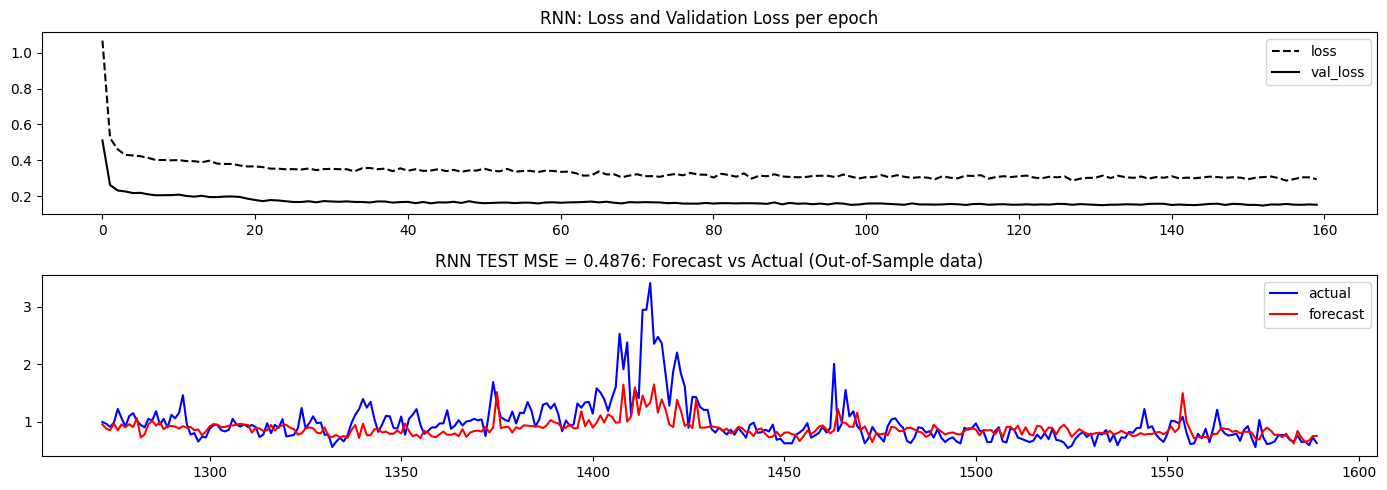

In [279]:

si_normal_rnn, history_normal_rnn = train_model_pt('RNN', **params_si)



## Inference simple RNN



## Inference sanity check first


In [280]:

model = si_normal_rnn


In [281]:


l_real, l_pred = inference_model_pt_2(model, model_type='RNN', **params_si)


0


In [282]:

l_real[:20]


[0.9928523552866342,
 0.9630800259174231,
 0.9094733972319888,
 0.9837882942837208,
 1.2208307114082855,
 1.0601666701846348,
 0.9145106398860553,
 1.0963066879243781,
 1.1471282008512613,
 1.0192058472194412,
 0.9427080644105238,
 0.9014426360080514,
 1.048595423149594,
 1.021611557021144,
 1.1800714301038682,
 0.9466170070340816,
 1.048739493715167,
 0.8986731946765503,
 1.1169999823797179,
 1.0589999807635078]

In [283]:

l_pred[:20]


[array([0.95207727], dtype=float32),
 array([0.8779743], dtype=float32),
 array([0.8524347], dtype=float32),
 array([0.96834224], dtype=float32),
 array([0.85045755], dtype=float32),
 array([0.9528801], dtype=float32),
 array([0.9011758], dtype=float32),
 array([0.9568714], dtype=float32),
 array([0.90628535], dtype=float32),
 array([1.0607584], dtype=float32),
 array([0.72601295], dtype=float32),
 array([0.7786102], dtype=float32),
 array([0.95723706], dtype=float32),
 array([1.0155885], dtype=float32),
 array([0.9295334], dtype=float32),
 array([0.99066055], dtype=float32),
 array([0.8678526], dtype=float32),
 array([0.9268093], dtype=float32),
 array([0.92568207], dtype=float32),
 array([0.9138396], dtype=float32)]

In [284]:

## plt.rcParams["figure.figsize"] = [14, 5] 


318


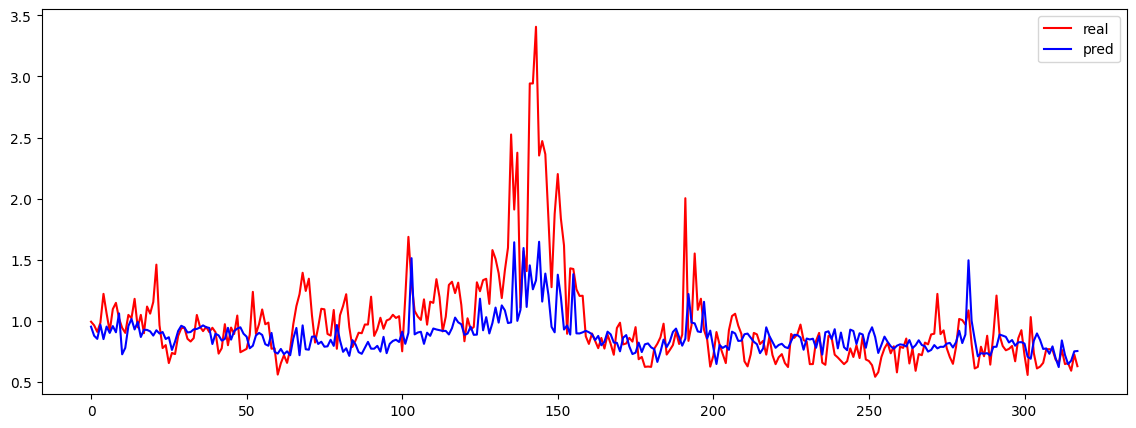

In [285]:


  
# create data 
x = [ i for i in range(len(l_real)) ] 
print(len(x))
  
# plot lines 

plt.plot(x, l_real, label = "real", color='red') 
plt.plot(x, l_pred, label = "pred", color='blue') 
plt.legend() 
plt.show()



## Now run actual INFERENCE to predict x vector and silicon together


In [286]:

model = si_normal_rnn


In [287]:

l_real, l_pred = inference_model_pt(model, model_type='RNN', **params_si)


0


In [288]:

l_real[:20]


[0.9928523552866342,
 0.9630800259174231,
 0.9094733972319888,
 0.9837882942837208,
 1.2208307114082855,
 1.0601666701846348,
 0.9145106398860553,
 1.0963066879243781,
 1.1471282008512613,
 1.0192058472194412,
 0.9427080644105238,
 0.9014426360080514,
 1.048595423149594,
 1.021611557021144,
 1.1800714301038682,
 0.9466170070340816,
 1.048739493715167,
 0.8986731946765503,
 1.1169999823797179,
 1.0589999807635078]

In [289]:

l_pred[:20]


[array([0.95207727], dtype=float32),
 array([0.9665058], dtype=float32),
 array([0.9496905], dtype=float32),
 array([0.97459745], dtype=float32),
 array([0.9818248], dtype=float32),
 array([0.99800295], dtype=float32),
 array([1.0446322], dtype=float32),
 array([1.279171], dtype=float32),
 array([1.1141163], dtype=float32),
 array([1.1072949], dtype=float32),
 array([1.1696116], dtype=float32),
 array([1.5391002], dtype=float32),
 array([0.93796194], dtype=float32),
 array([0.9627981], dtype=float32),
 array([0.9205101], dtype=float32),
 array([0.9660989], dtype=float32),
 array([1.1986637], dtype=float32),
 array([0.995221], dtype=float32),
 array([1.005462], dtype=float32),
 array([0.9914748], dtype=float32)]

318


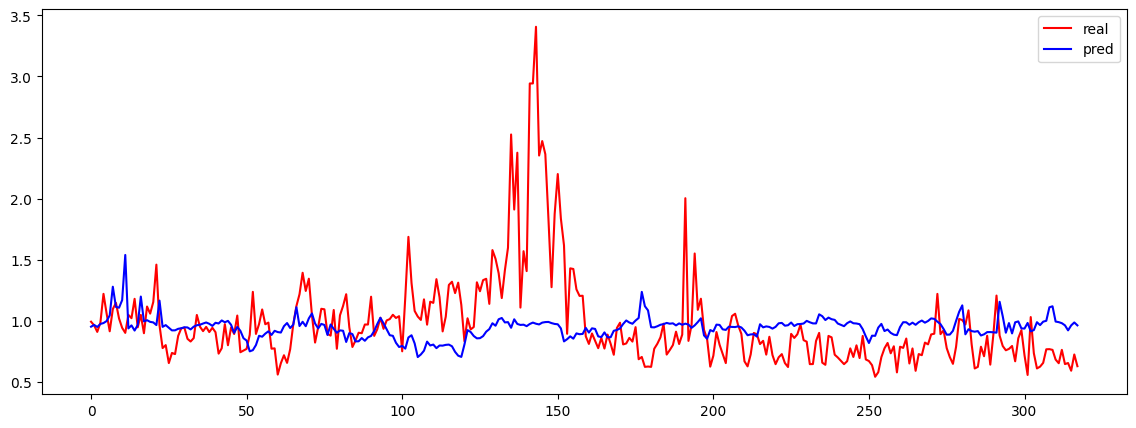

In [290]:

# create data 
x = [ i for i in range(len(l_real)) ] 
print(len(x))
  
# plot lines 

plt.plot(x, l_real, label = "real", color='red') 
plt.plot(x, l_pred, label = "pred", color='blue') 
plt.legend() 
plt.show()



## Break up test set into test bins 

* example
* input is 30 (about 7.5 hours)
* predicts rest of week


In [291]:

model = si_normal_rnn


In [292]:

x_test, y_test   = params_si['test_data']

## l_real, l_pred = bins_inference_model_pt(model, x_test, y_test)




In [293]:

x_test.shape


torch.Size([318, 130])

In [294]:

bin_size = int( x_test.shape[0] / window )
bin_size 


63

In [295]:

318/ 30


10.6

In [296]:

bin_size = 20


torch.Size([20, 130])
torch.Size([20, 26])
---------------
0
Test MSE Loss: 0.0308
20


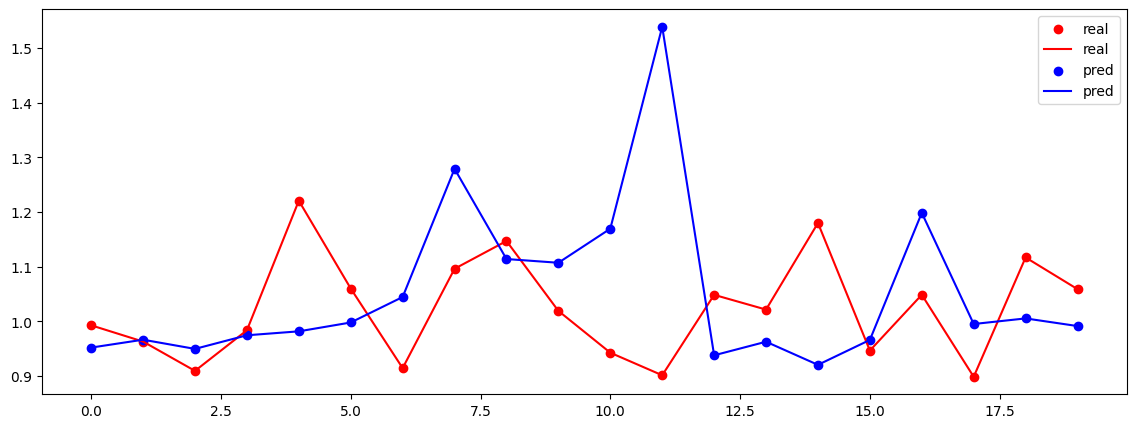

torch.Size([20, 130])
torch.Size([20, 26])
---------------
0
Test MSE Loss: 0.0307
20


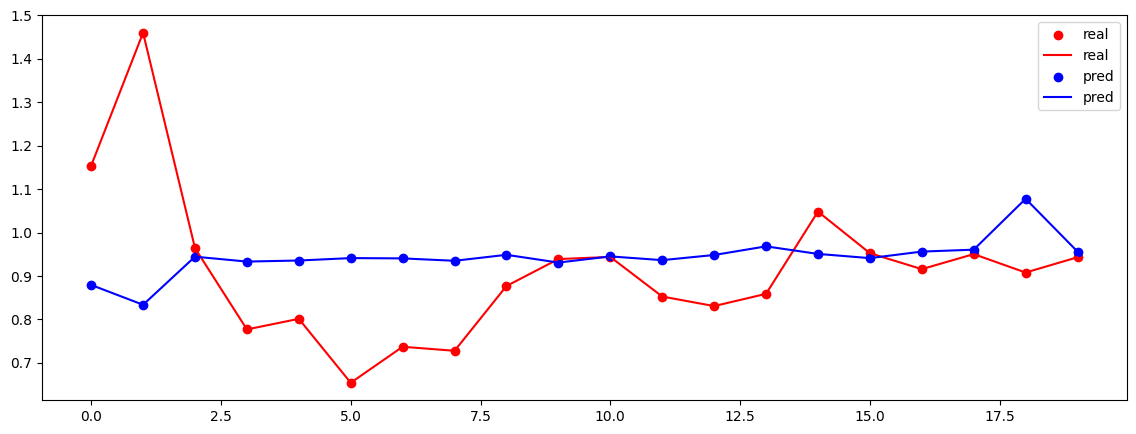

torch.Size([20, 130])
torch.Size([20, 26])
---------------
0
Test MSE Loss: 0.0303
20


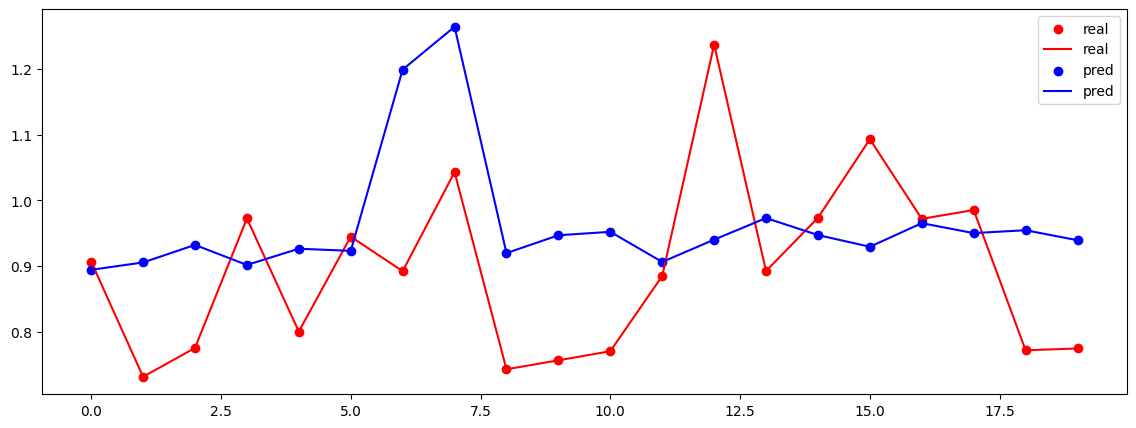

torch.Size([20, 130])
torch.Size([20, 26])
---------------
0
Test MSE Loss: 0.0634
20


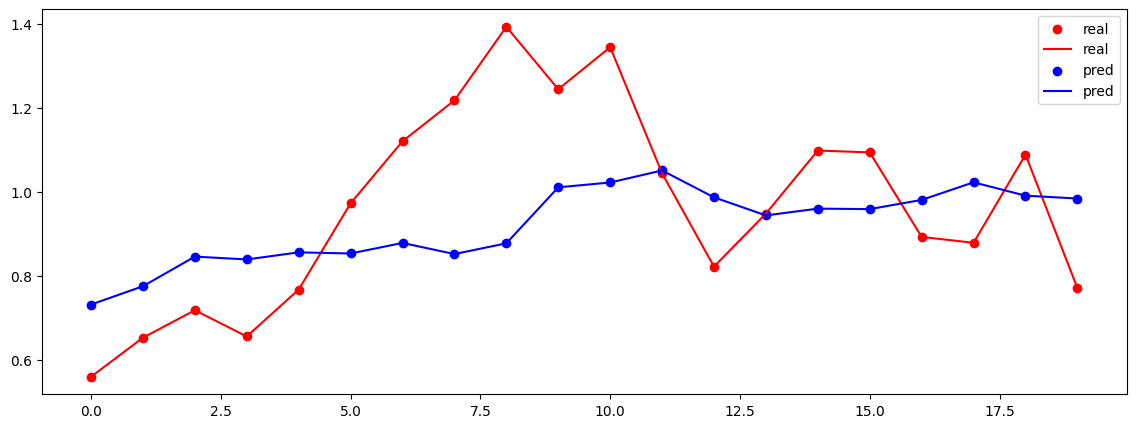

torch.Size([20, 130])
torch.Size([20, 26])
---------------
0
Test MSE Loss: 0.0285
20


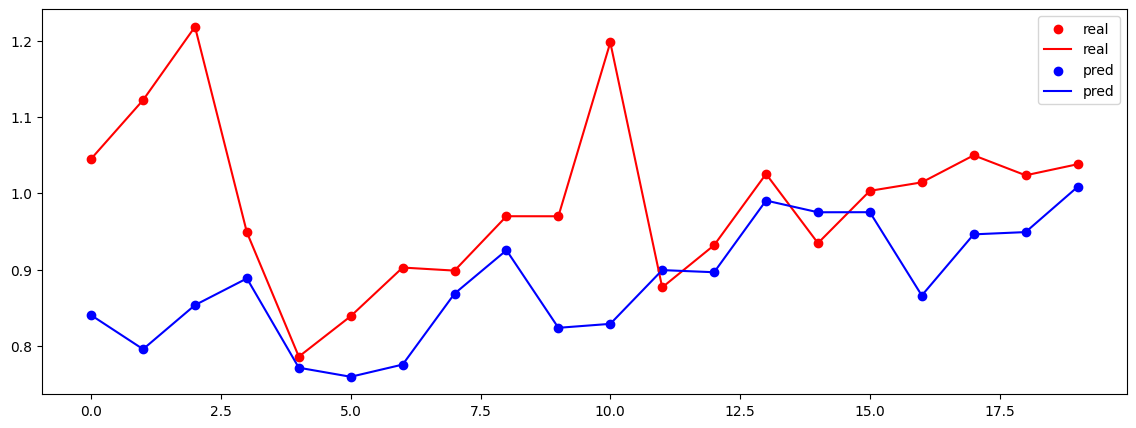

torch.Size([20, 130])
torch.Size([20, 26])
---------------
0
Test MSE Loss: 0.0850
20


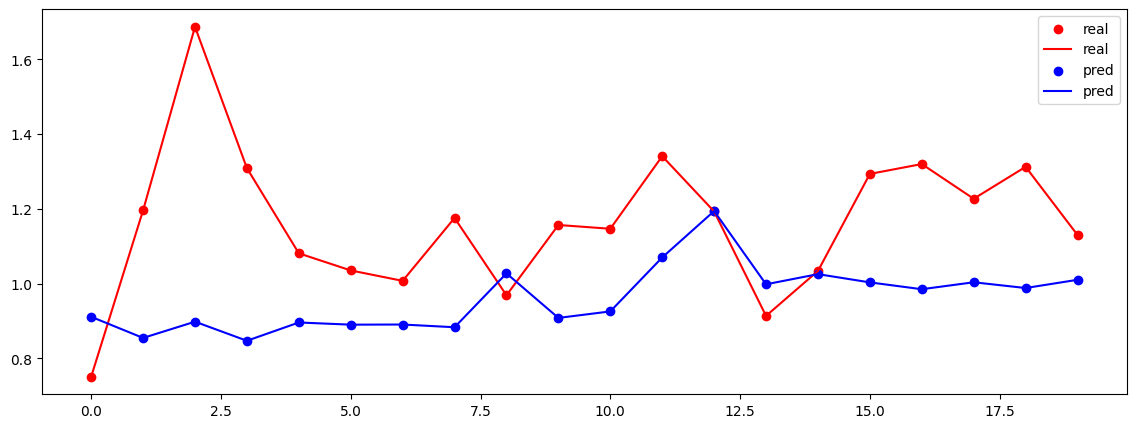

torch.Size([20, 130])
torch.Size([20, 26])
---------------
0
Test MSE Loss: 0.3980
20


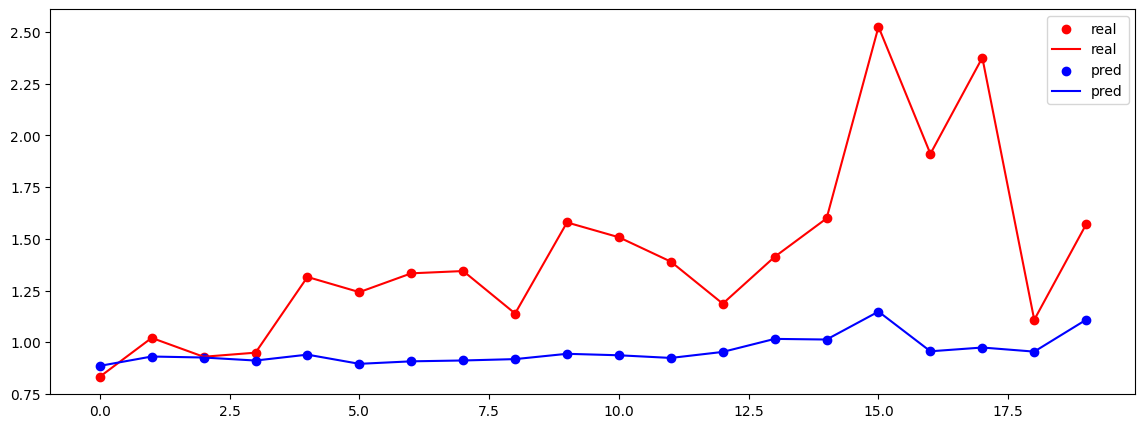

torch.Size([20, 130])
torch.Size([20, 26])
---------------
0
Test MSE Loss: 0.5911
20


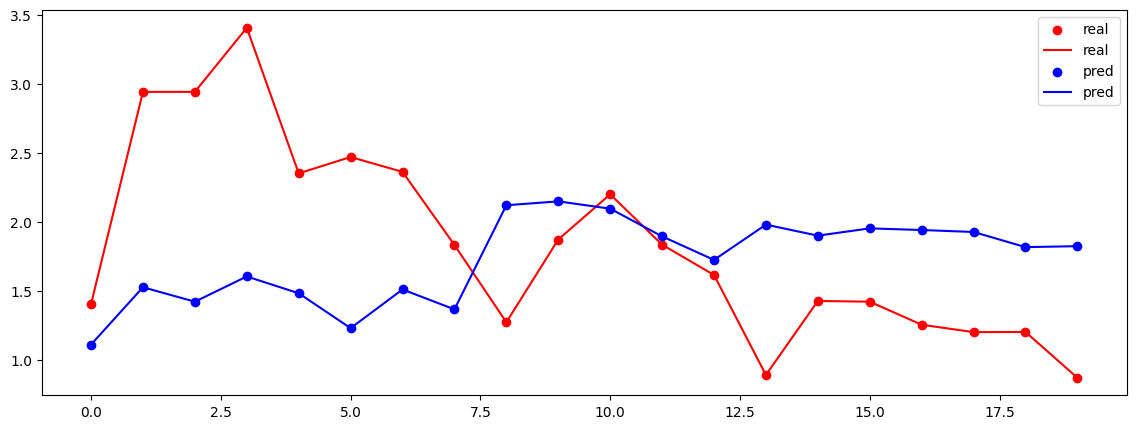

torch.Size([20, 130])
torch.Size([20, 26])
---------------
0
Test MSE Loss: 0.0239
20


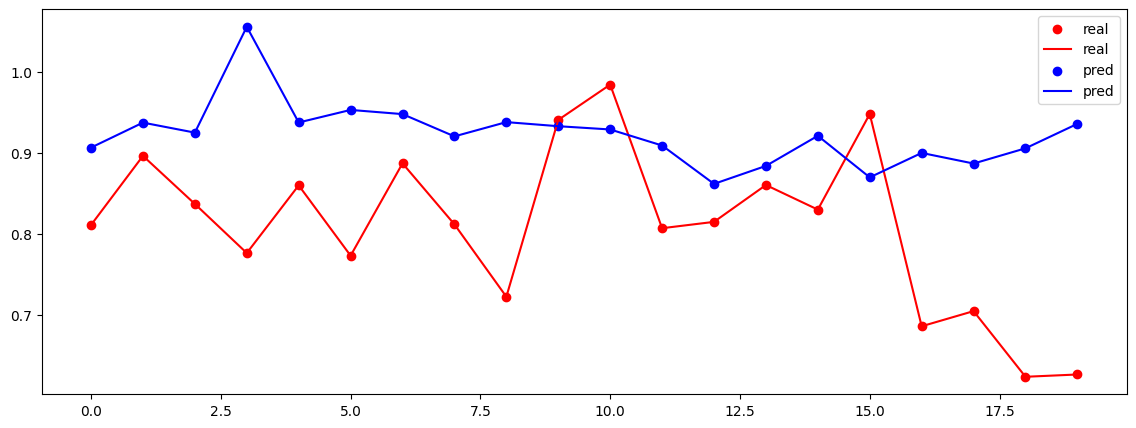

torch.Size([20, 130])
torch.Size([20, 26])
---------------
0
Test MSE Loss: 0.1337
20


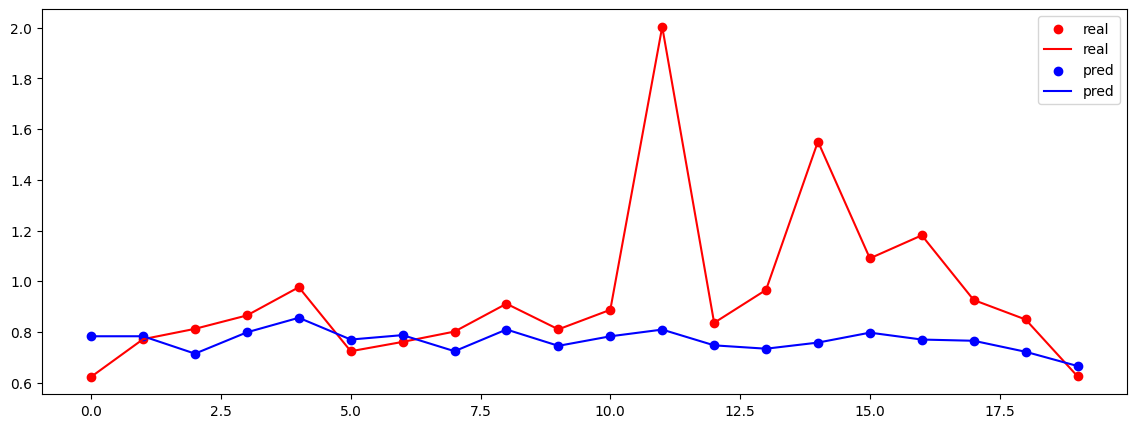

torch.Size([20, 130])
torch.Size([20, 26])
---------------
0
Test MSE Loss: 0.0222
20


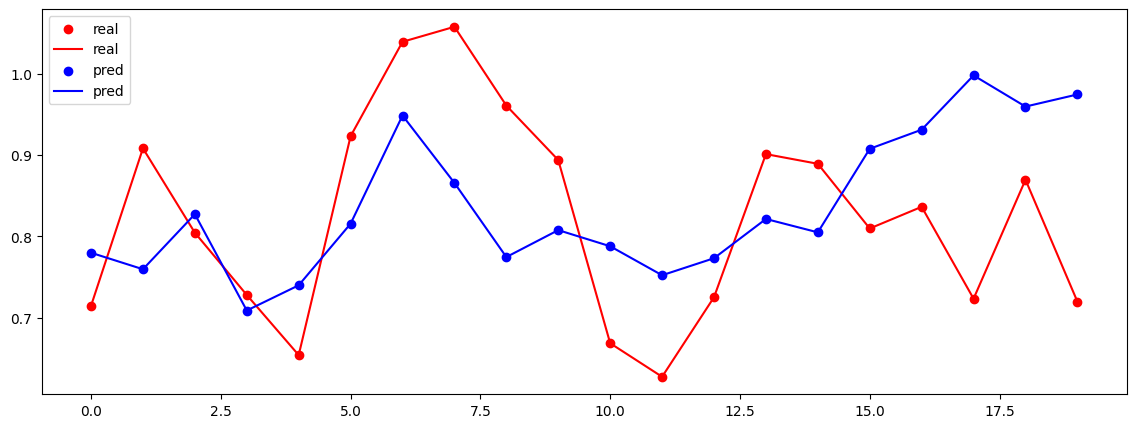

torch.Size([20, 130])
torch.Size([20, 26])
---------------
0
Test MSE Loss: 0.0368
20


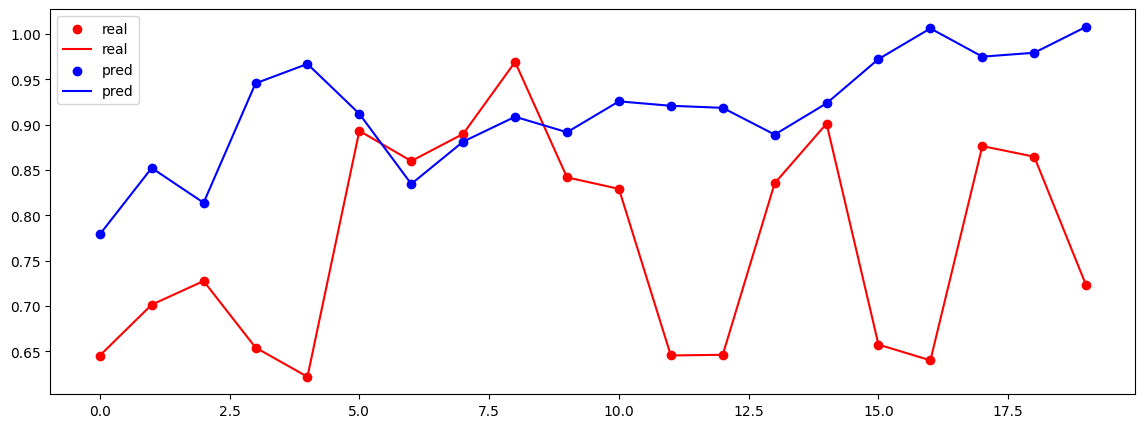

torch.Size([20, 130])
torch.Size([20, 26])
---------------
0
Test MSE Loss: 0.0669
20


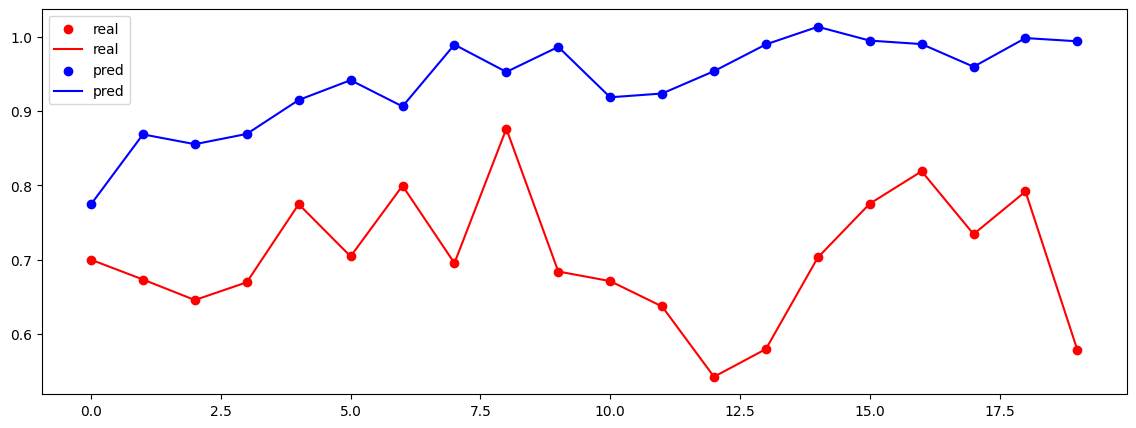

torch.Size([20, 130])
torch.Size([20, 26])
---------------
0
Test MSE Loss: 0.0379
20


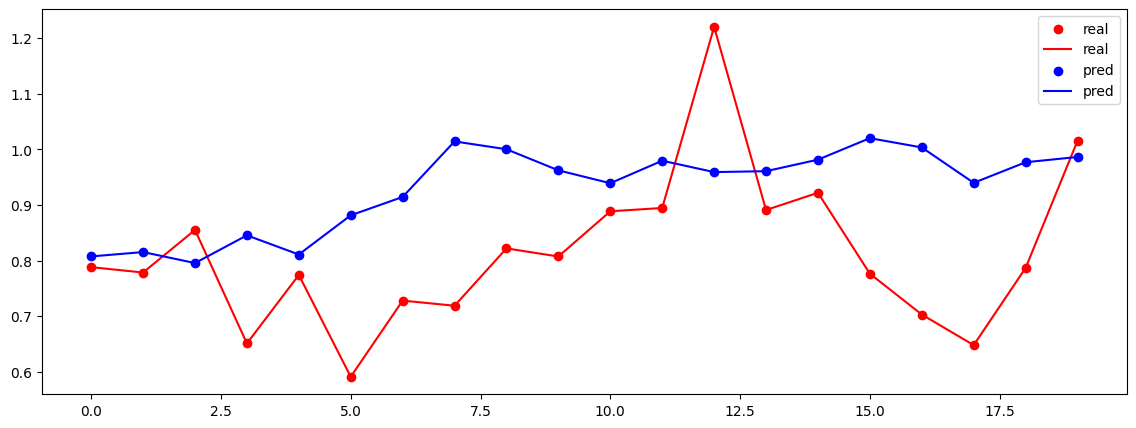

torch.Size([20, 130])
torch.Size([20, 26])
---------------
0
Test MSE Loss: 0.0369
20


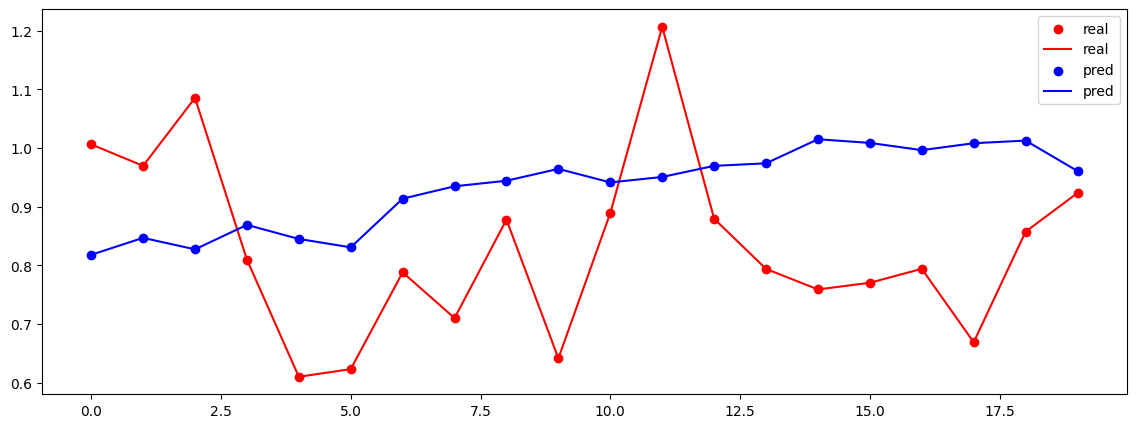

In [297]:

for i in range(0, y_test.shape[0]- bin_size, bin_size):
    batch_x_test = x_test[i:i+bin_size, :]
    print( batch_x_test.shape )

    batch_y_test = y_test[i:i+bin_size, :]
    print( batch_y_test.shape )
    print("---------------")
    bins_inference_model_pt(model, batch_x_test, batch_y_test)




## LSTM


In [298]:

class LSTM(nn.Module):
    def __init__(self, seq_length, input_size, output_size, n_features, n_layers):
        super(LSTM, self).__init__()
        self.n_layers   = n_layers
        self.hidden_dim = n_features
        self.output_size= output_size
        self.seq_length = seq_length
        self.input_size = input_size

        self.lstm    = nn.LSTM(input_size, n_features, n_layers, batch_first=False)
        self.dropout = nn.Dropout(0.2)
        self.fc      = nn.Linear(n_features, output_size)

        self.fc1     = nn.Linear(n_features, 40)
        self.relu    = nn.ReLU()
        self.fc2     = nn.Linear(40, output_size)
        
    def forward(self, x, hn):
        x = x.view(-1, self.seq_length, self.input_size)
        x = x.permute(1, 0, 2)

        ## hn is a tuple here of (h0, c0)
        lstm_o, (hn, cn) = self.lstm(x, hn)
    
        lstm_o = self.dropout(lstm_o)

        
        ## output = self.fc( hn )
        output    = self.fc1( hn )
        output    = self.relu( output )
        output    = self.dropout(  output  )
        output    = self.fc2( output )
    
        ##                     batch_size, n_classes) 
        output  = output.view( -1,  self.output_size ) 
        
        return output, hn


    def init_hidden(self, batch_size_x_data):
        weight = next(self.parameters()).data
        hidden = ( weight.new(self.n_layers, 1, self.hidden_dim).zero_(),
                   weight.new(self.n_layers, 1, self.hidden_dim).zero_()   )
        N_batches_rc = batch_size_x_data    ## or is this the size of the x set ??
        hidden2 = ( torch.zeros( self.n_layers,   N_batches_rc,    self.hidden_dim ),
                    torch.zeros( self.n_layers,   N_batches_rc,    self.hidden_dim )    )
        return hidden2


0/4000 - Loss:  1.040697455406189, val_loss: 0.49853792786598206
25/4000 - Loss:  0.5178381204605103, val_loss: 0.2658281922340393
50/4000 - Loss:  0.4494272470474243, val_loss: 0.23540757596492767
75/4000 - Loss:  0.41570380330085754, val_loss: 0.21809332072734833
100/4000 - Loss:  0.40390557050704956, val_loss: 0.20478017628192902
125/4000 - Loss:  0.39602217078208923, val_loss: 0.20142075419425964
150/4000 - Loss:  0.3840735852718353, val_loss: 0.1943817287683487
175/4000 - Loss:  0.3829720616340637, val_loss: 0.19059106707572937
200/4000 - Loss:  0.3714837431907654, val_loss: 0.18901342153549194
225/4000 - Loss:  0.36668911576271057, val_loss: 0.18482705950737
250/4000 - Loss:  0.36116063594818115, val_loss: 0.1846502274274826
275/4000 - Loss:  0.35802677273750305, val_loss: 0.18411801755428314
300/4000 - Loss:  0.3520563840866089, val_loss: 0.18309883773326874
325/4000 - Loss:  0.35813263058662415, val_loss: 0.18004180490970612
350/4000 - Loss:  0.3496774435043335, val_loss: 0.178

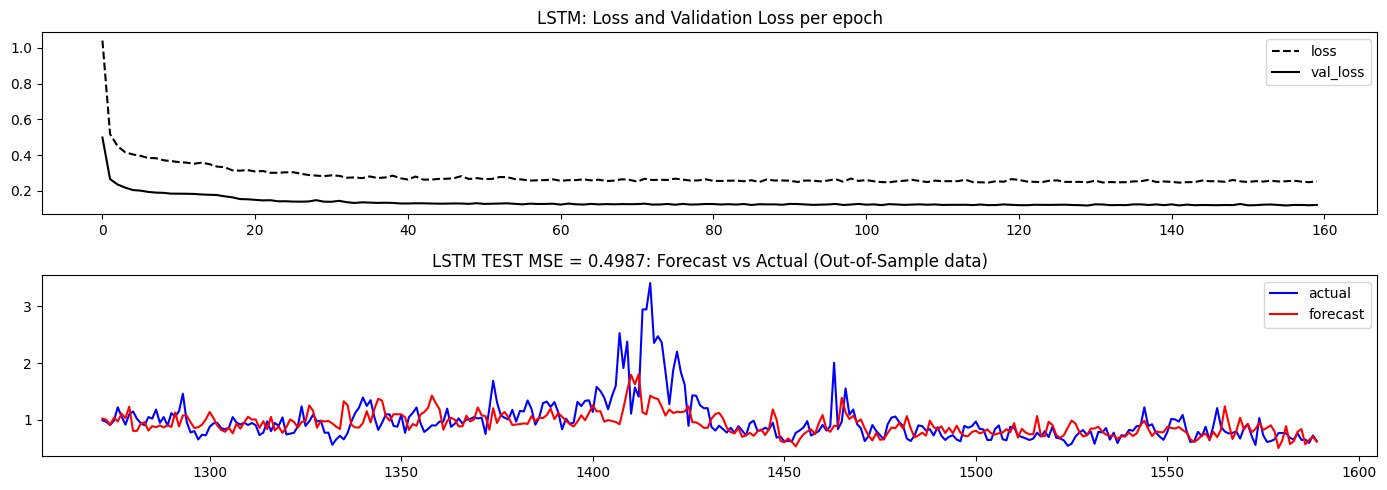

In [299]:

si_lstm, history_a_lstm = train_model_pt('LSTM', **params_si)



## LSTM Inference



## Inference sanity check first


In [300]:

model = si_lstm


In [301]:

l_real, l_pred = inference_model_pt_2(model, model_type='LSTM', **params_si)


0


In [302]:

l_real[:20]


[0.9928523552866342,
 0.9630800259174231,
 0.9094733972319888,
 0.9837882942837208,
 1.2208307114082855,
 1.0601666701846348,
 0.9145106398860553,
 1.0963066879243781,
 1.1471282008512613,
 1.0192058472194412,
 0.9427080644105238,
 0.9014426360080514,
 1.048595423149594,
 1.021611557021144,
 1.1800714301038682,
 0.9466170070340816,
 1.048739493715167,
 0.8986731946765503,
 1.1169999823797179,
 1.0589999807635078]

In [303]:

l_pred[:20]


[array([1.0221394], dtype=float32),
 array([1.0012631], dtype=float32),
 array([0.91376364], dtype=float32),
 array([1.0371861], dtype=float32),
 array([0.971388], dtype=float32),
 array([1.1075827], dtype=float32),
 array([1.0301616], dtype=float32),
 array([1.2299732], dtype=float32),
 array([0.8048241], dtype=float32),
 array([0.8057899], dtype=float32),
 array([0.9307746], dtype=float32),
 array([0.9594413], dtype=float32),
 array([0.8114526], dtype=float32),
 array([0.88861245], dtype=float32),
 array([0.86916876], dtype=float32),
 array([0.90138996], dtype=float32),
 array([0.8656631], dtype=float32),
 array([0.9028364], dtype=float32),
 array([0.8751821], dtype=float32),
 array([1.1290249], dtype=float32)]

318


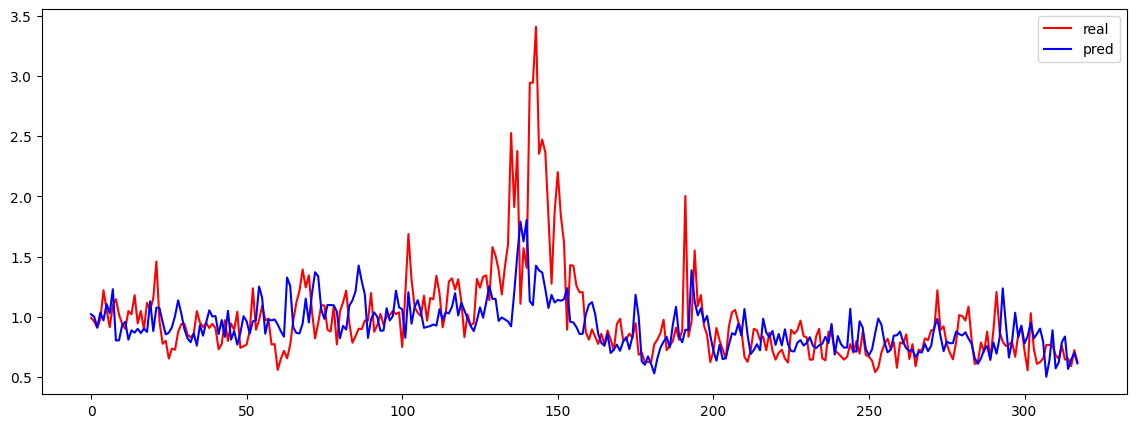

In [304]:

# create data 
x = [ i for i in range(len(l_real)) ] 
print(len(x))
  
# plot lines 

plt.plot(x, l_real, label = "real", color='red') 
plt.plot(x, l_pred, label = "pred", color='blue') 
plt.legend() 
plt.show()



## Now run actual INFERENCE to predict x vector and silicon together


In [305]:

model = si_lstm


In [306]:

l_real, l_pred = inference_model_pt(model, model_type='LSTM', **params_si)


0


In [307]:

l_real[:50]


[0.9928523552866342,
 0.9630800259174231,
 0.9094733972319888,
 0.9837882942837208,
 1.2208307114082855,
 1.0601666701846348,
 0.9145106398860553,
 1.0963066879243781,
 1.1471282008512613,
 1.0192058472194412,
 0.9427080644105238,
 0.9014426360080514,
 1.048595423149594,
 1.021611557021144,
 1.1800714301038682,
 0.9466170070340816,
 1.048739493715167,
 0.8986731946765503,
 1.1169999823797179,
 1.0589999807635078,
 1.1539999799150638,
 1.4599630810031687,
 0.9642500142453084,
 0.7770000116492213,
 0.8014138477829957,
 0.654176475336345,
 0.7371185267712728,
 0.7278170796482349,
 0.8769224759985779,
 0.9390000087351333,
 0.9438860909196654,
 0.8527525963427545,
 0.8307554818543689,
 0.858931740153785,
 1.048245646106262,
 0.9525810798650699,
 0.9158200186403482,
 0.9503839150370823,
 0.9080000129691704,
 0.9431447070332218,
 0.9069230772548048,
 0.7316078403099606,
 0.775538481908576,
 0.9726199996277106,
 0.800474069080251,
 0.9449705864526874,
 0.8923706840022204,
 1.0432205789947446,


In [308]:

l_pred[:500]


[array([1.0221394], dtype=float32),
 array([0.7739165], dtype=float32),
 array([0.83704156], dtype=float32),
 array([1.0622355], dtype=float32),
 array([0.97878814], dtype=float32),
 array([0.88121533], dtype=float32),
 array([0.7973739], dtype=float32),
 array([0.88314056], dtype=float32),
 array([0.64584696], dtype=float32),
 array([0.6491549], dtype=float32),
 array([0.72991604], dtype=float32),
 array([0.6207126], dtype=float32),
 array([0.555913], dtype=float32),
 array([0.4985374], dtype=float32),
 array([0.5966958], dtype=float32),
 array([0.7337551], dtype=float32),
 array([0.7021272], dtype=float32),
 array([0.8385675], dtype=float32),
 array([0.6398195], dtype=float32),
 array([0.36750907], dtype=float32),
 array([0.37535828], dtype=float32),
 array([0.4042302], dtype=float32),
 array([0.55313027], dtype=float32),
 array([0.56269944], dtype=float32),
 array([0.44797614], dtype=float32),
 array([0.58966357], dtype=float32),
 array([0.7742042], dtype=float32),
 array([1.1416811

318


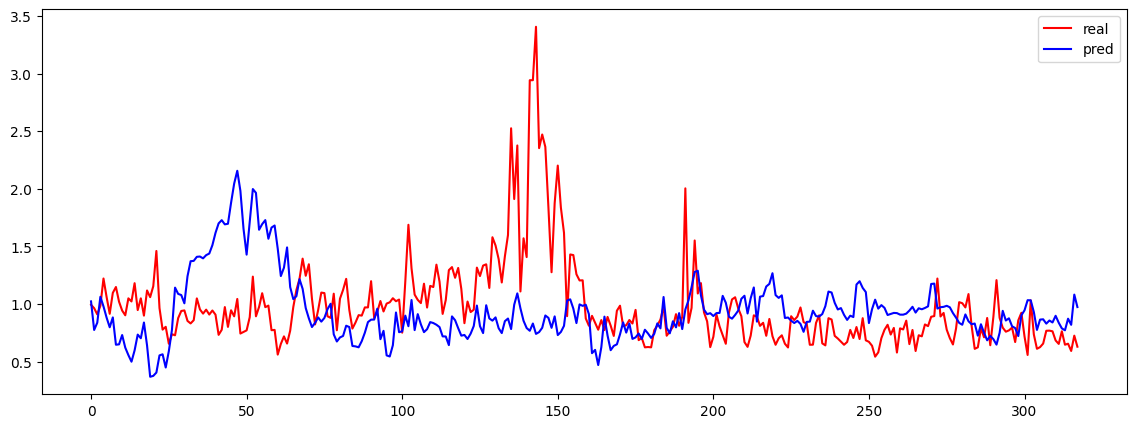

In [309]:

# create data 
x = [ i for i in range(len(l_real)) ] 
print(len(x))
  
# plot lines 

plt.plot(x, l_real, label = "real", color='red') 
plt.plot(x, l_pred, label = "pred", color='blue') 
plt.legend() 
plt.show()



## Break up test set into test bins 

* example
* input is 30 (about 7.5 hours)
* predicts rest of week


In [310]:

model = si_lstm


In [311]:


x_test, y_test   = params_si['test_data']

## l_real, l_pred = bins_inference_model_pt(model, x_test, y_test)



In [312]:

x_test.shape


torch.Size([318, 130])

In [313]:

bin_size = int( x_test.shape[0] / window )
bin_size 


63

In [314]:

bin_size = 20


torch.Size([20, 130])
torch.Size([20, 26])
---------------
0
Test MSE Loss: 0.1185
20


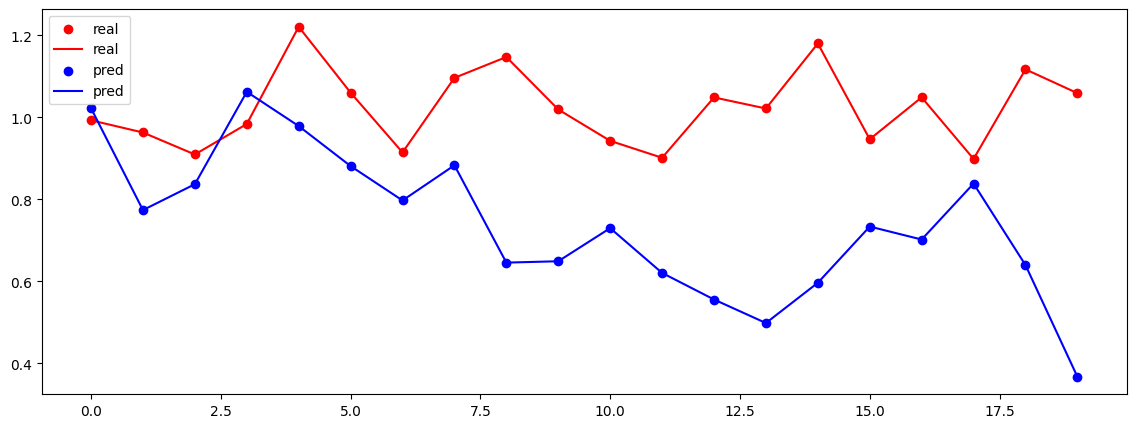

torch.Size([20, 130])
torch.Size([20, 26])
---------------
0
Test MSE Loss: 0.0437
20


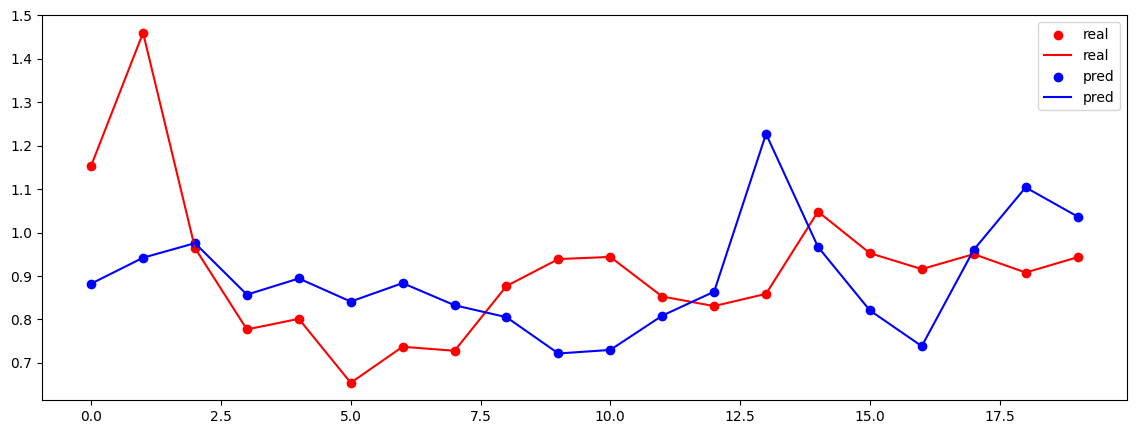

torch.Size([20, 130])
torch.Size([20, 26])
---------------
0
Test MSE Loss: 0.0305
20


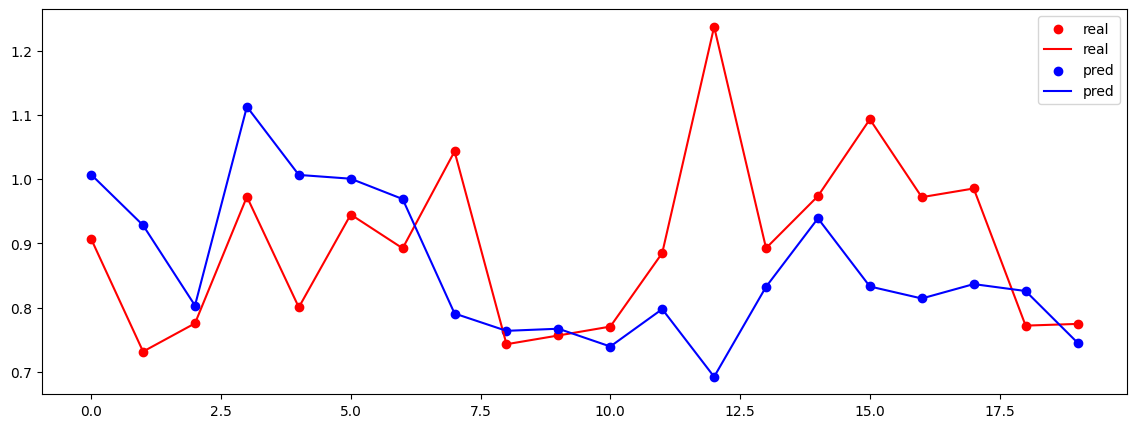

torch.Size([20, 130])
torch.Size([20, 26])
---------------
0
Test MSE Loss: 0.0785
20


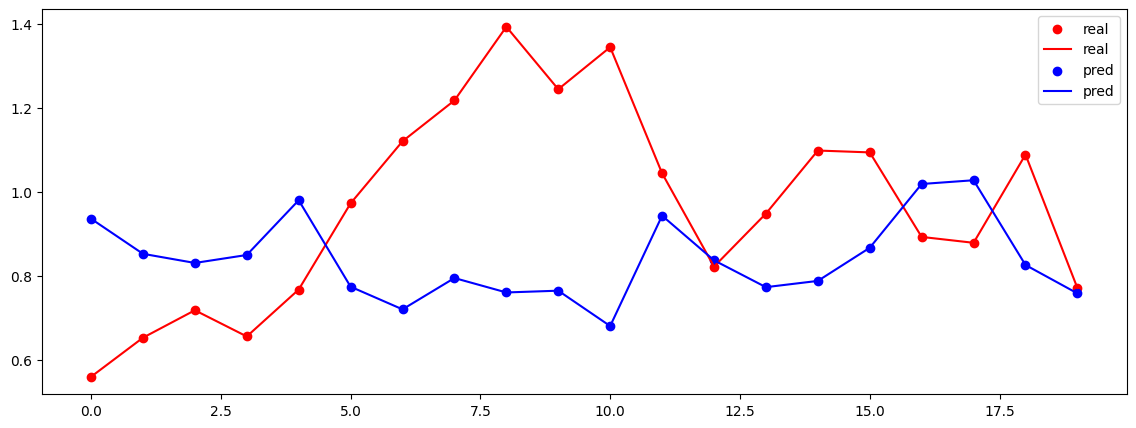

torch.Size([20, 130])
torch.Size([20, 26])
---------------
0
Test MSE Loss: 0.0296
20


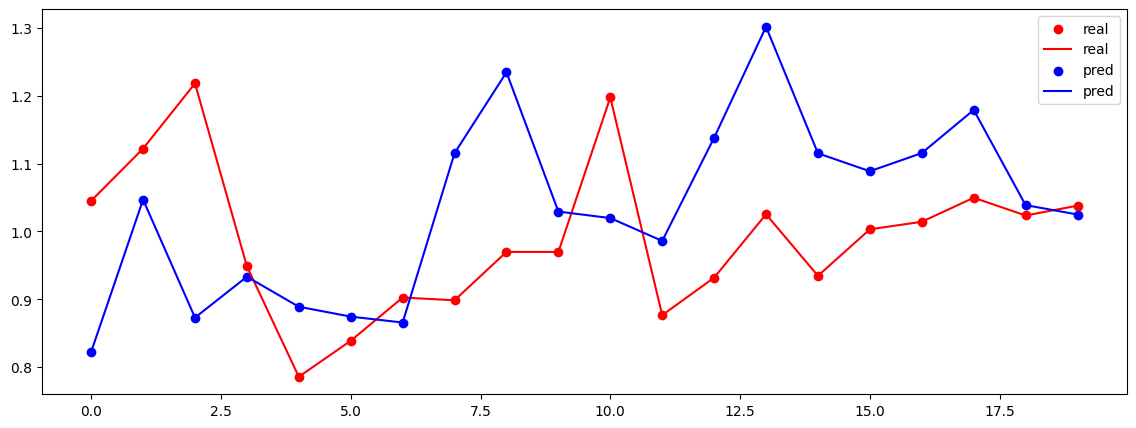

torch.Size([20, 130])
torch.Size([20, 26])
---------------
0
Test MSE Loss: 0.1287
20


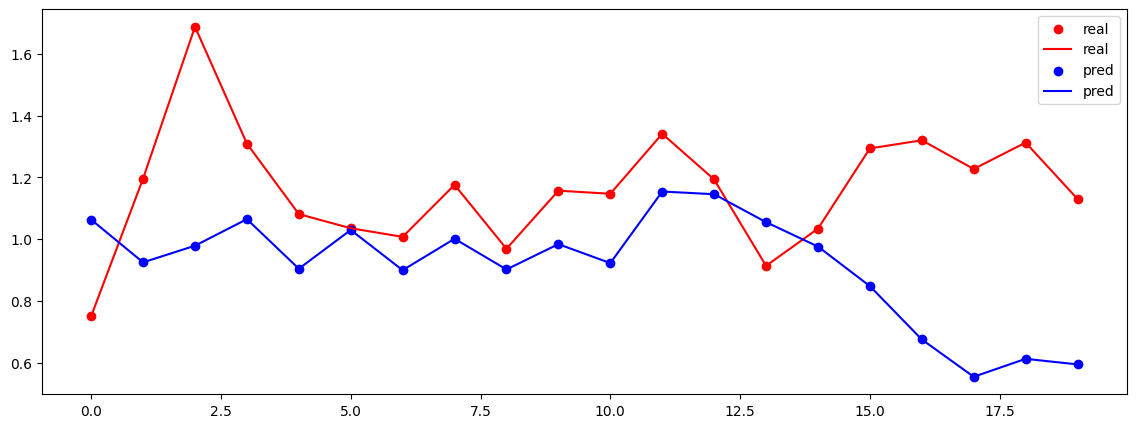

torch.Size([20, 130])
torch.Size([20, 26])
---------------
0
Test MSE Loss: 0.4524
20


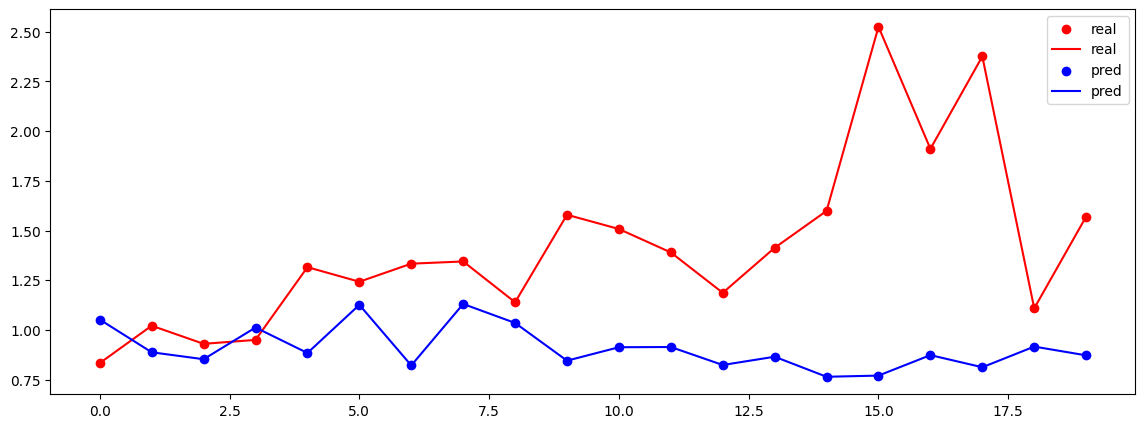

torch.Size([20, 130])
torch.Size([20, 26])
---------------
0
Test MSE Loss: 0.9741
20


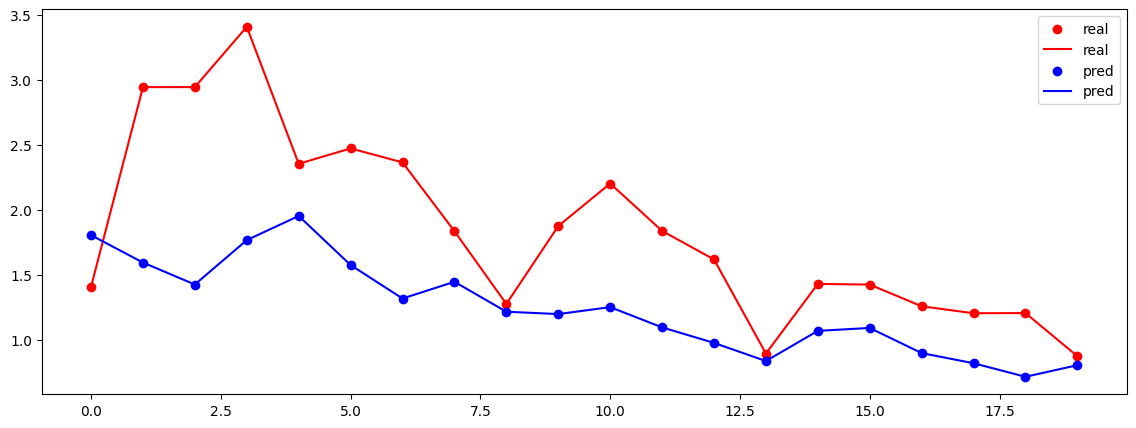

torch.Size([20, 130])
torch.Size([20, 26])
---------------
0
Test MSE Loss: 0.0662
20


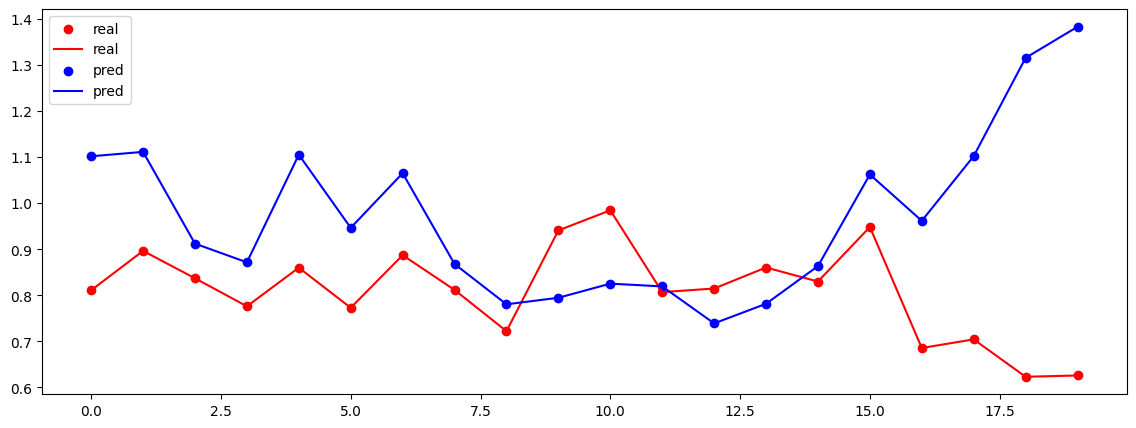

torch.Size([20, 130])
torch.Size([20, 26])
---------------
0
Test MSE Loss: 0.1548
20


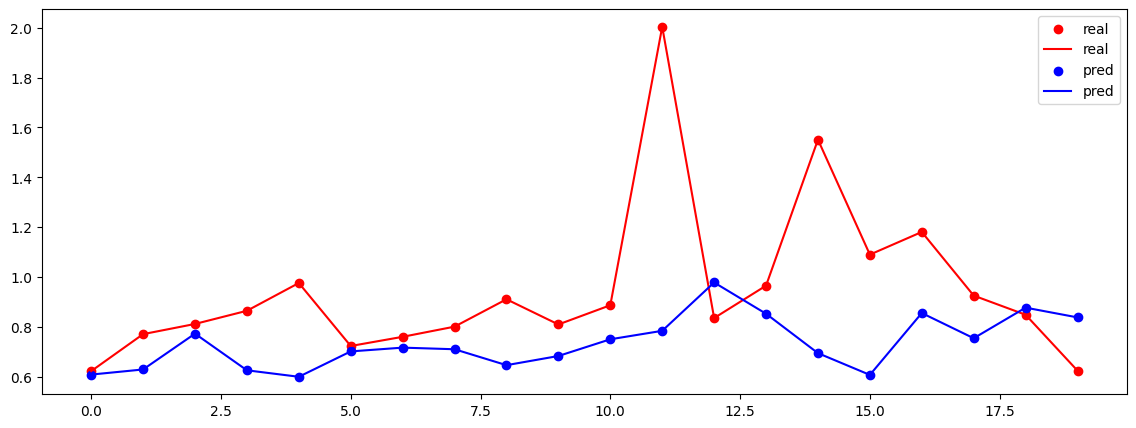

torch.Size([20, 130])
torch.Size([20, 26])
---------------
0
Test MSE Loss: 0.1254
20


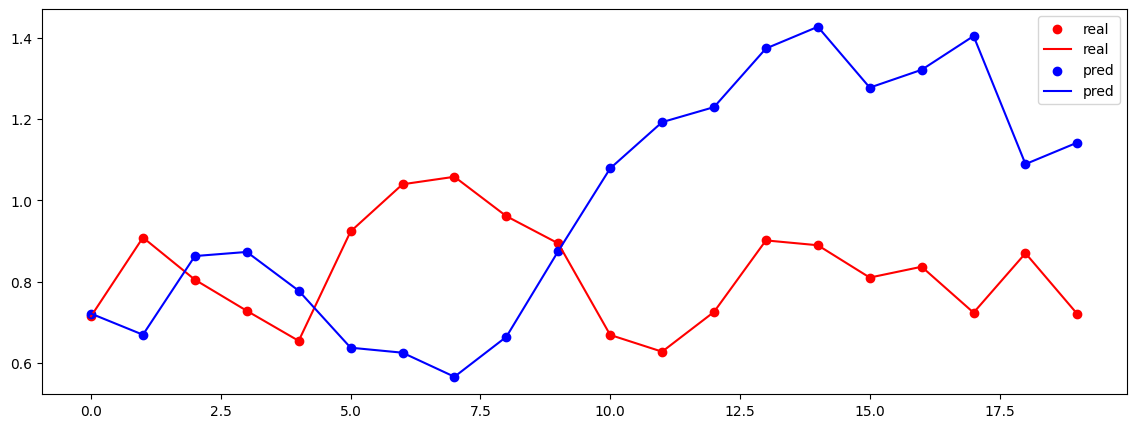

torch.Size([20, 130])
torch.Size([20, 26])
---------------
0
Test MSE Loss: 0.0207
20


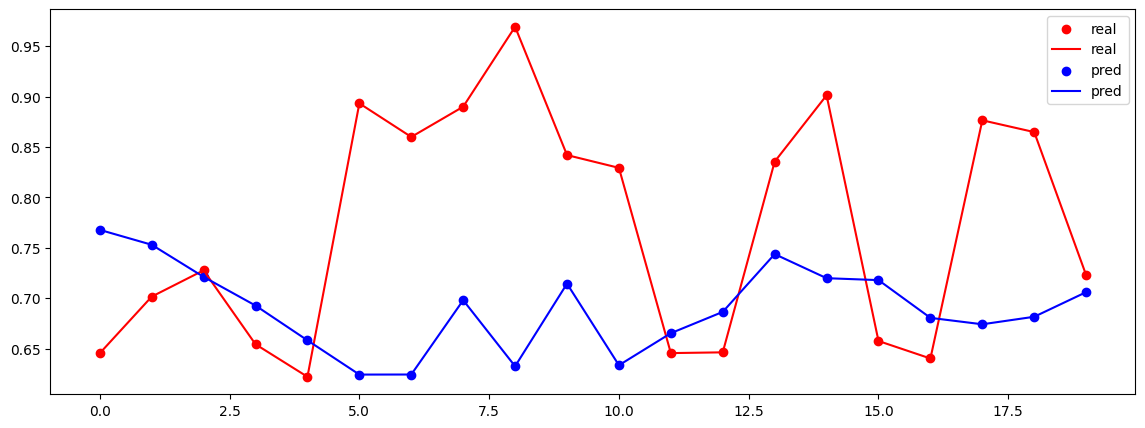

torch.Size([20, 130])
torch.Size([20, 26])
---------------
0
Test MSE Loss: 0.0249
20


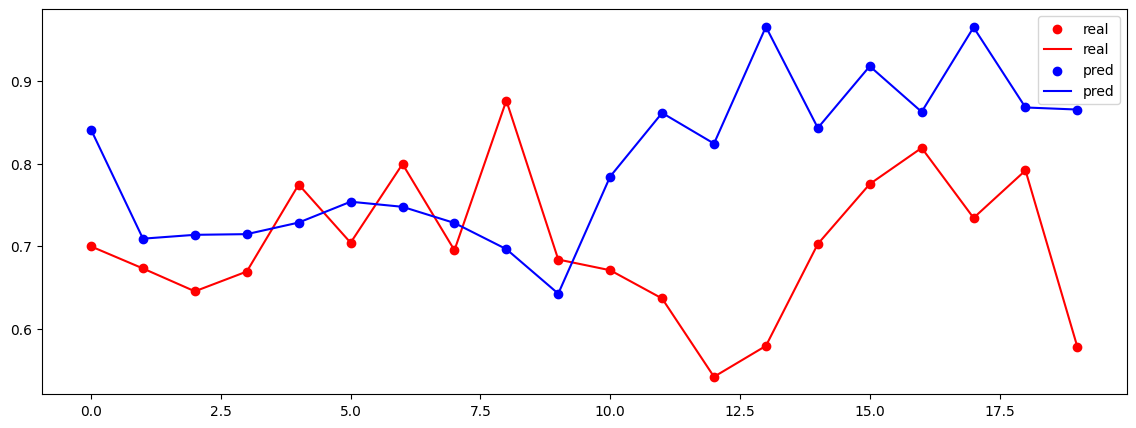

torch.Size([20, 130])
torch.Size([20, 26])
---------------
0
Test MSE Loss: 0.0311
20


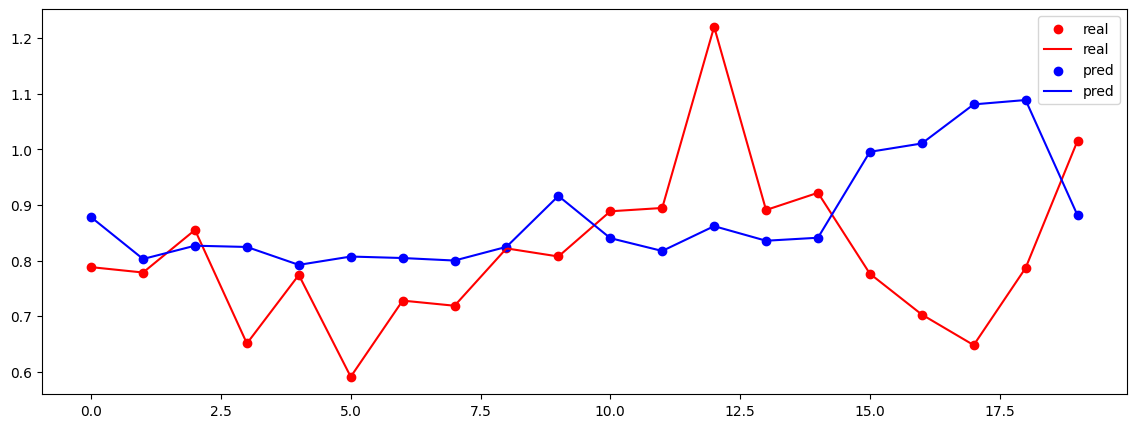

torch.Size([20, 130])
torch.Size([20, 26])
---------------
0
Test MSE Loss: 0.0535
20


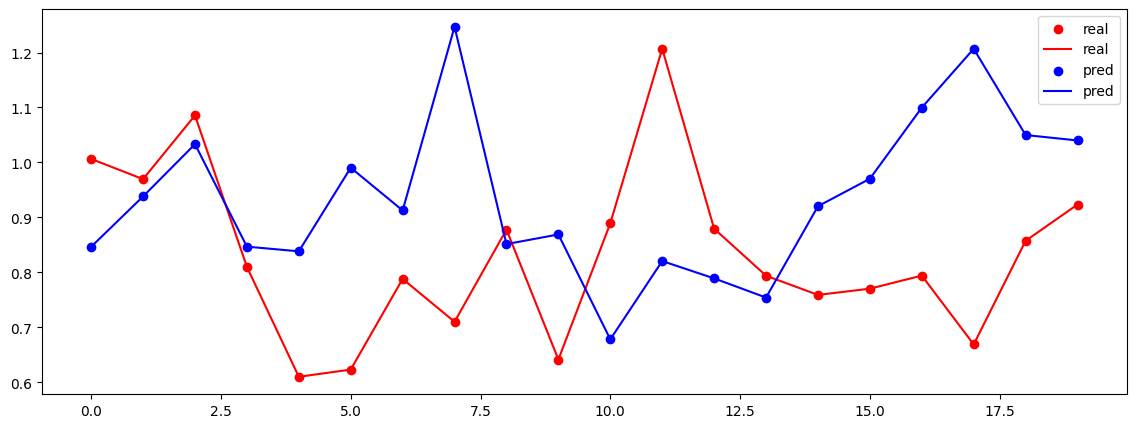

In [315]:



for i in range(0, y_test.shape[0]- bin_size, bin_size):
    batch_x_test = x_test[i:i+bin_size, :]
    print( batch_x_test.shape )

    batch_y_test = y_test[i:i+bin_size, :]
    print( batch_y_test.shape )
    print("---------------")
    bins_inference_model_pt(model, batch_x_test, batch_y_test)



## View all predicted Xs


In [316]:


            
            
def View_all_predicted_Xs(x_index, model, model_type='RNN', **kwargs):
 
    x_test, y_test   = kwargs['test_data']
 
    ## Prediction
    model.eval()
    with torch.no_grad():
        h0    = model.init_hidden( x_test.shape[0] )
        y_hat = model(x_test, h0)
        
    y_hat, _ = y_hat
 
    ## Plotting
    fig, ax = plt.subplots(2, 1) 
    
    ax[0].set_title(f"{model_type} TEST MSE = {0:.4f}: Forecast vs Actual (Out-of-Sample data)")
    scale = kwargs['scale']
    print("ricardo check this")
    print(y_test.shape)
    print(y_hat.shape )
    actual = scale.inverse_y(y_test.detach().numpy() ) ## .ravel() )
    pred   = scale.inverse_y( y_hat.detach().numpy() ) ## .ravel() )
    idx = kwargs['idx']
    ##pd.Series(actual, index=idx).plot(style='k--', label='actual', alpha=0.65, color='blue')
    ##pd.Series(pred,   index=idx).plot(style='k',   label='forecast' , color='red')
    print(actual.shape)
    print(pred.shape)
    actual = actual[:, x_index]
    pred   =   pred[:, x_index]
    
    pd.Series(pred,   index=idx).plot( label='forecast' , color='red' )
    pd.Series(actual, index=idx).plot( label='actual',    color='blue')
    
    fig.tight_layout()
    ax[1].legend(); plt.show()
    
    return 0, 0
    
           

            



ricardo check this
torch.Size([318, 26])
torch.Size([318, 26])
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(318, 26)
(318, 26)


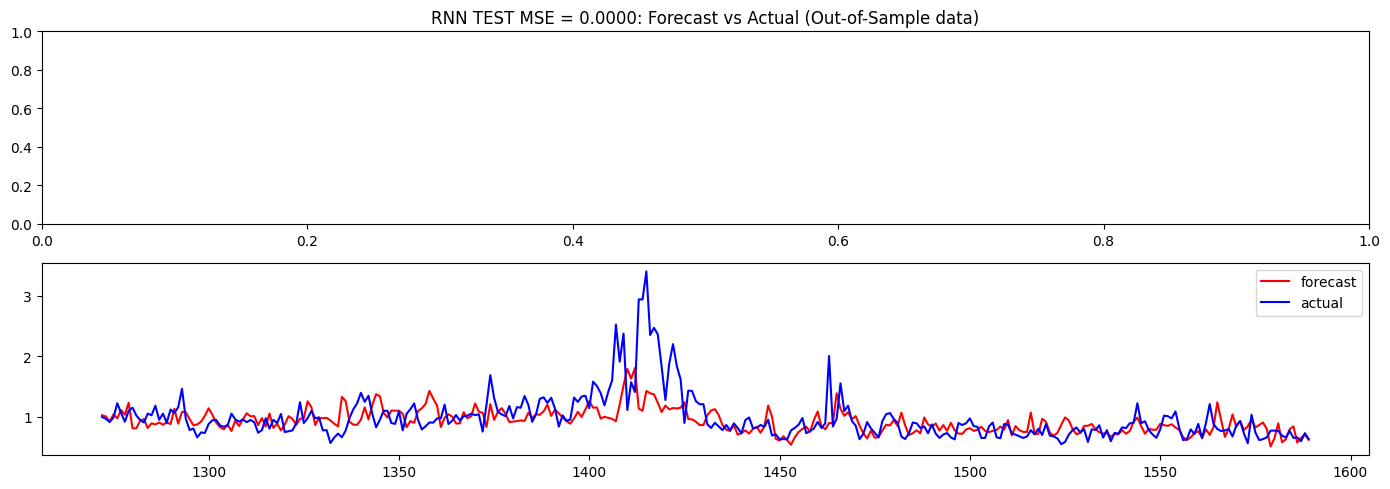

ricardo check this
torch.Size([318, 26])
torch.Size([318, 26])
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(318, 26)
(318, 26)


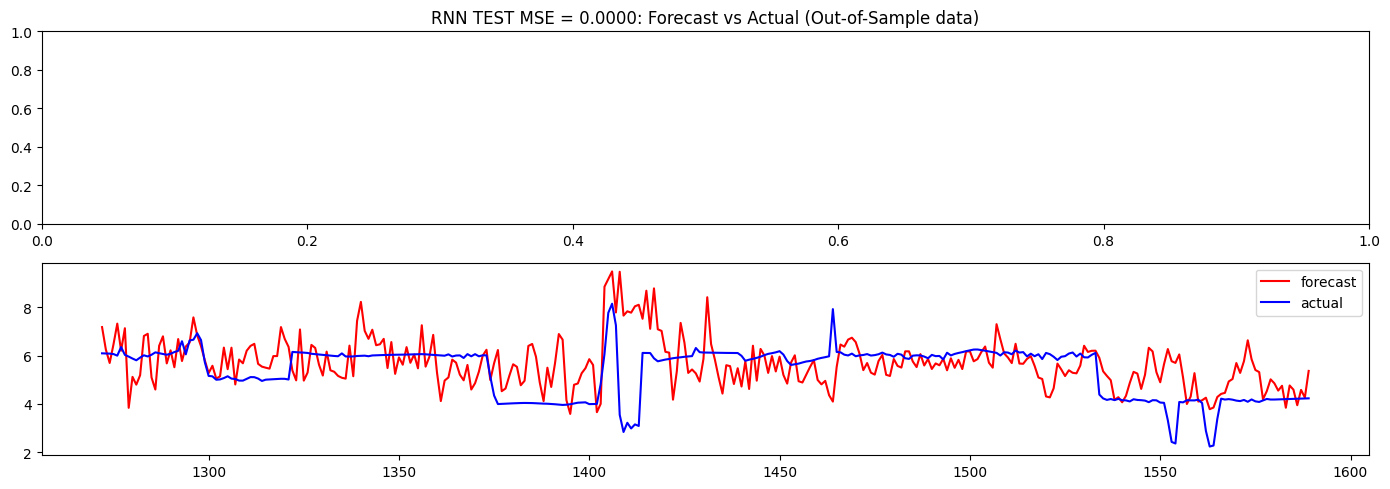

ricardo check this
torch.Size([318, 26])
torch.Size([318, 26])
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(318, 26)
(318, 26)


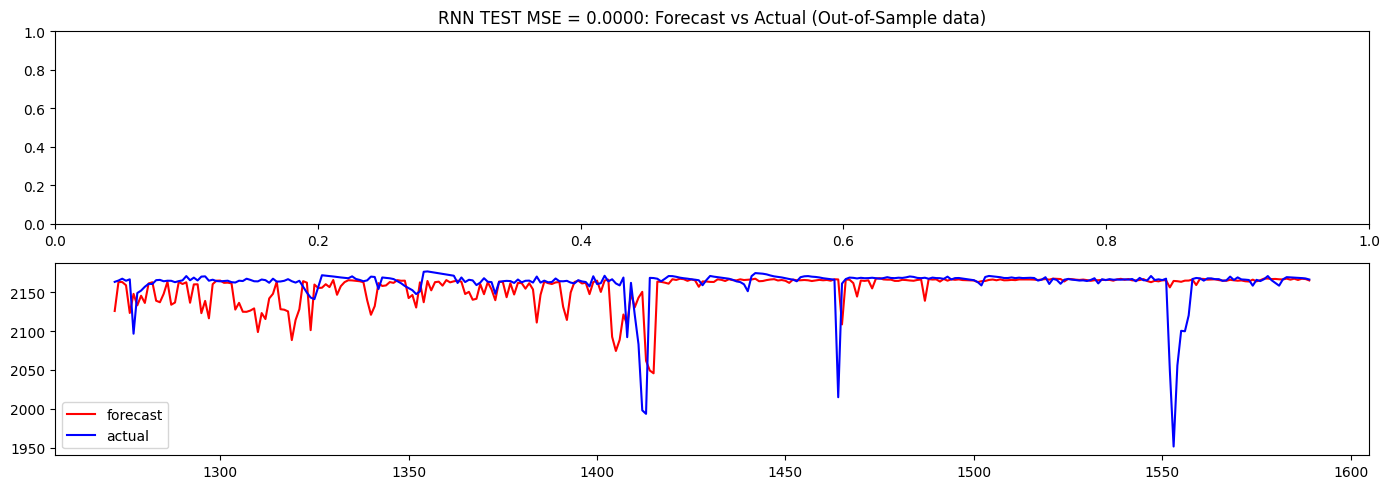

ricardo check this
torch.Size([318, 26])
torch.Size([318, 26])
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(318, 26)
(318, 26)


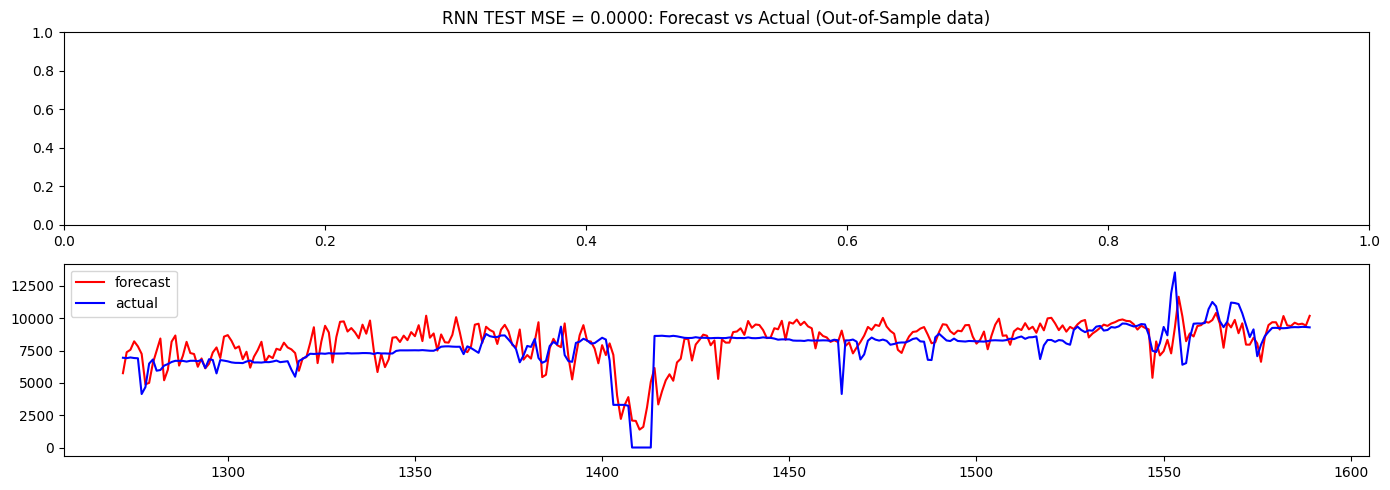

ricardo check this
torch.Size([318, 26])
torch.Size([318, 26])
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(318, 26)
(318, 26)


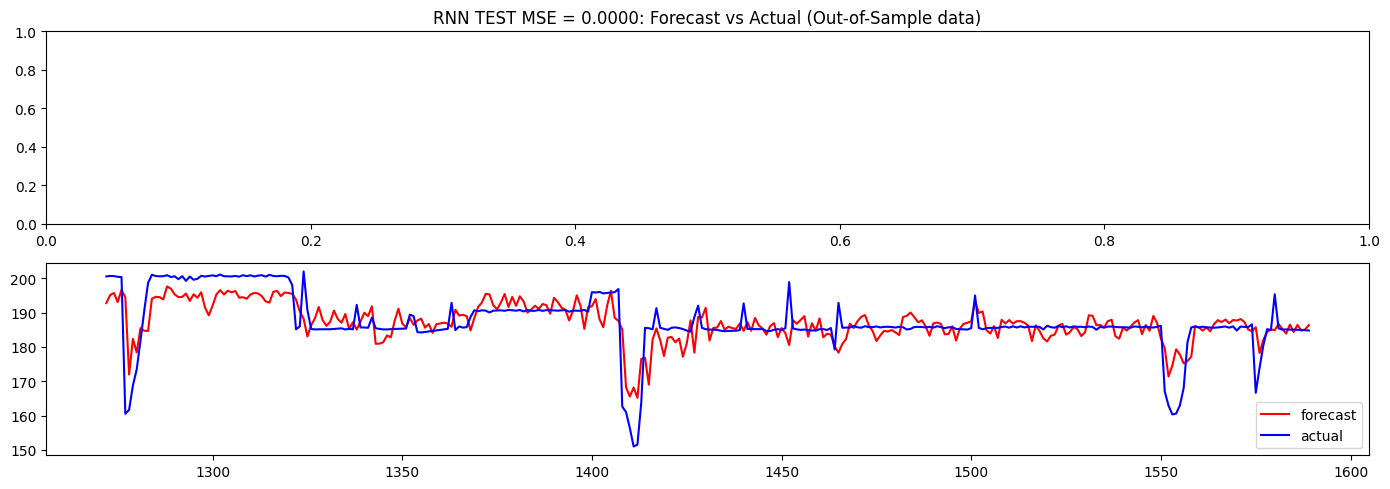

ricardo check this
torch.Size([318, 26])
torch.Size([318, 26])
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(318, 26)
(318, 26)


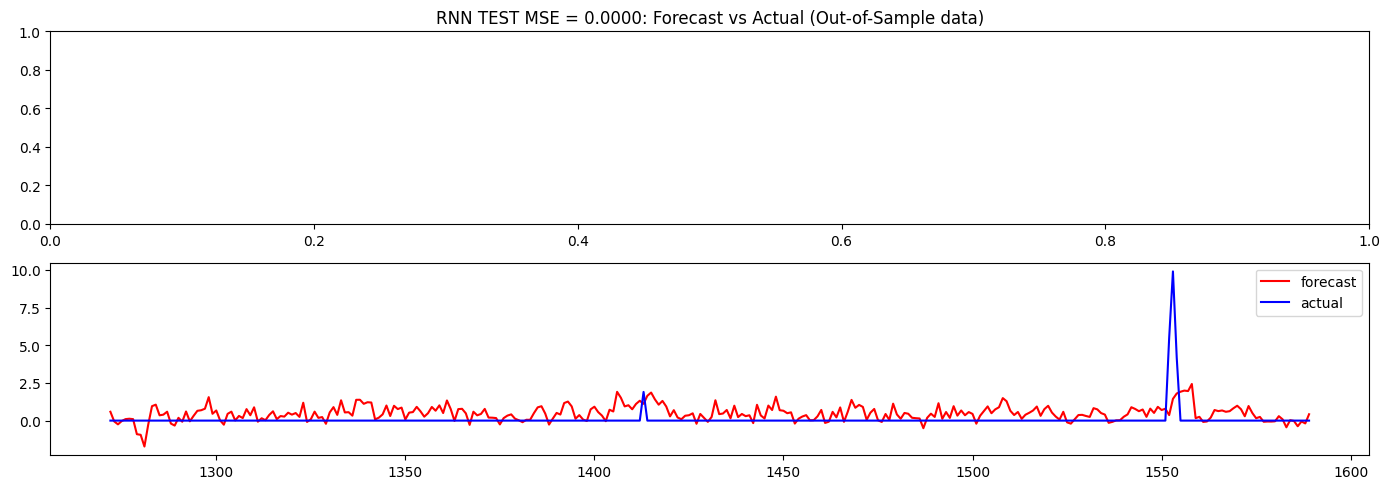

ricardo check this
torch.Size([318, 26])
torch.Size([318, 26])
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(318, 26)
(318, 26)


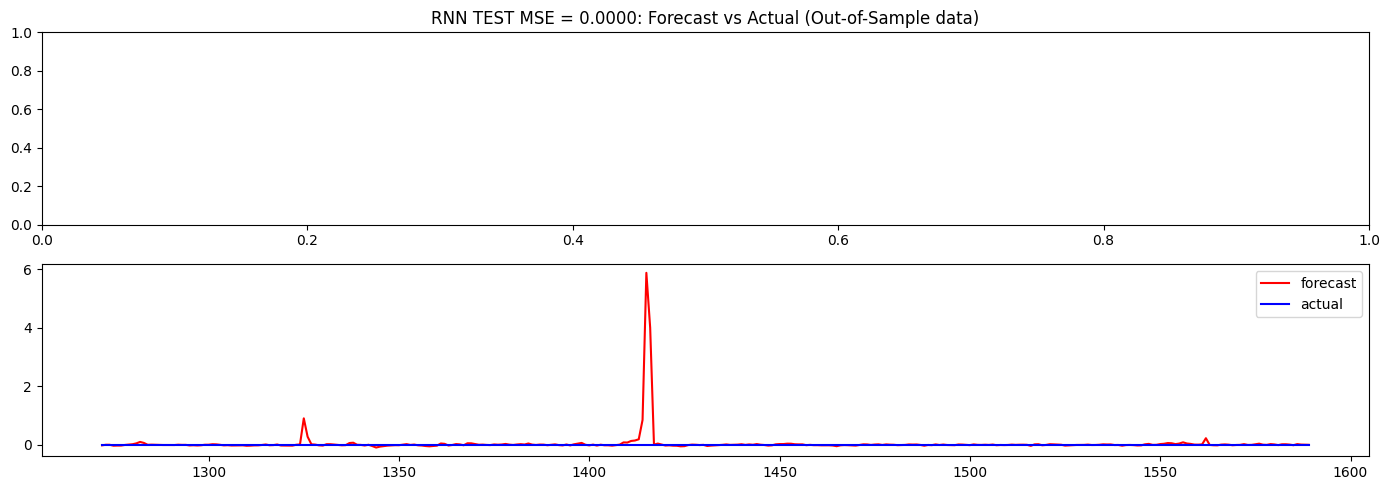

ricardo check this
torch.Size([318, 26])
torch.Size([318, 26])
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(318, 26)
(318, 26)


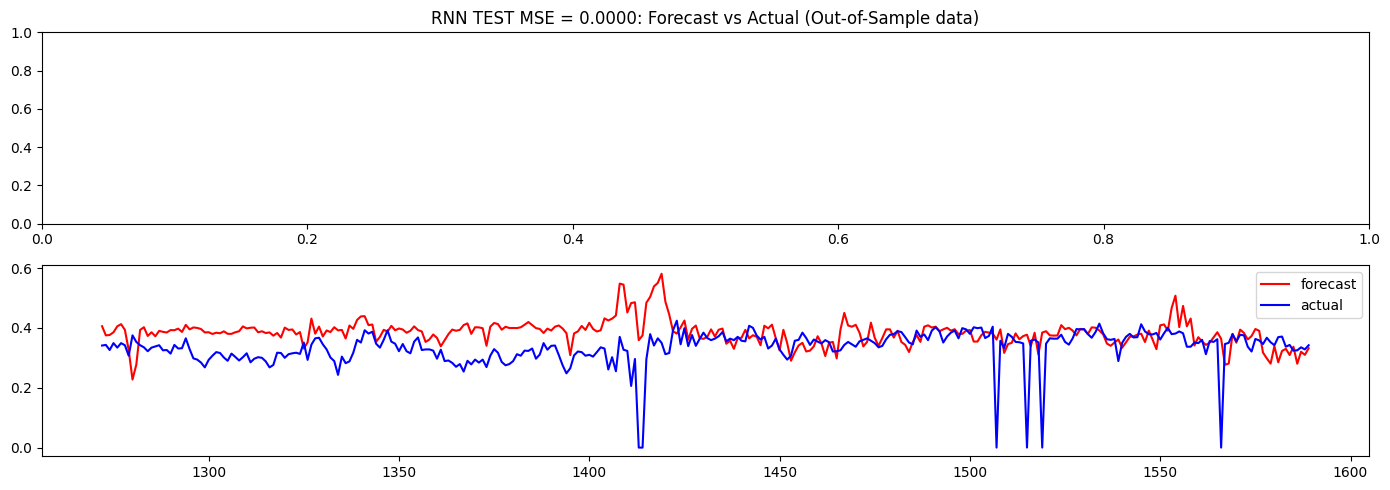

ricardo check this
torch.Size([318, 26])
torch.Size([318, 26])
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(318, 26)
(318, 26)


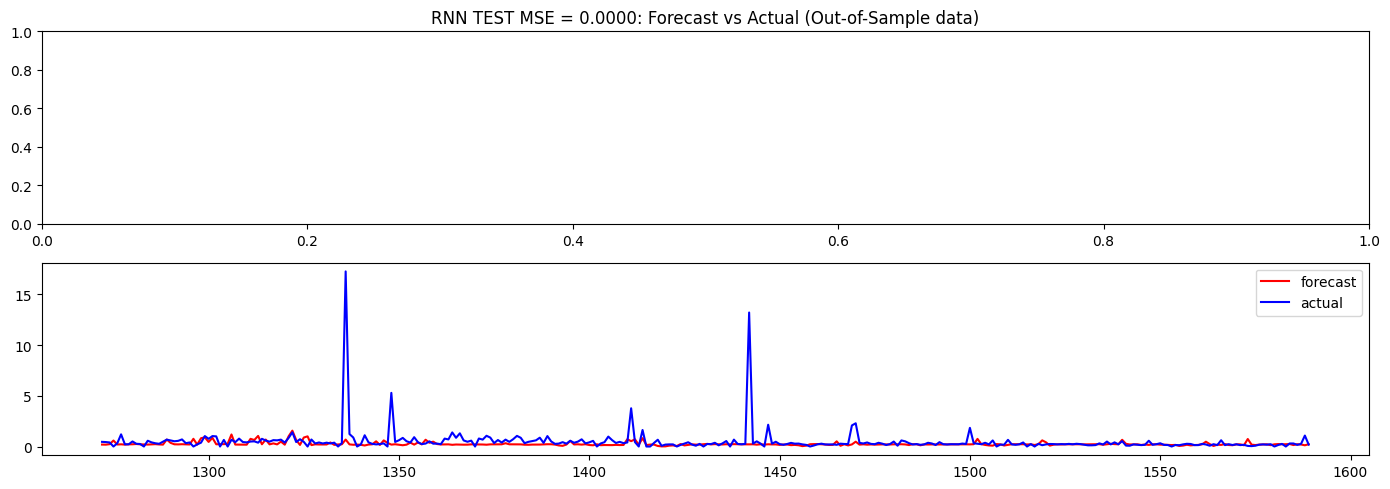

ricardo check this
torch.Size([318, 26])
torch.Size([318, 26])
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(318, 26)
(318, 26)


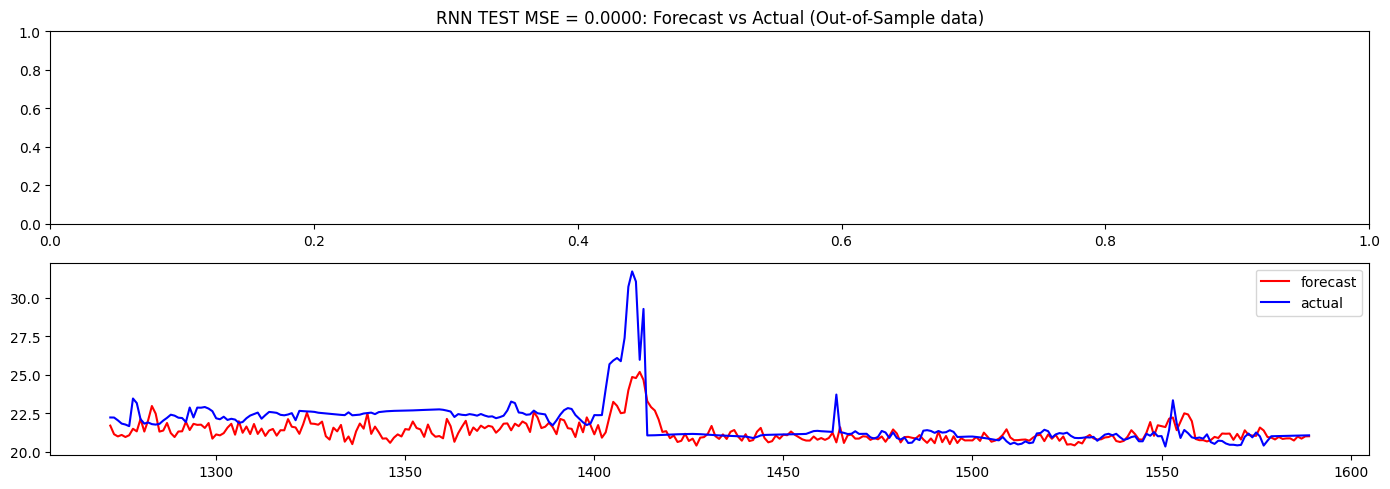

ricardo check this
torch.Size([318, 26])
torch.Size([318, 26])
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(318, 26)
(318, 26)


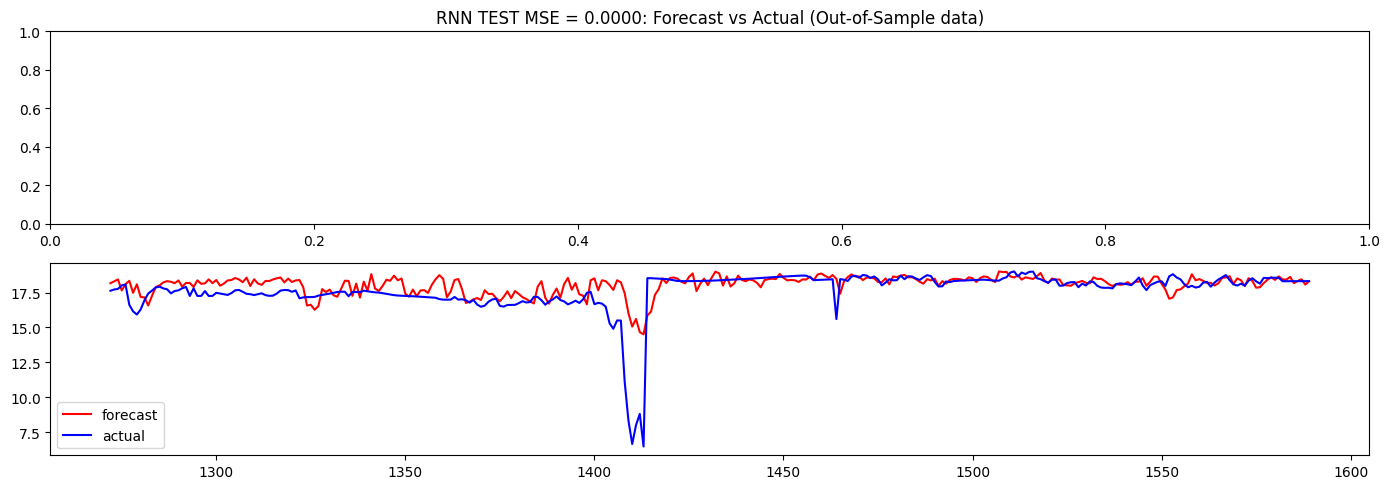

ricardo check this
torch.Size([318, 26])
torch.Size([318, 26])
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(318, 26)
(318, 26)


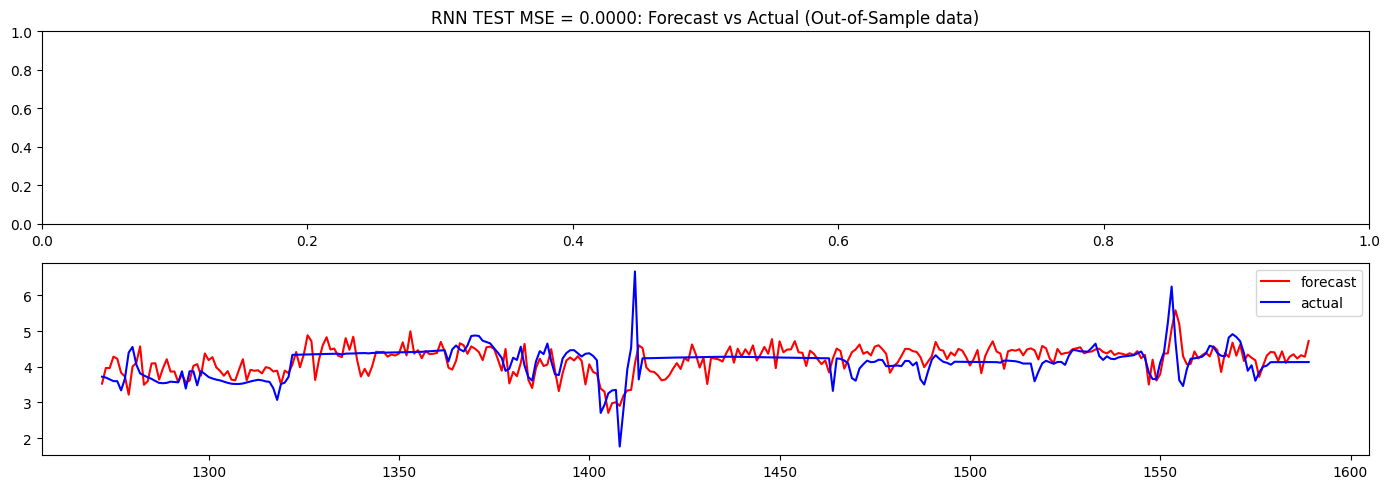

ricardo check this
torch.Size([318, 26])
torch.Size([318, 26])
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(318, 26)
(318, 26)


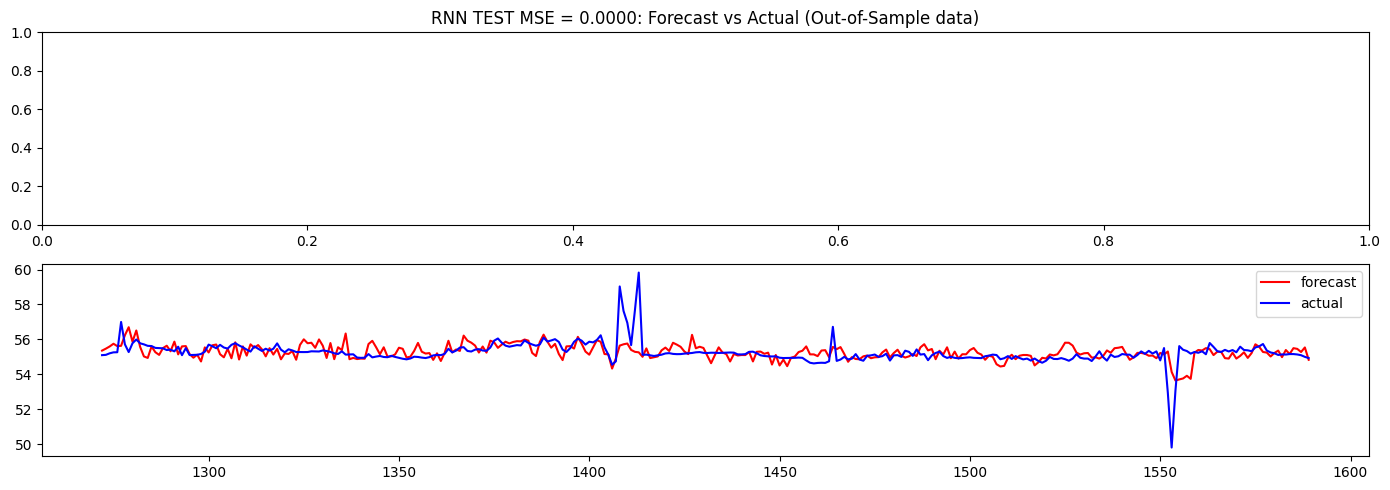

ricardo check this
torch.Size([318, 26])
torch.Size([318, 26])
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(318, 26)
(318, 26)


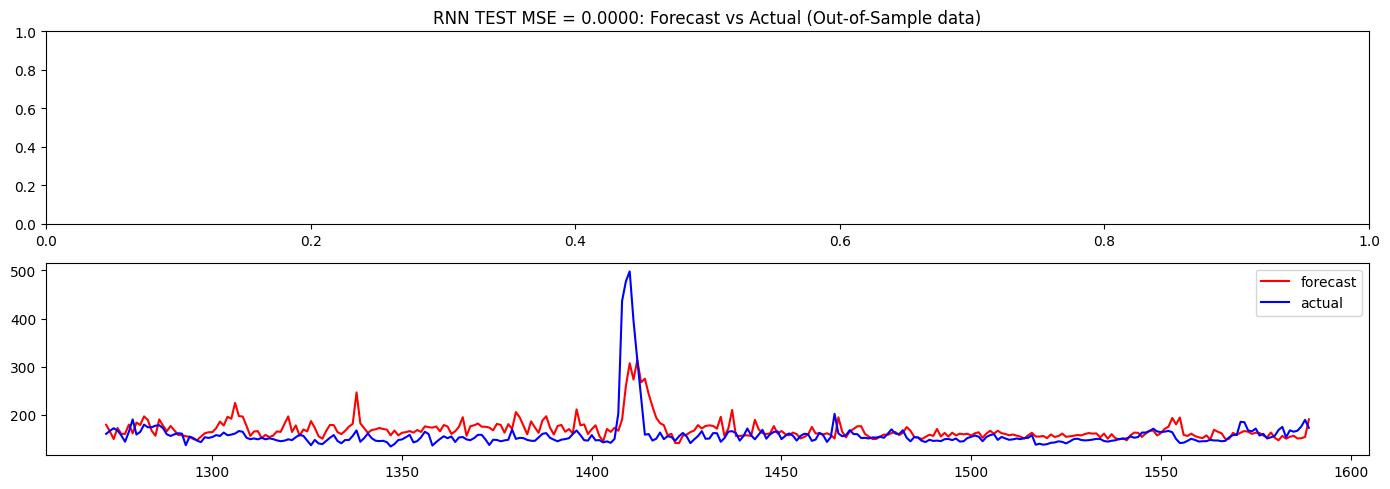

ricardo check this
torch.Size([318, 26])
torch.Size([318, 26])
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(318, 26)
(318, 26)


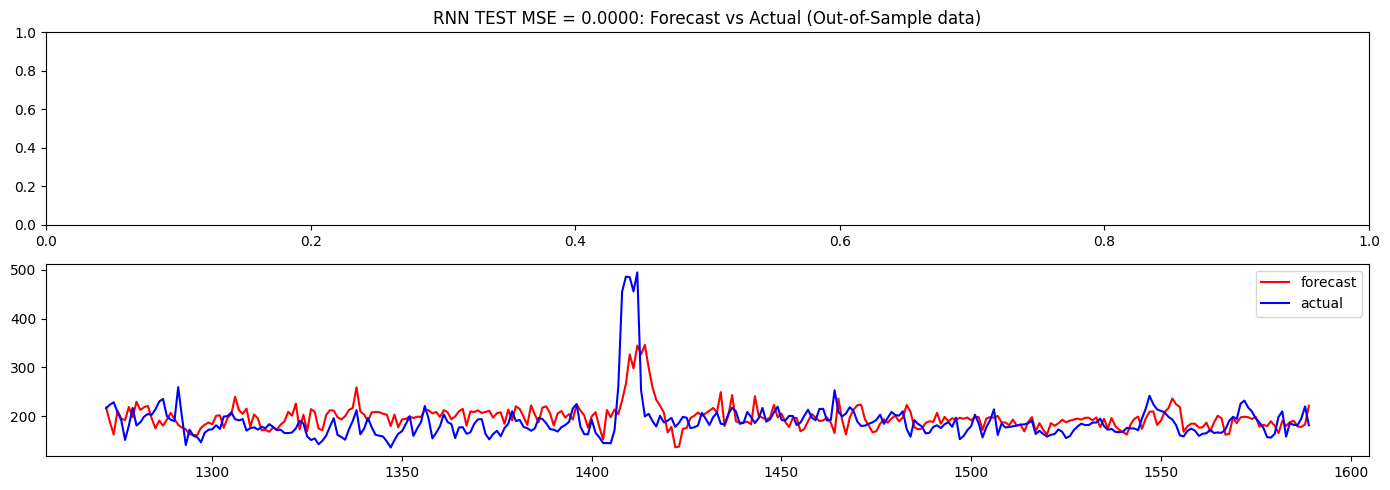

ricardo check this
torch.Size([318, 26])
torch.Size([318, 26])
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(318, 26)
(318, 26)


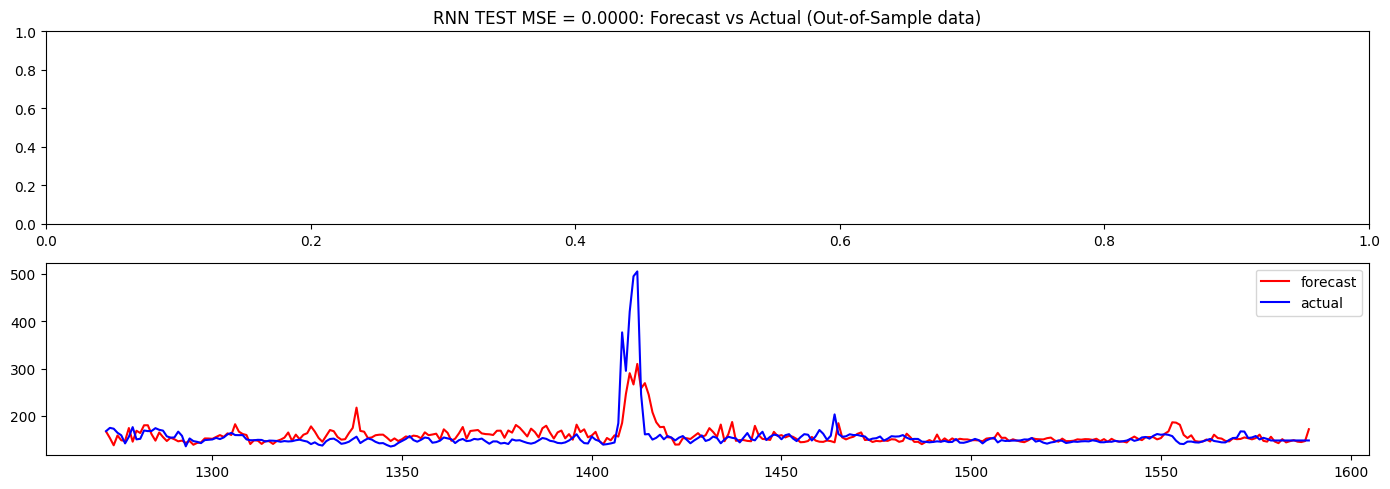

ricardo check this
torch.Size([318, 26])
torch.Size([318, 26])
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(318, 26)
(318, 26)


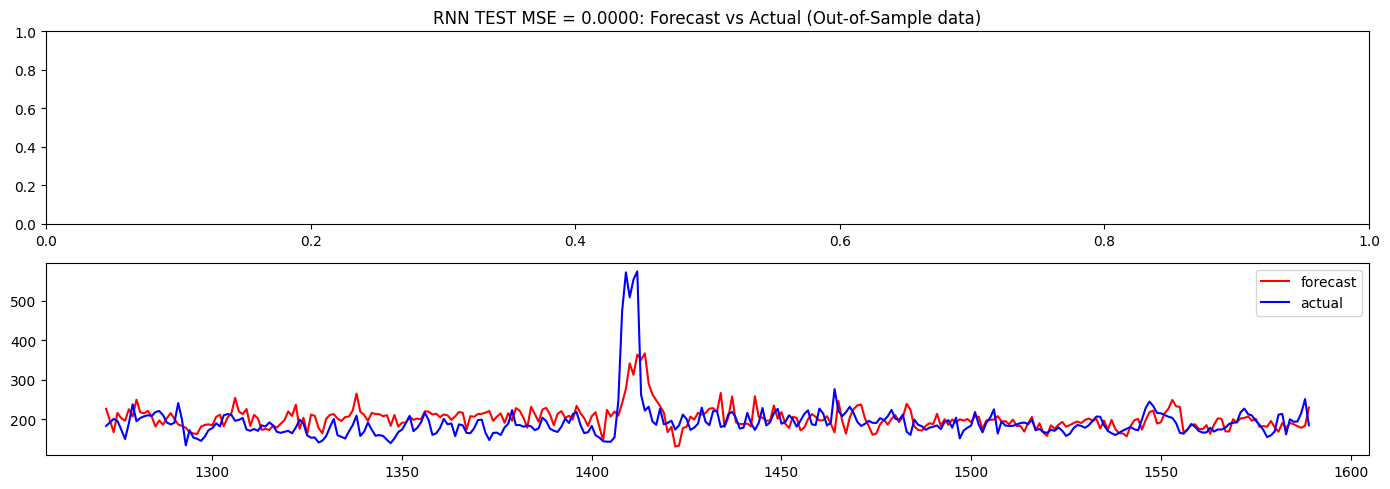

ricardo check this
torch.Size([318, 26])
torch.Size([318, 26])
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(318, 26)
(318, 26)


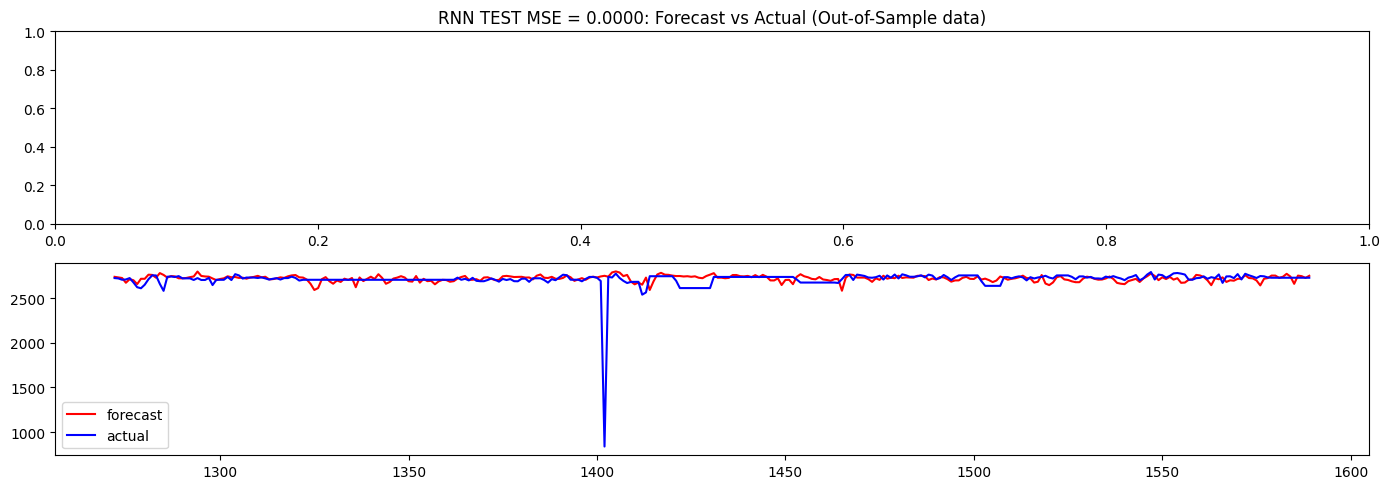

ricardo check this
torch.Size([318, 26])
torch.Size([318, 26])
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(318, 26)
(318, 26)


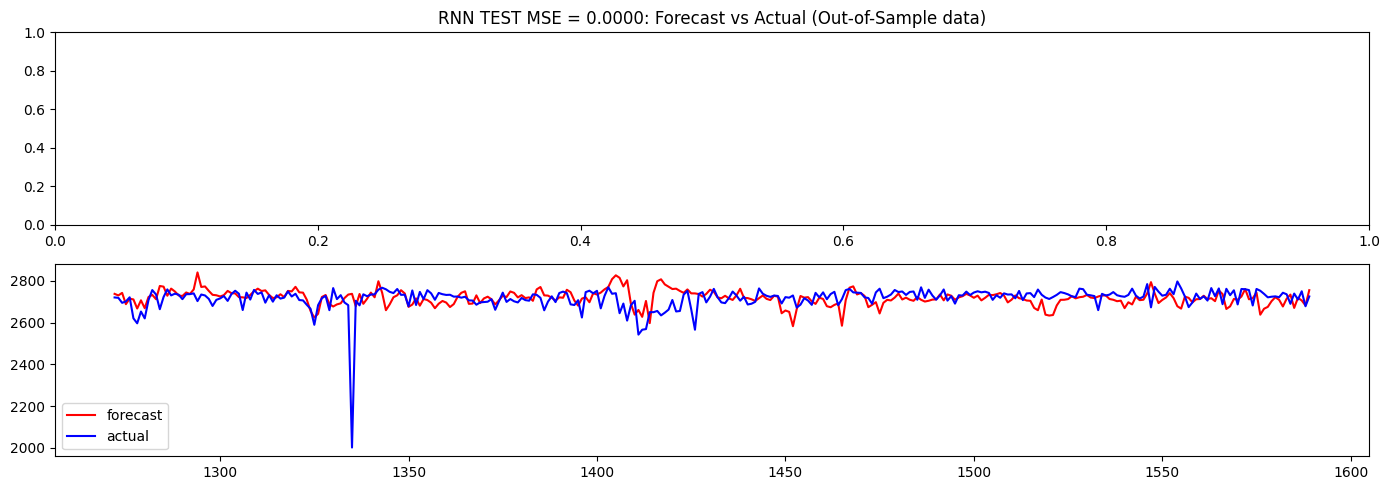

ricardo check this
torch.Size([318, 26])
torch.Size([318, 26])
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(318, 26)
(318, 26)


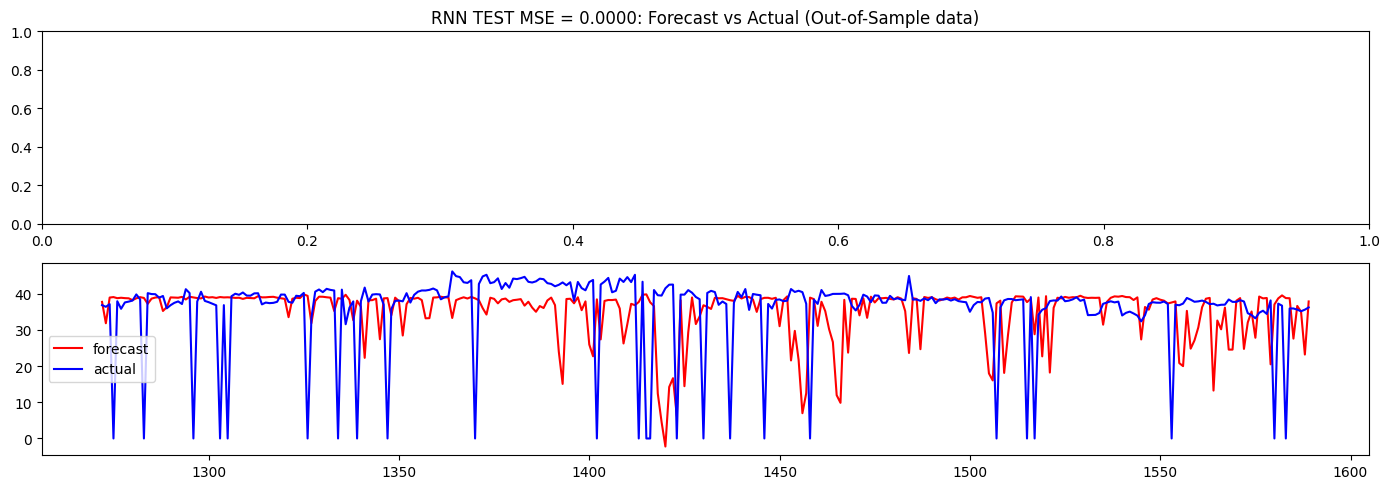

ricardo check this
torch.Size([318, 26])
torch.Size([318, 26])
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(318, 26)
(318, 26)


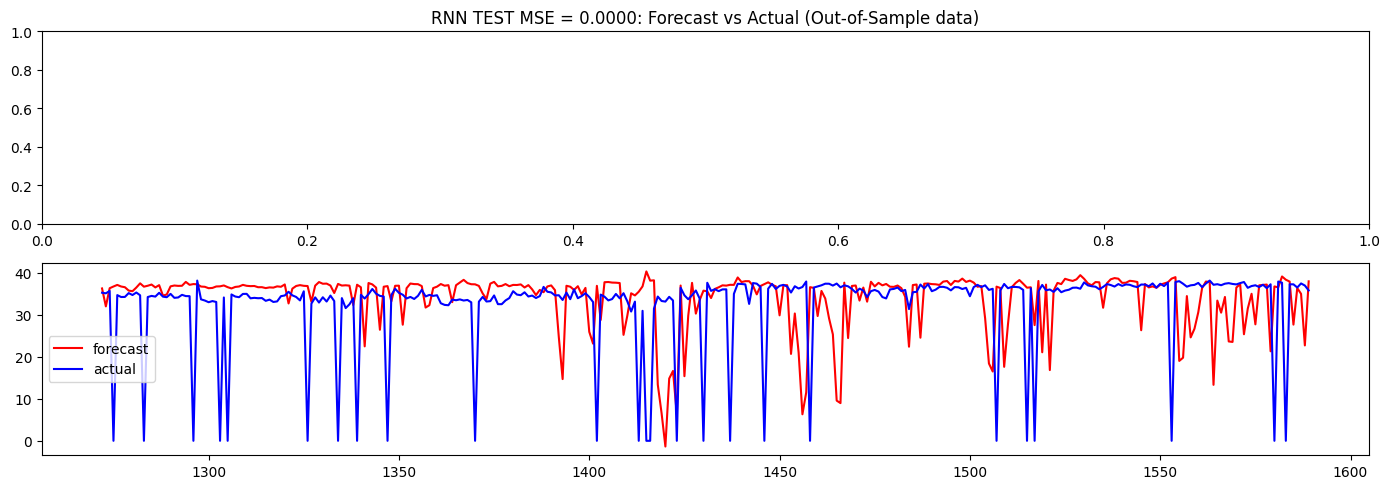

ricardo check this
torch.Size([318, 26])
torch.Size([318, 26])
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(318, 26)
(318, 26)


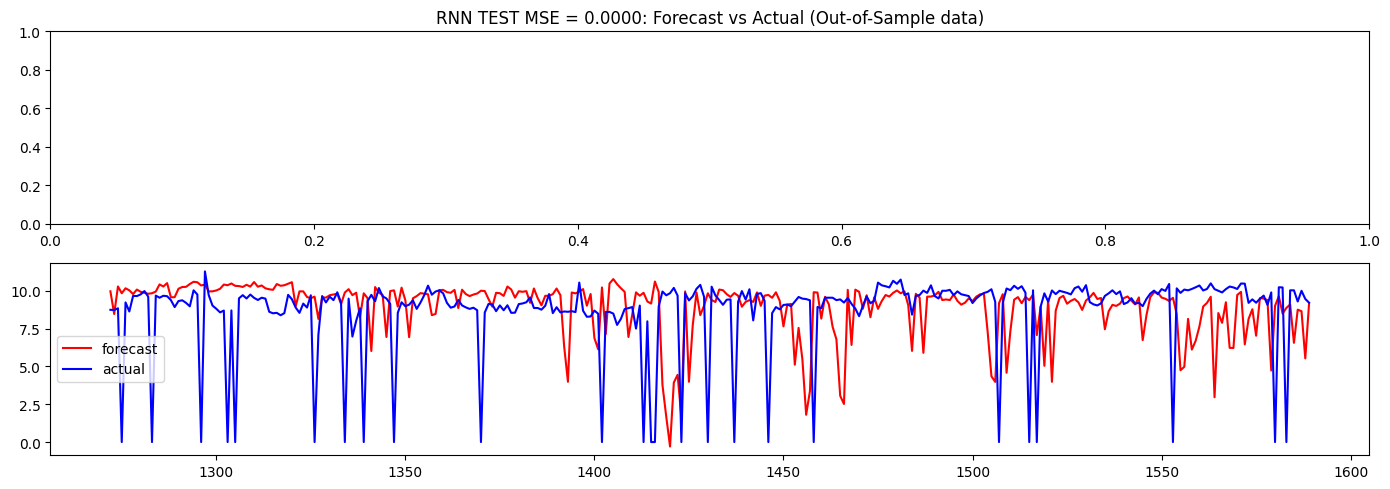

ricardo check this
torch.Size([318, 26])
torch.Size([318, 26])
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(318, 26)
(318, 26)


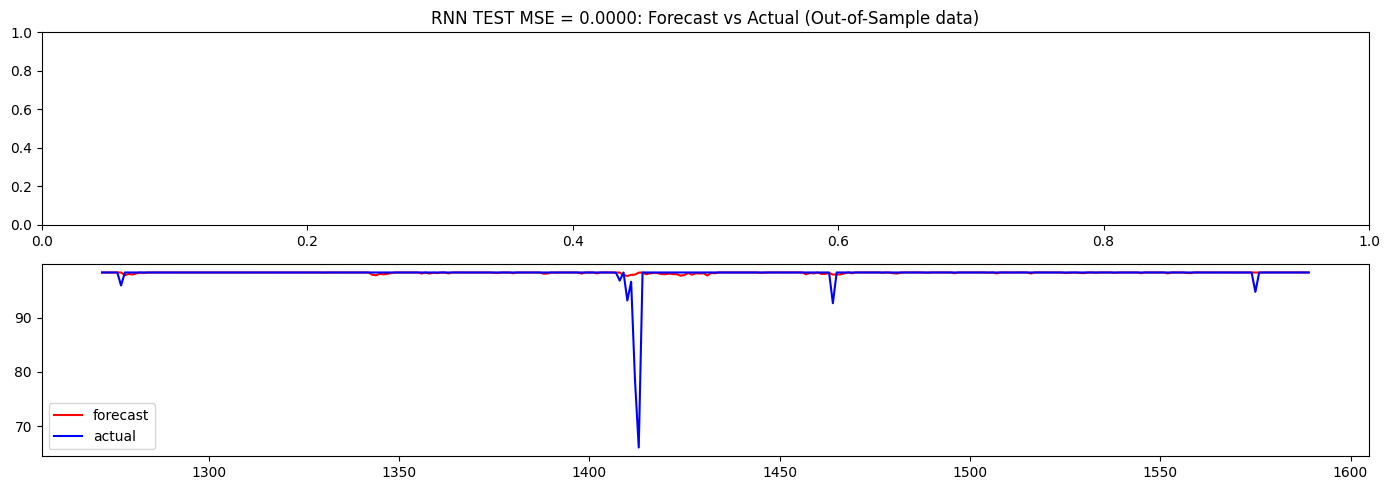

ricardo check this
torch.Size([318, 26])
torch.Size([318, 26])
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(318, 26)
(318, 26)


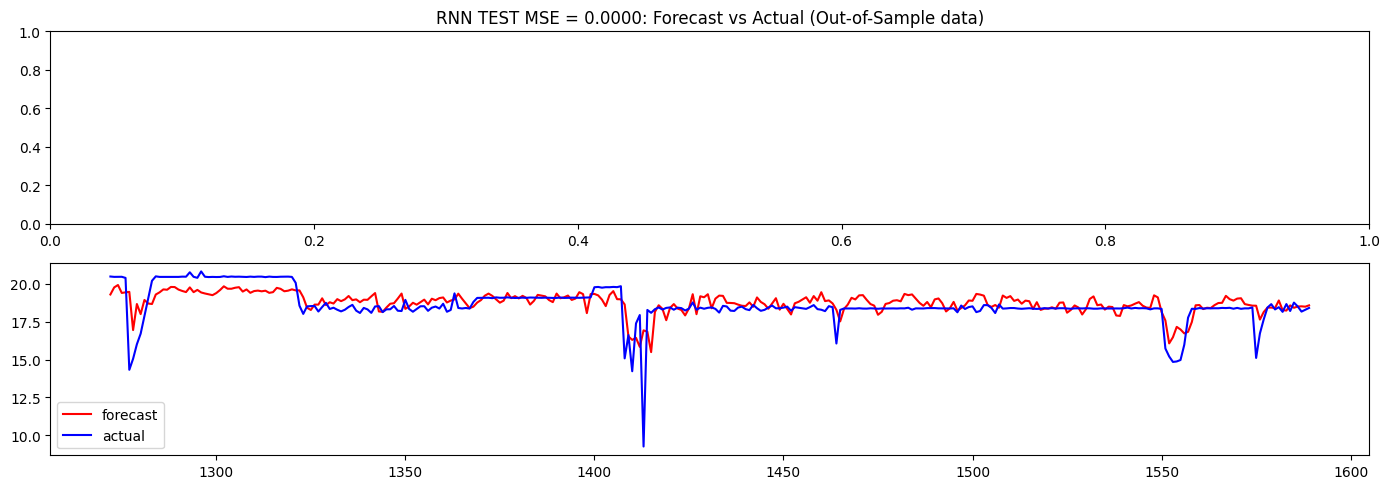

ricardo check this
torch.Size([318, 26])
torch.Size([318, 26])
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(318, 26)
(318, 26)


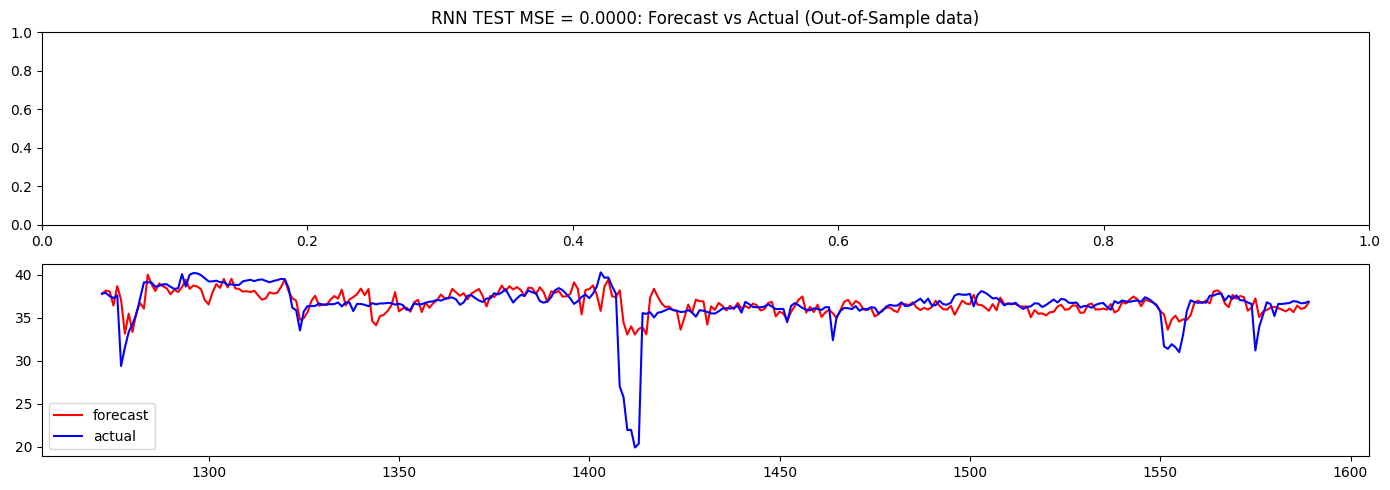

ricardo check this
torch.Size([318, 26])
torch.Size([318, 26])
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(156,)
(156,)
(26,)
(26,)
(318, 26)
(1, 26)
(1, 26)
(318, 26)
(318, 26)


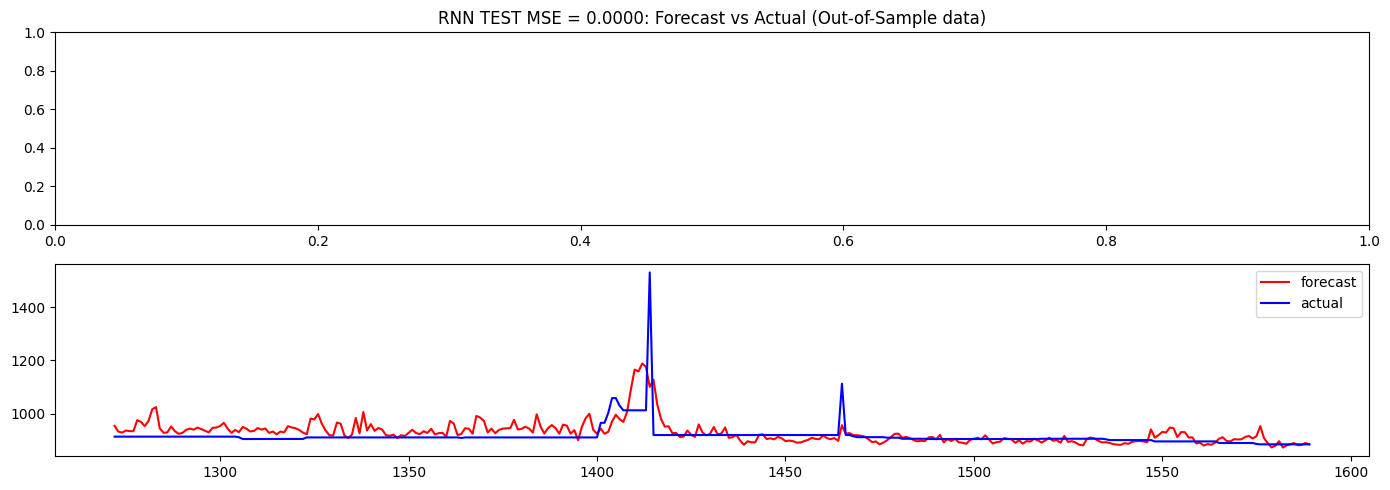

In [317]:

for i in range(26):

    x_index = i

    l1, l2 = View_all_predicted_Xs(x_index, model, model_type='RNN', **params_si )            
